# Evaluation of data collected with SRWA and different chance values w.r.t. Johnson SB distribution

We considered

* 11 hidden solution base instances with $n=50$ variables and 11 or 5 modified instances with different chance values (see instance list).
* 1 hidden solution base instance with $n=100$ variables and 5 modfied instances with $5.449113337059022 \cdot 10^{-6} \leq \text{chance} \leq 1.0898226674118043 \cdot 10^{-5}$ (see source code of https://github.com/FlorianWoerz/concealSATgen for a detailed explanation).

All instances where tested with SRWA.

The concrete instances can be seen below.

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Preliminaries

In [2]:
#
# Load all necessary modules
#

# Module for "Unix style pathname pattern expansion" 
# and "Miscellaneous operating system interfaces"
import glob
import os

# Modules for data analysis, plotting, etc.
import pandas as pd
import numpy as np
from scipy.stats import probplot
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

# Load our own modules for analysis of ecdfs, survival functions, 
# confidence intervals, etc. and the respective plotting. 
# The corresponding files can be found in ./evaluation_SB/jupyter.
from empirical import *
from plots import *

In [3]:
# Define a function to sort the chance values from least likely to most likely.
def sort_key(instance_name):
    back = instance_name.split("chance")[-1]
    back = back.replace(".csv", "")
    return float(back)

In [4]:
# Specify the base path of this experiment series.
# The base path is refined by folders incidating the number of variables.
base_path = '../../experiments/csvs_different_chances'
filters = ['n50', 'n100']

In [5]:
# List all instances under consideration.
instances = []
for filter in filters:
    instance_path = os.path.join(base_path, filter)
    for baseinstance in os.listdir(instance_path):
        mod_instance_path = os.path.join(instance_path, baseinstance)
        newinstances = glob.glob(os.path.join(mod_instance_path, f'*.csv'))
        newinstances = sorted(newinstances, key=sort_key)
        instances += newinstances

instances

['../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance9.283120802166236e-06.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance1.8566241604332472e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance3.7132483208664944e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance5.569872481299742e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance7.426496641732989e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00011139744962599483.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00014852993283465978.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00018566241604332472.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/cha

## Visual inspection

In this section, we are going to inspect the data in a visual manner.

A detailed description can be found in the paper. For easier reference, we next provide a short guide.


### log-plot ecdf vs. cdf; ecdf vs. cdf; log-plot e-survival vs. survial (from left to right)

* **Left plot:** The left tail, i. e., the probabilities for very small values, can be checked visually by plotting the ecdf and fitted cdf with both axes logarithmically scaled. Thereby, the probabilities for extreme events (in this case, especially easy instances) can be measured accurately. The $x$-axis in such graphs corresponds to the time (in flips) until a solution is found, and the $y$-axis corresponds to the probability that a solution is found until that time. In red we depict the empirically collected data; blue is the fitted distribution.

* **Middle plot:** Plot of the ecdf and the fitted cdf on the same graph.

* **Right plot:** Lastly, the probabilities for particularly hard instances should also be checked. Any mistakes in this area could lead to underestimating the likelihood of encountering an exceptionally hard instance. For analyses of this type, the survival function $S$ is a useful tool; if $F$ is the cdf, $S(x) := 1 − F (x)$. Therefore, the survival function’s value $S(x)$ represents the probability that an instance is (on average) harder than $x$ in our case. If we plot the empirical survival function ($1 − \hat{F}_n (x)$) and the fitted survival function together on a graph with logarithmically scaled axes, we can easily detect errors in the right tail.

*****************************************************************************************************************
0 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance9.283120802166236e-06.csv
*****************************************************************************************************************
Johnson SB parameters: a 12.206825000377457, b 4.964594078415898, location 15.607820187579563, scale 1434590.4740519049
Cheng parametrization: a 15.607820187579563, b 1434606.0818720926, gamma 12.206825000377457, delta 4.964594078415898


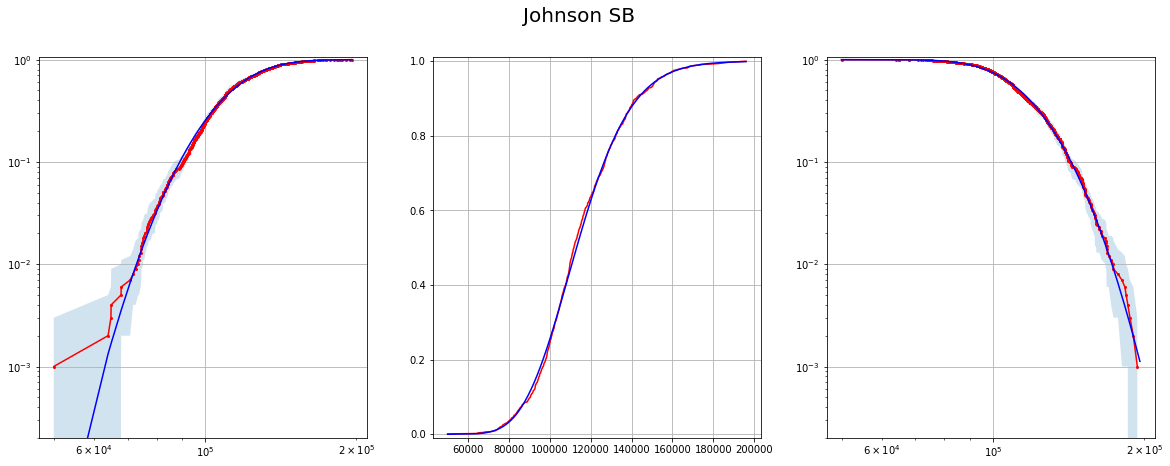



******************************************************************************************************************
1 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance1.8566241604332472e-05.csv
******************************************************************************************************************
Johnson SB parameters: a 11.298167850621631, b 4.077436342815098, location 1909.4646273497708, scale 1658237.1544504897
Cheng parametrization: a 1909.4646273497708, b 1660146.6190778394, gamma 11.298167850621631, delta 4.077436342815098


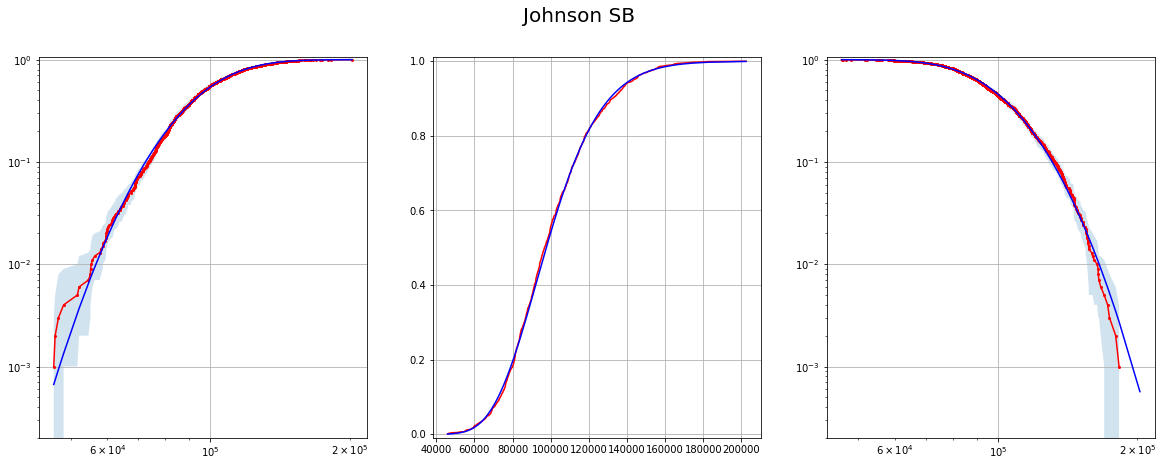



******************************************************************************************************************
2 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance3.7132483208664944e-05.csv
******************************************************************************************************************
Johnson SB parameters: a 6.411582911576615, b 3.1617177319895857, location 6044.010861726207, scale 674672.2289630375
Cheng parametrization: a 6044.010861726207, b 680716.2398247637, gamma 6.411582911576615, delta 3.1617177319895857


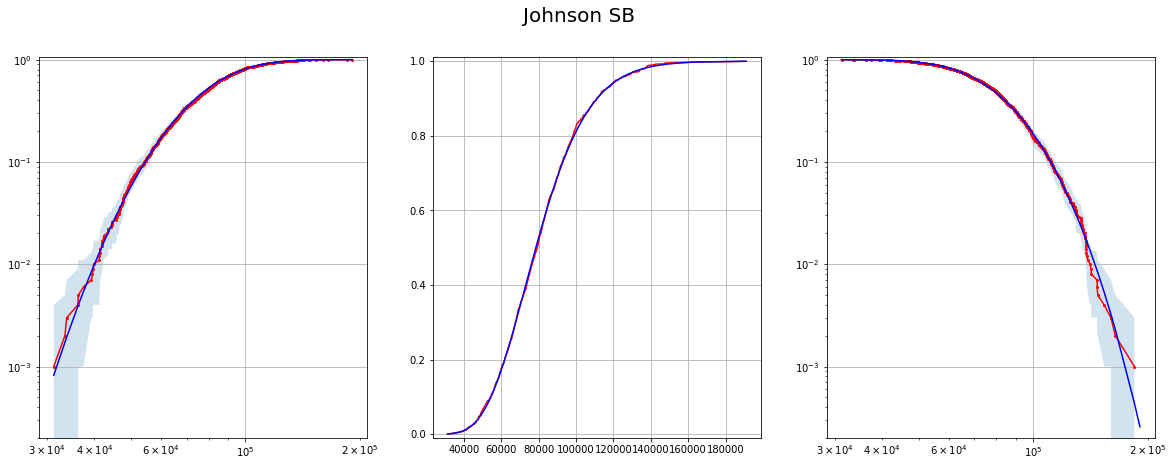



*****************************************************************************************************************
3 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance5.569872481299742e-05.csv
*****************************************************************************************************************
Johnson SB parameters: a 12.873260280463327, b 3.0202613890314787, location 10322.42532734417, scale 4533951.774630267
Cheng parametrization: a 10322.42532734417, b 4544274.199957611, gamma 12.873260280463327, delta 3.0202613890314787


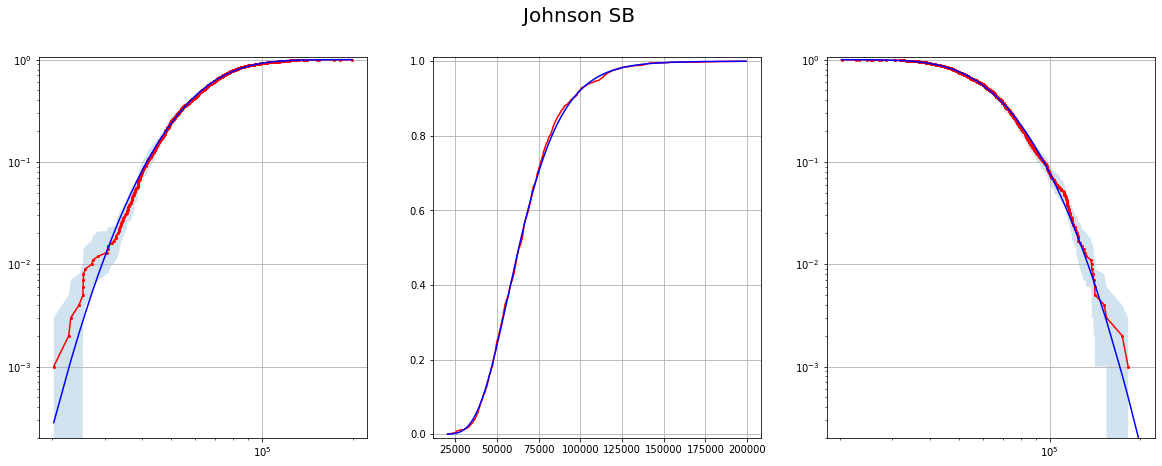



*****************************************************************************************************************
4 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance7.426496641732989e-05.csv
*****************************************************************************************************************
Johnson SB parameters: a 12.874871174663063, b 2.9470169493230856, location 6540.668785868982, scale 4782883.447914697
Cheng parametrization: a 6540.668785868982, b 4789424.116700566, gamma 12.874871174663063, delta 2.9470169493230856


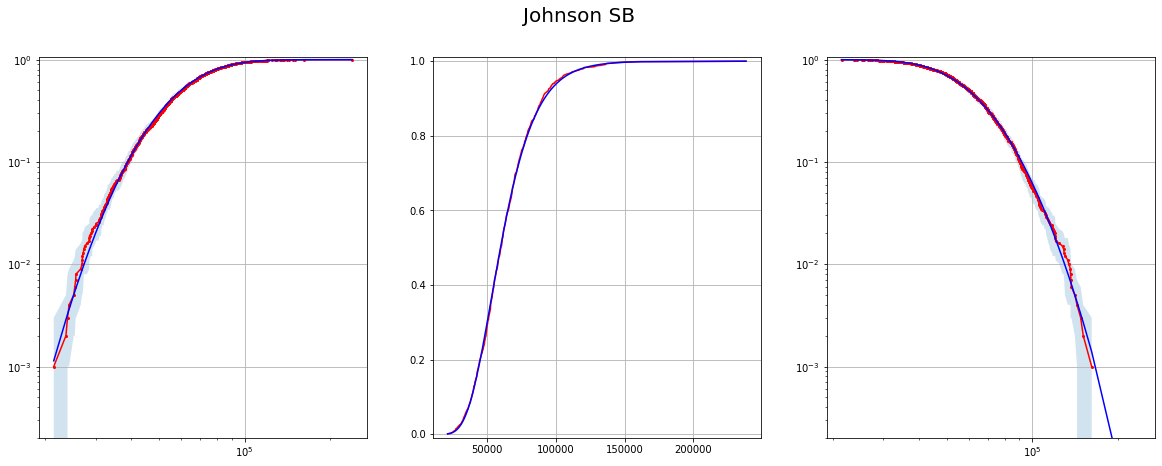



******************************************************************************************************************
5 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00011139744962599483.csv
******************************************************************************************************************
Johnson SB parameters: a 11.436583070218148, b 2.7287755117111043, location 9634.262472475104, scale 3299814.7011940517
Cheng parametrization: a 9634.262472475104, b 3309448.9636665266, gamma 11.436583070218148, delta 2.7287755117111043


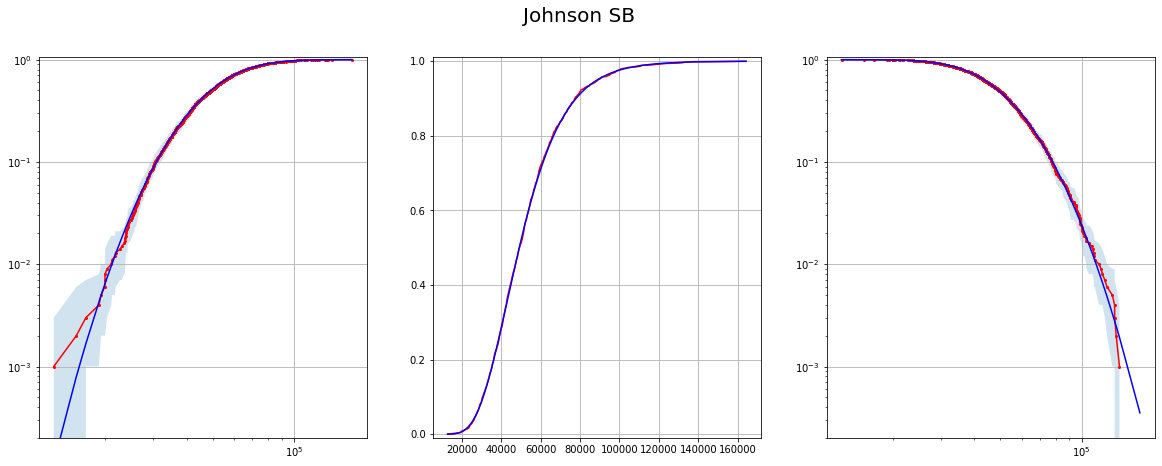



******************************************************************************************************************
6 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00014852993283465978.csv
******************************************************************************************************************
Johnson SB parameters: a 10.224542868604203, b 2.558619402676877, location 11541.979040808228, scale 2393086.5733935423
Cheng parametrization: a 11541.979040808228, b 2404628.5524343504, gamma 10.224542868604203, delta 2.558619402676877


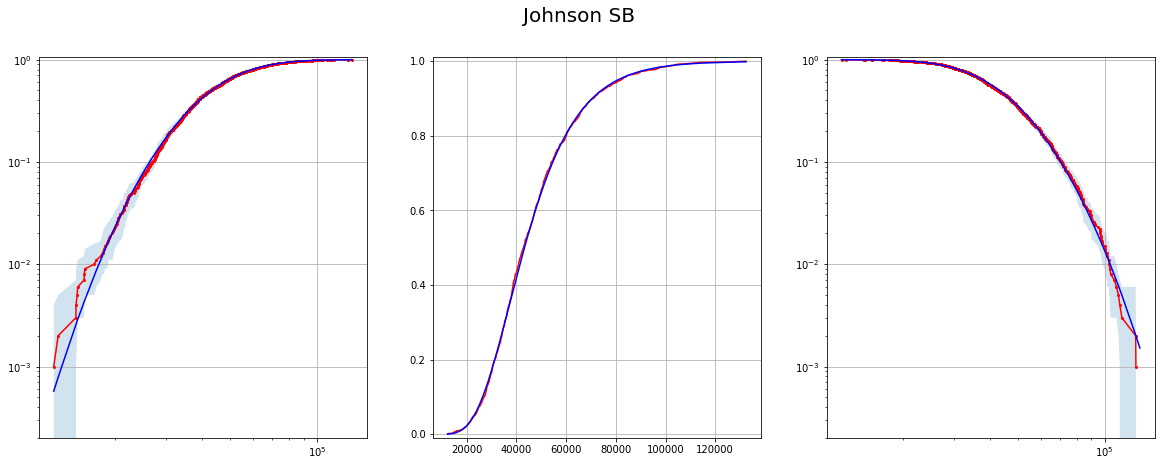



******************************************************************************************************************
7 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00018566241604332472.csv
******************************************************************************************************************
Johnson SB parameters: a 10.391980451511202, b 2.5105632417889456, location 12345.22826002584, scale 2580978.346209797
Cheng parametrization: a 12345.22826002584, b 2593323.574469823, gamma 10.391980451511202, delta 2.5105632417889456


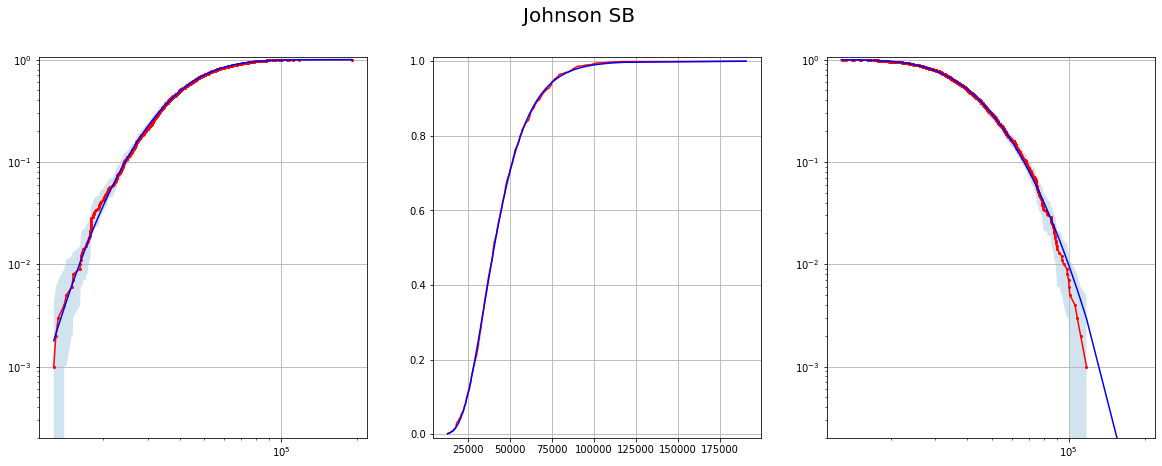



******************************************************************************************************************
8 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00022279489925198967.csv
******************************************************************************************************************
Johnson SB parameters: a 11.518266988084854, b 3.219158252834583, location 1395.0540143058104, scale 1893223.7003661357
Cheng parametrization: a 1395.0540143058104, b 1894618.7543804415, gamma 11.518266988084854, delta 3.219158252834583


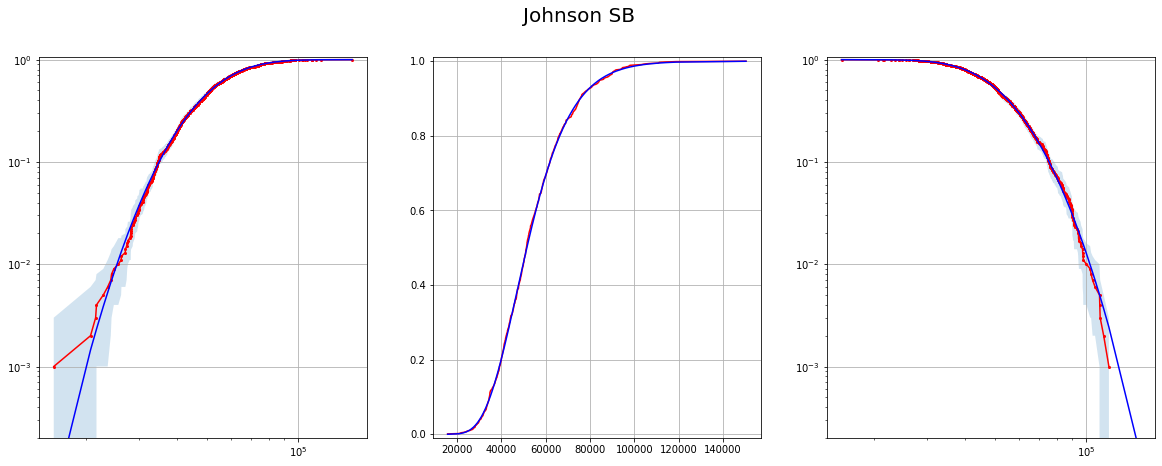



*****************************************************************************************************************
9 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.0002599273824606546.csv
*****************************************************************************************************************
Johnson SB parameters: a 11.715534809685213, b 3.2648196811557737, location 1916.4101289298087, scale 1867261.2251947788
Cheng parametrization: a 1916.4101289298087, b 1869177.6353237086, gamma 11.715534809685213, delta 3.2648196811557737


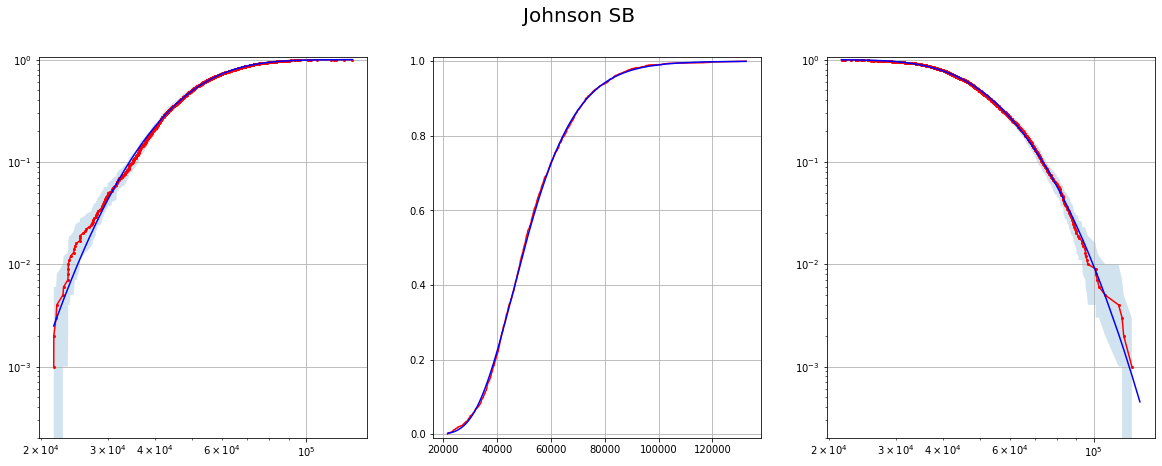



*******************************************************************************************************************
10 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00029705986566931956.csv
*******************************************************************************************************************
Johnson SB parameters: a 7.084286098223293, b 2.777076894135905, location 7824.462536886774, scale 620276.6750595421
Cheng parametrization: a 7824.462536886774, b 628101.1375964289, gamma 7.084286098223293, delta 2.777076894135905


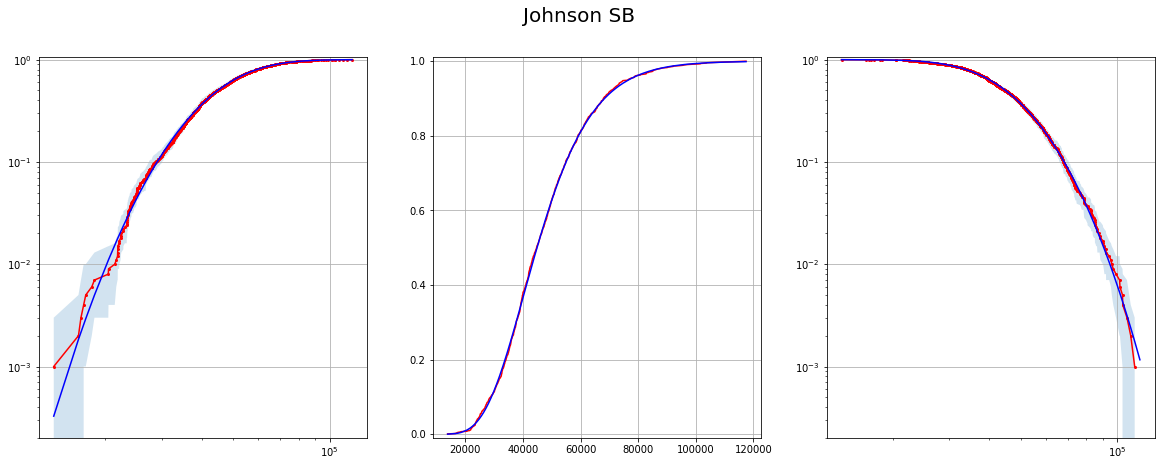



*******************************************************************************************************************
11 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance1.004169898003682e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 13.151174794646927, b 3.5752521519185203, location 10180.561736181486, scale 681360.6863666656
Cheng parametrization: a 10180.561736181486, b 691541.2481028471, gamma 13.151174794646927, delta 3.5752521519185203


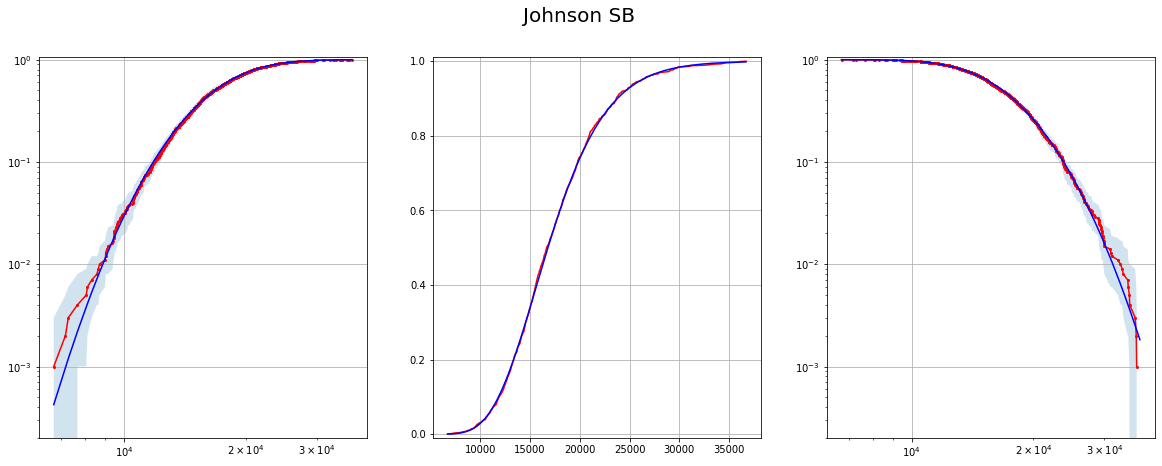



*******************************************************************************************************************
12 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance2.008339796007364e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 4.084912177471889, b 2.4842695068770206, location 10283.17364045615, scale 108508.52929959769
Cheng parametrization: a 10283.17364045615, b 118791.70294005384, gamma 4.084912177471889, delta 2.4842695068770206


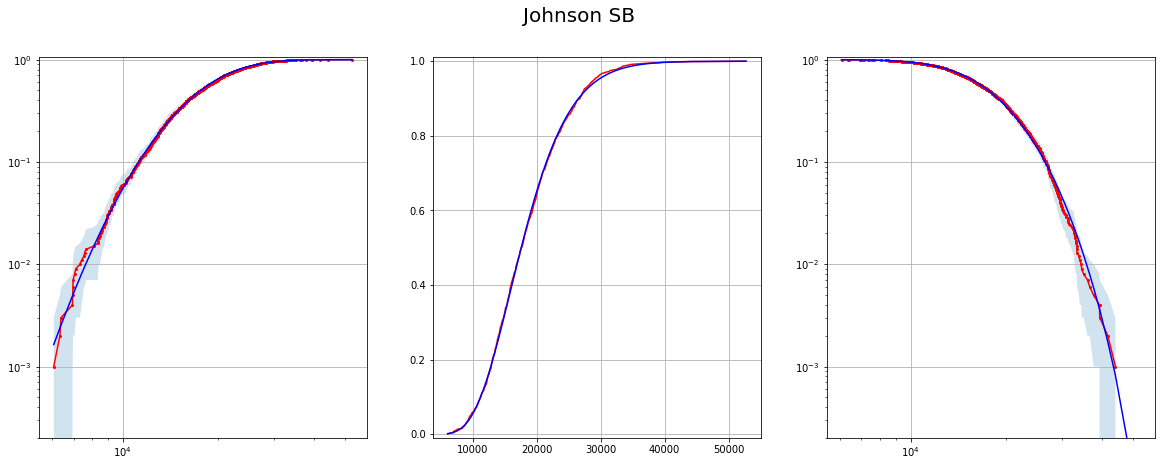



*******************************************************************************************************************
13 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance4.016679592014728e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 9.428025599348787, b 3.592566028436935, location 1094.4677731109025, scale 431120.99736995366
Cheng parametrization: a 1094.4677731109025, b 432215.46514306456, gamma 9.428025599348787, delta 3.592566028436935


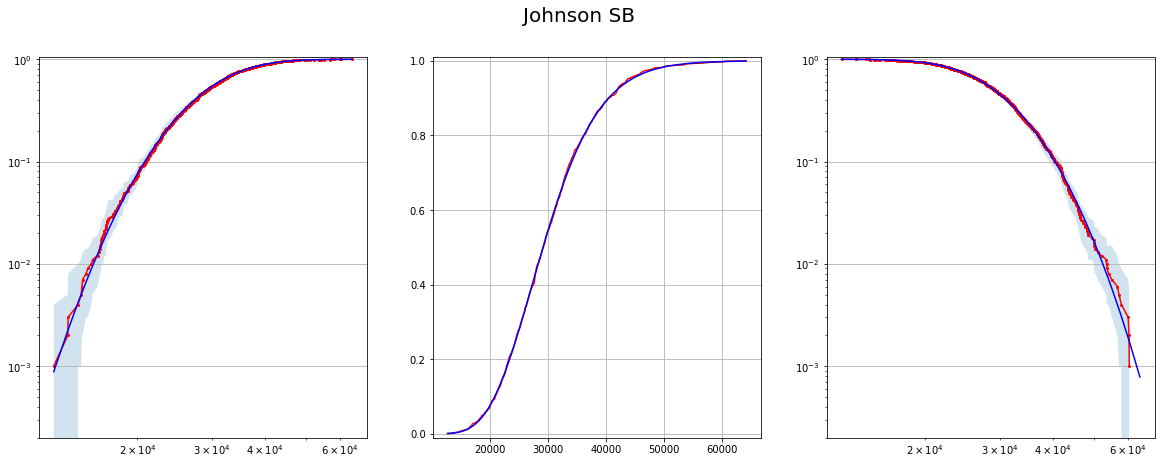



*******************************************************************************************************************
14 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance6.025019388022091e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.926392711192989, b 3.205645149555088, location 3549.5911888046667, scale 1219672.6900081947
Cheng parametrization: a 3549.5911888046667, b 1223222.2811969994, gamma 11.926392711192989, delta 3.205645149555088


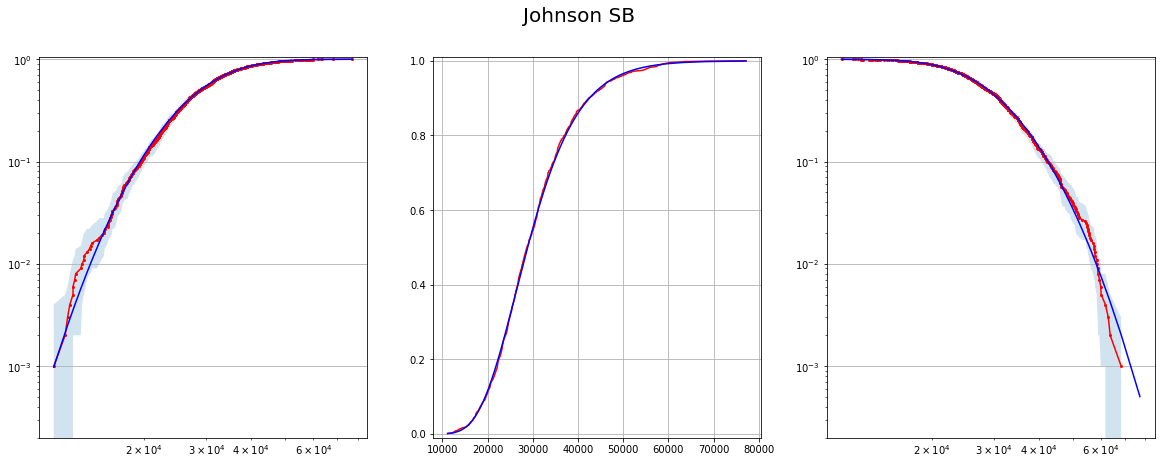



*******************************************************************************************************************
15 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance8.033359184029456e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 12.338085547092092, b 3.2694250185911597, location 1718.876771707769, scale 1484352.4273538496
Cheng parametrization: a 1718.876771707769, b 1486071.3041255574, gamma 12.338085547092092, delta 3.2694250185911597


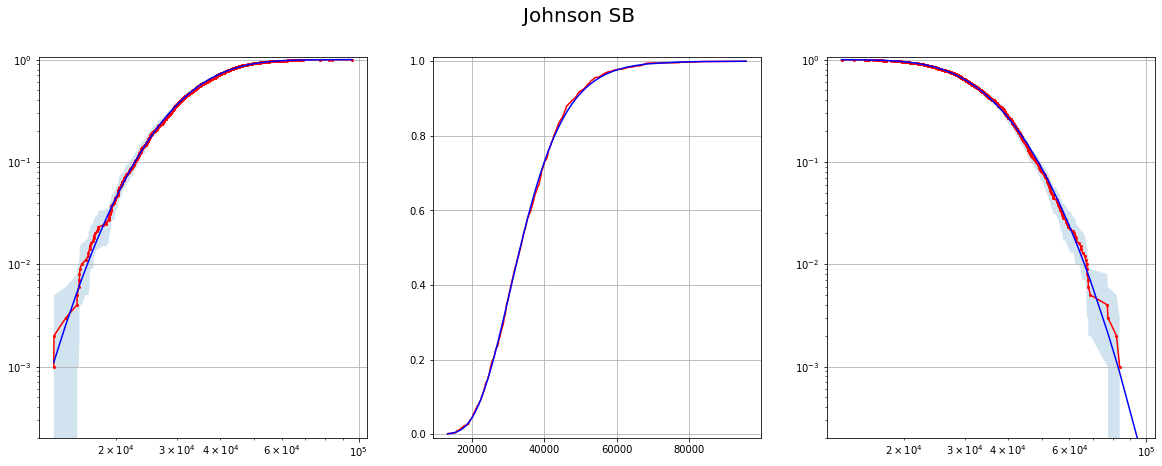



********************************************************************************************************************
16 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00012050038776044183.csv
********************************************************************************************************************
Johnson SB parameters: a 5.3764235354705505, b 2.6131406045945518, location 3941.2035011833595, scale 329739.4354920612
Cheng parametrization: a 3941.2035011833595, b 333680.63899324456, gamma 5.3764235354705505, delta 2.6131406045945518


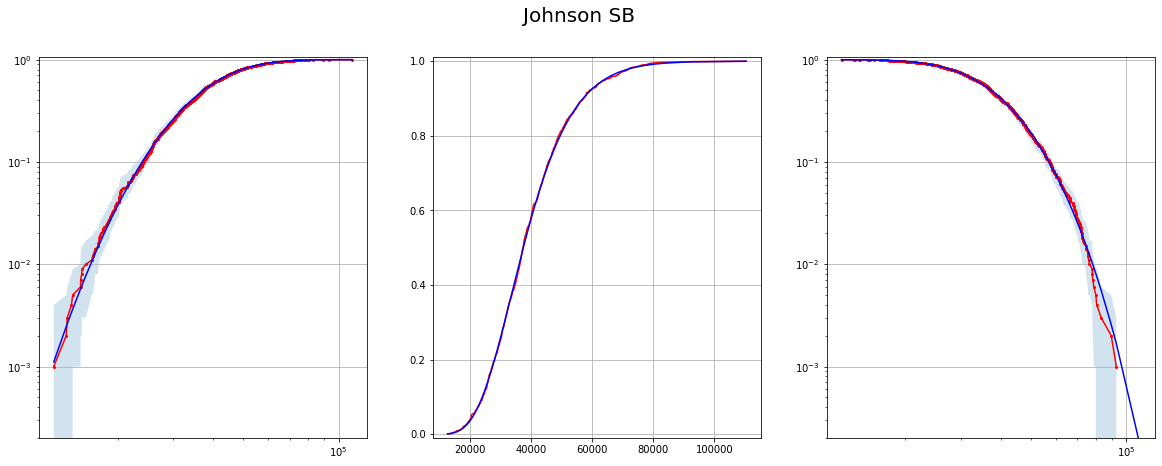



********************************************************************************************************************
17 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00016066718368058913.csv
********************************************************************************************************************
Johnson SB parameters: a 2.897196051779428, b 2.190390619146176, location 6589.024117984458, scale 195758.61032528605
Cheng parametrization: a 6589.024117984458, b 202347.6344432705, gamma 2.897196051779428, delta 2.190390619146176


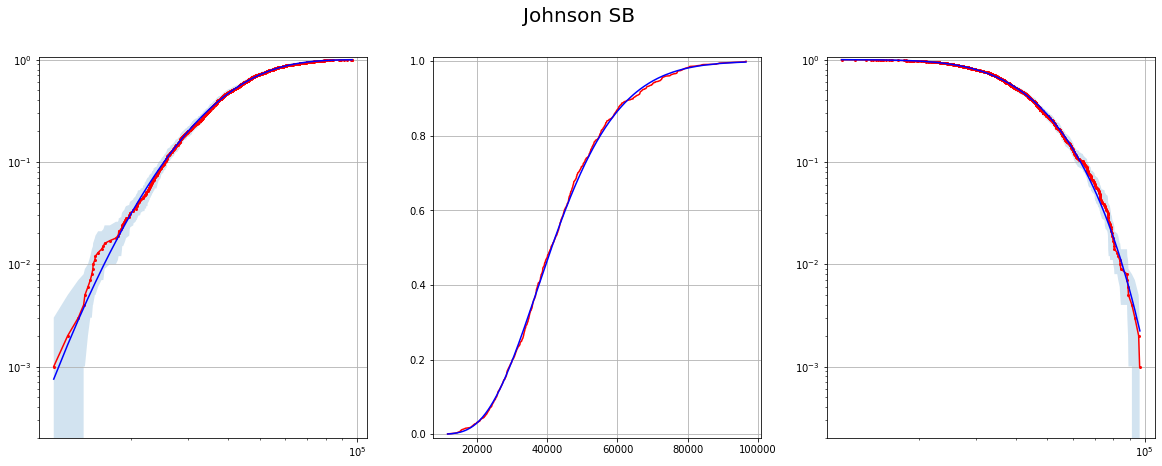



*******************************************************************************************************************
18 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.0002008339796007364.csv
*******************************************************************************************************************
Johnson SB parameters: a 9.382348316261318, b 3.24373584578466, location 4.440163446205773e-06, scale 999184.1387060658
Cheng parametrization: a 4.440163446205773e-06, b 999184.138710506, gamma 9.382348316261318, delta 3.24373584578466


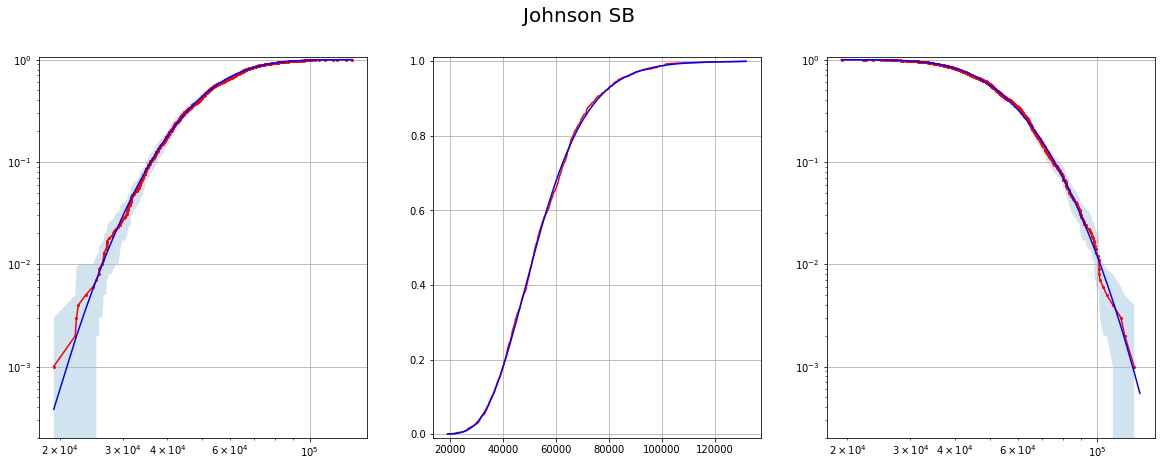



********************************************************************************************************************
19 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00024100077552088365.csv
********************************************************************************************************************
Johnson SB parameters: a 11.884635857086074, b 3.20090653287461, location 2226.1219986571773, scale 2364621.369204469
Cheng parametrization: a 2226.1219986571773, b 2366847.491203126, gamma 11.884635857086074, delta 3.20090653287461


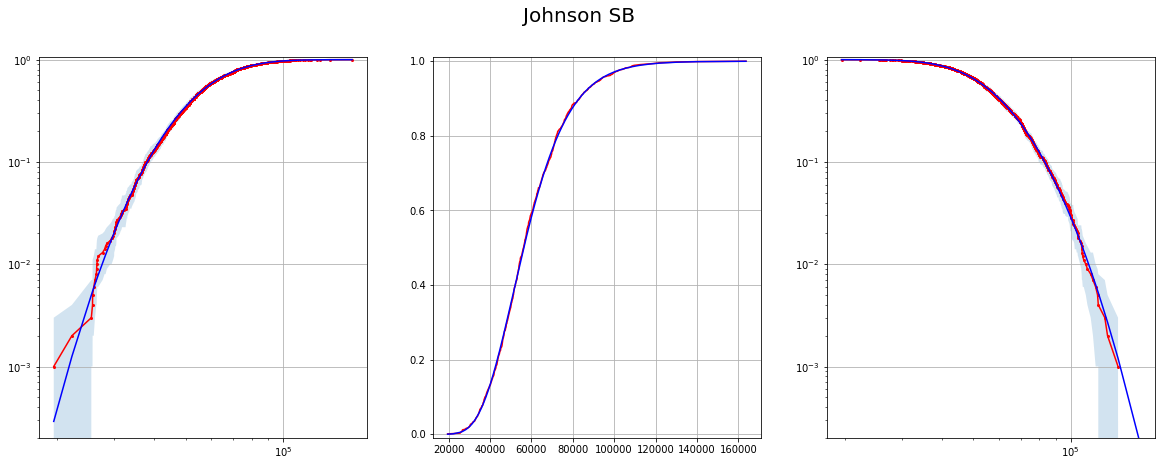



*******************************************************************************************************************
20 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.0002811675714410309.csv
*******************************************************************************************************************
Johnson SB parameters: a 6.43548962905901, b 3.008971778274817, location 991.8163773684449, scale 604542.1480073265
Cheng parametrization: a 991.8163773684449, b 605533.9643846949, gamma 6.43548962905901, delta 3.008971778274817


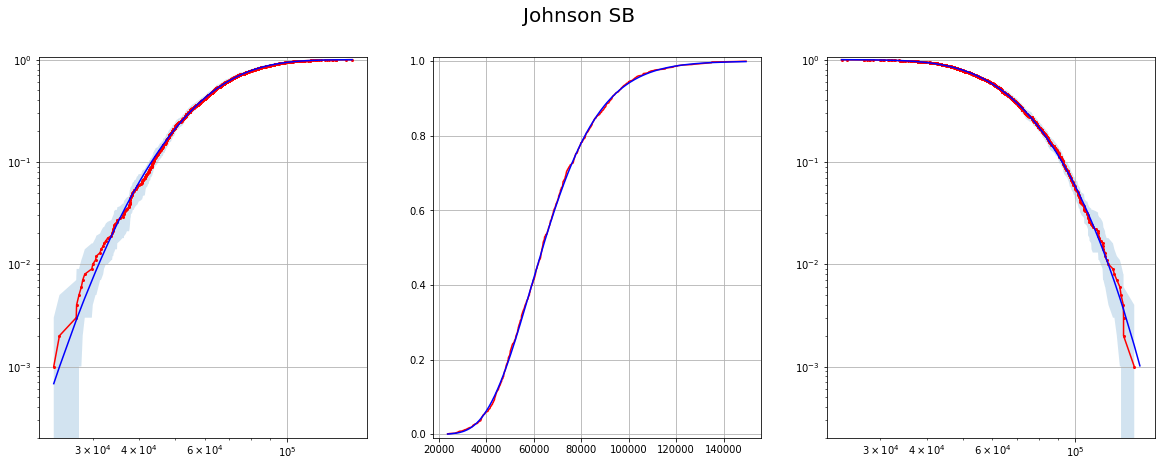



********************************************************************************************************************
21 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00032133436736117826.csv
********************************************************************************************************************
Johnson SB parameters: a 5.480002985372065, b 3.0565760790918475, location 5.903347030535241e-06, scale 489347.9938036308
Cheng parametrization: a 5.903347030535241e-06, b 489347.9938095342, gamma 5.480002985372065, delta 3.0565760790918475


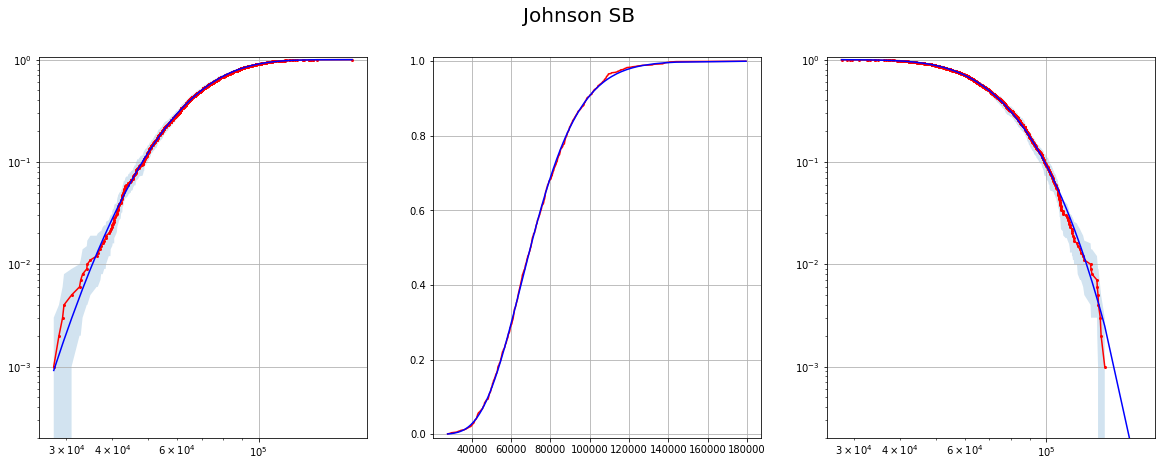



*******************************************************************************************************************
22 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance9.656369259560487e-06.csv
*******************************************************************************************************************
Johnson SB parameters: a 13.063898406362618, b 3.6519530519143153, location 3123.412053995417, scale 242725.6183094649
Cheng parametrization: a 3123.412053995417, b 245849.0303634603, gamma 13.063898406362618, delta 3.6519530519143153


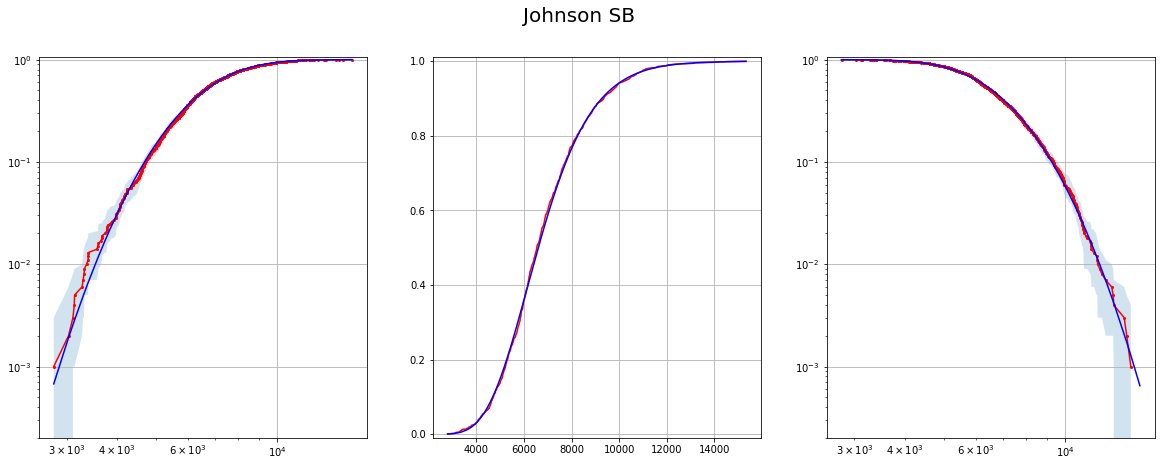



********************************************************************************************************************
23 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance1.9312738519120974e-05.csv
********************************************************************************************************************
Johnson SB parameters: a 14.787359341030005, b 3.572409122445718, location 2335.4019794487754, scale 470527.02679324476
Cheng parametrization: a 2335.4019794487754, b 472862.42877269356, gamma 14.787359341030005, delta 3.572409122445718


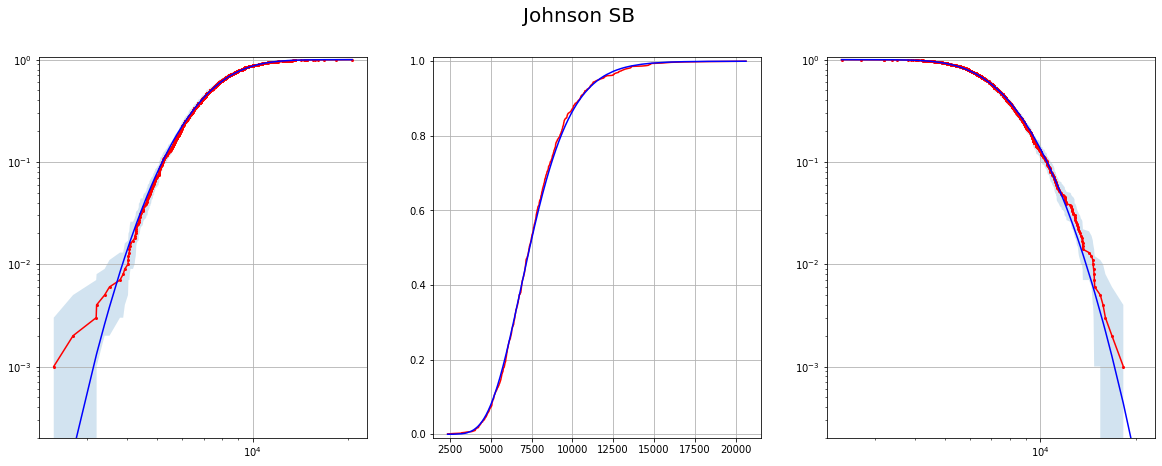



*******************************************************************************************************************
24 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance3.862547703824195e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 5.2454470236728445, b 2.3792639117526733, location 3257.5635938070154, scale 62985.809381719184
Cheng parametrization: a 3257.5635938070154, b 66243.3729755262, gamma 5.2454470236728445, delta 2.3792639117526733


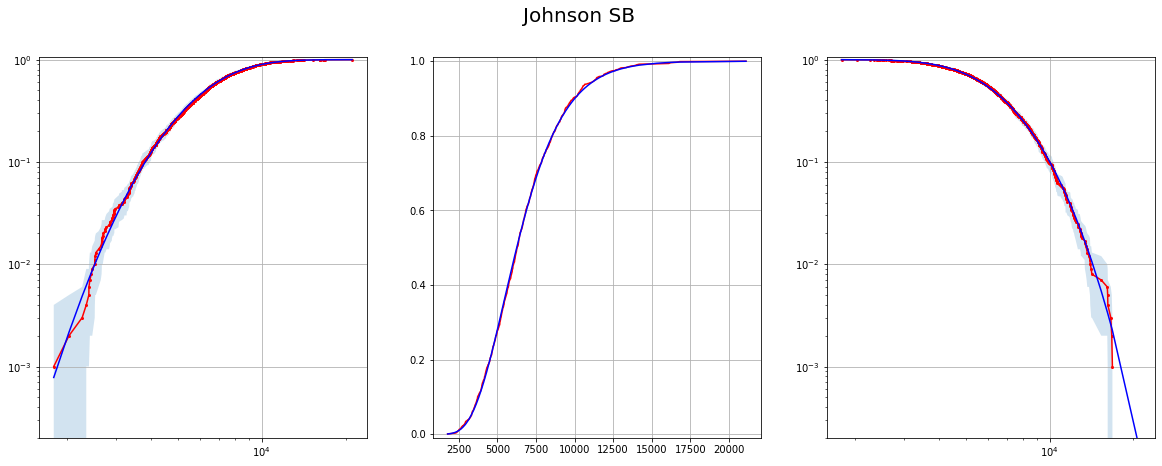



*******************************************************************************************************************
25 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance5.793821555736291e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 7.193019438060279, b 2.7381532338985854, location 2077.516298071152, scale 110980.44482637005
Cheng parametrization: a 2077.516298071152, b 113057.9611244412, gamma 7.193019438060279, delta 2.7381532338985854


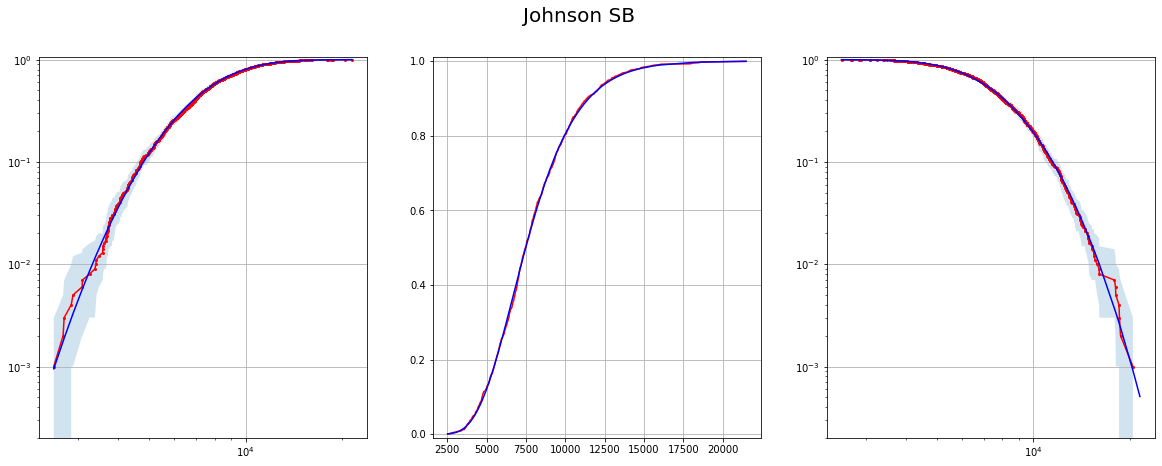



******************************************************************************************************************
26 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance7.72509540764839e-05.csv
******************************************************************************************************************
Johnson SB parameters: a 11.629520055885905, b 3.1173980377397736, location 1494.867814966379, scale 341712.38145778654
Cheng parametrization: a 1494.867814966379, b 343207.2492727529, gamma 11.629520055885905, delta 3.1173980377397736


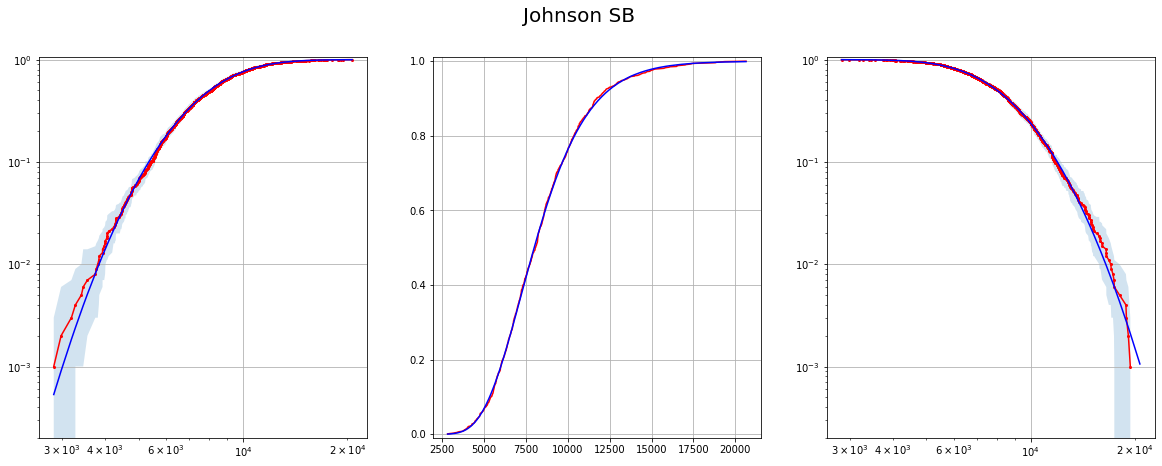



********************************************************************************************************************
27 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.00011587643111472581.csv
********************************************************************************************************************
Johnson SB parameters: a 11.273484012325383, b 3.2747401371386635, location 616.736714137834, scale 286528.64453782234
Cheng parametrization: a 616.736714137834, b 287145.3812519602, gamma 11.273484012325383, delta 3.2747401371386635


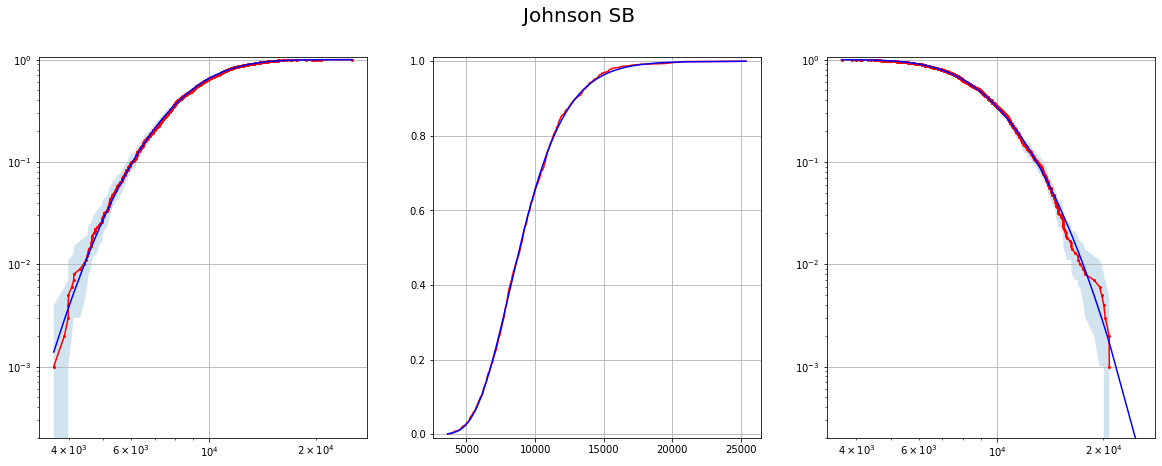



*******************************************************************************************************************
28 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0001545019081529678.csv
*******************************************************************************************************************
Johnson SB parameters: a 12.681281719726066, b 3.602867760394318, location 272.68206599173436, scale 315207.0554079041
Cheng parametrization: a 272.68206599173436, b 315479.73747389583, gamma 12.681281719726066, delta 3.602867760394318


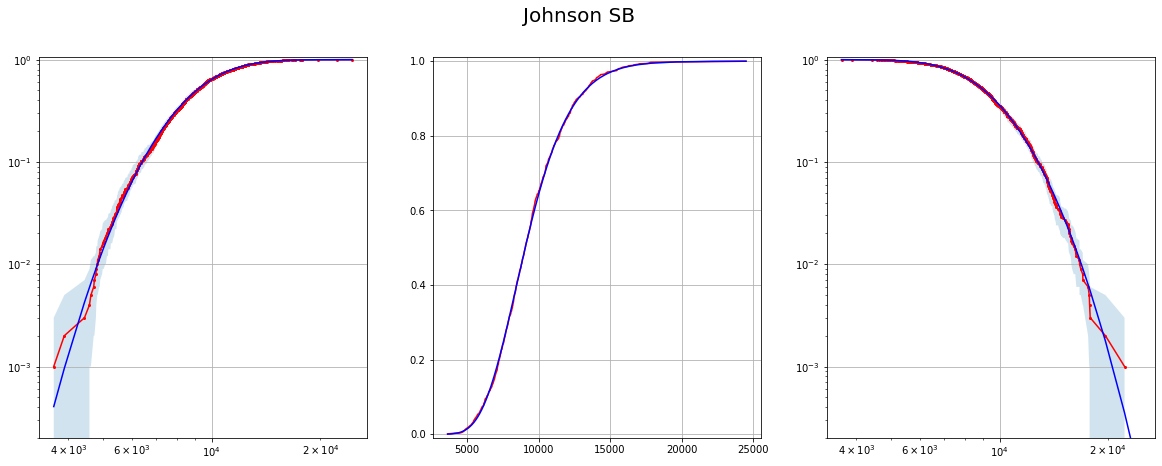



*******************************************************************************************************************
29 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0001931273851912097.csv
*******************************************************************************************************************
Johnson SB parameters: a 10.8290771211716, b 3.1695987767525766, location 1085.2081298289927, scale 253128.46966281167
Cheng parametrization: a 1085.2081298289927, b 254213.67779264066, gamma 10.8290771211716, delta 3.1695987767525766


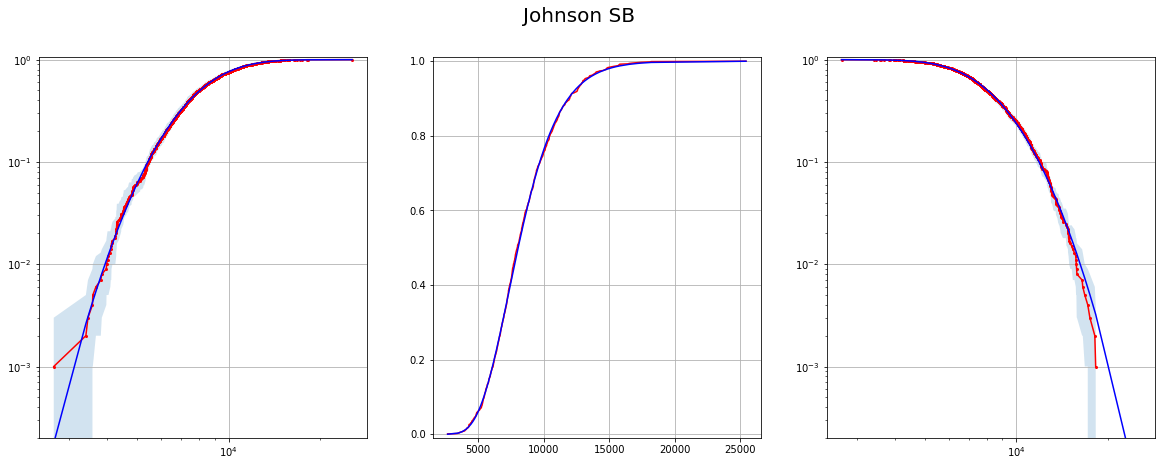



********************************************************************************************************************
30 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.00023175286222945163.csv
********************************************************************************************************************
Johnson SB parameters: a 7.686754881552897, b 2.952765558700101, location 1575.4189007022737, scale 109585.24408623825
Cheng parametrization: a 1575.4189007022737, b 111160.66298694053, gamma 7.686754881552897, delta 2.952765558700101


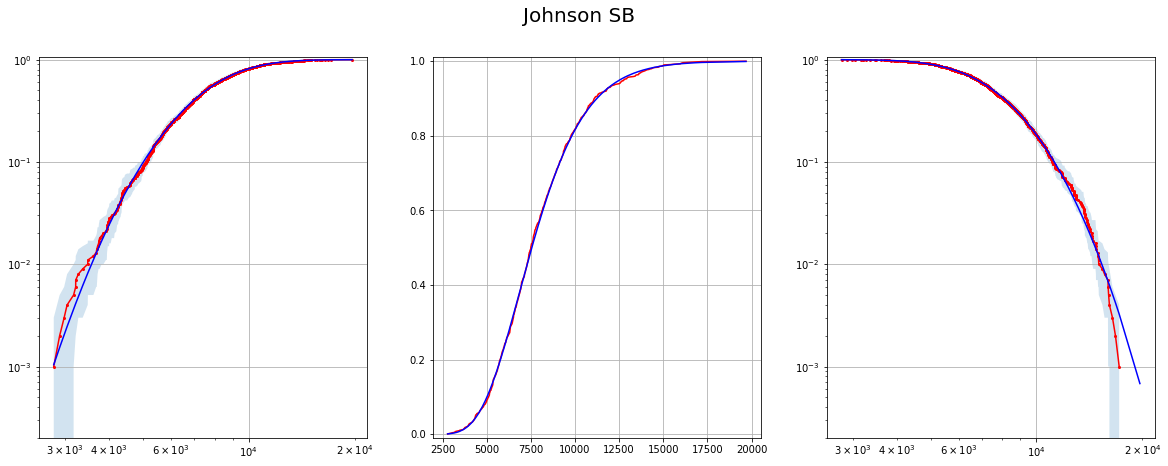



*******************************************************************************************************************
31 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0002703783392676936.csv
*******************************************************************************************************************
Johnson SB parameters: a 13.842318045247488, b 3.6209045522009813, location 757.0924732990228, scale 392174.6568693551
Cheng parametrization: a 757.0924732990228, b 392931.74934265413, gamma 13.842318045247488, delta 3.6209045522009813


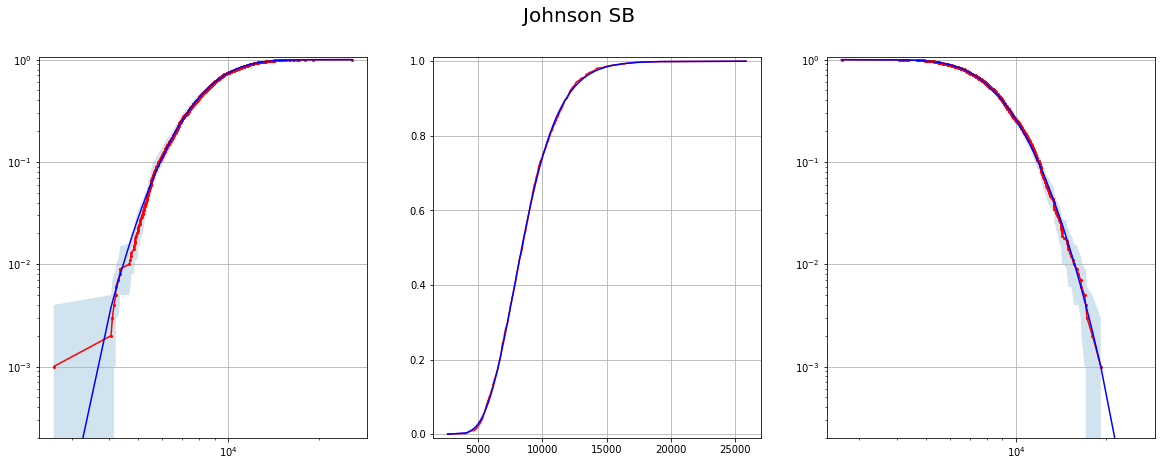



*******************************************************************************************************************
32 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0003090038163059356.csv
*******************************************************************************************************************
Johnson SB parameters: a 12.41449110544146, b 3.2008965144876766, location 1651.1633414264168, scale 369362.6817732755
Cheng parametrization: a 1651.1633414264168, b 371013.8451147019, gamma 12.41449110544146, delta 3.2008965144876766


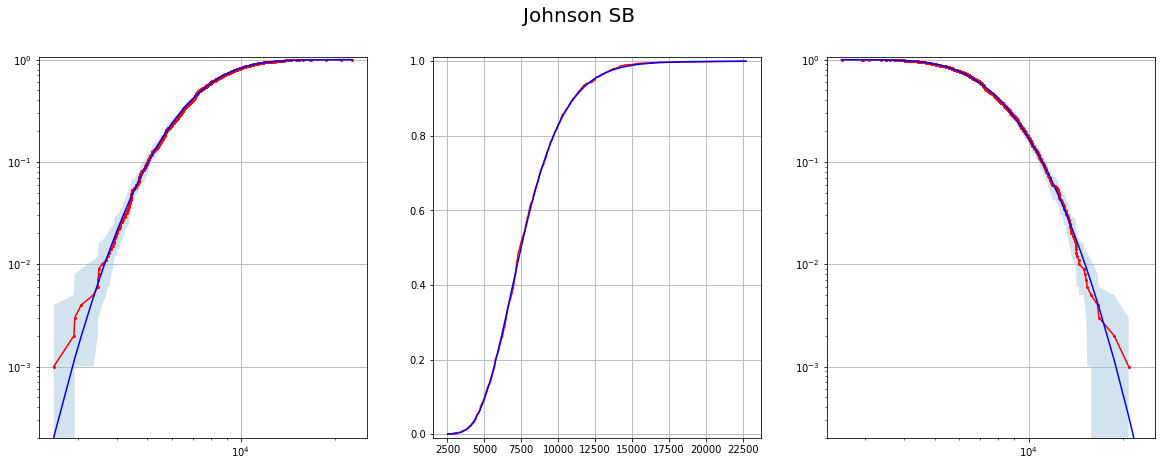



******************************************************************************************************************
33 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance8.493547695058509e-06.csv
******************************************************************************************************************
Johnson SB parameters: a 15.177538830605208, b 3.9555572795627825, location 18841.97031870371, scale 3217299.5765069313
Cheng parametrization: a 18841.97031870371, b 3236141.5468256352, gamma 15.177538830605208, delta 3.9555572795627825


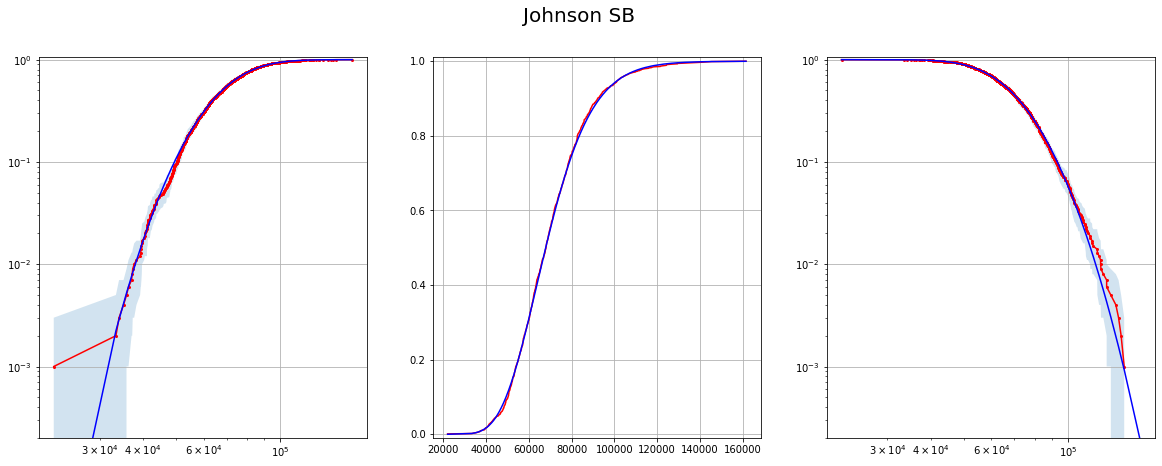



*******************************************************************************************************************
34 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance1.6987095390117018e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.933320190422616, b 3.1742366691067145, location 16417.011839156323, scale 3013416.926827199
Cheng parametrization: a 16417.011839156323, b 3029833.9386663553, gamma 11.933320190422616, delta 3.1742366691067145


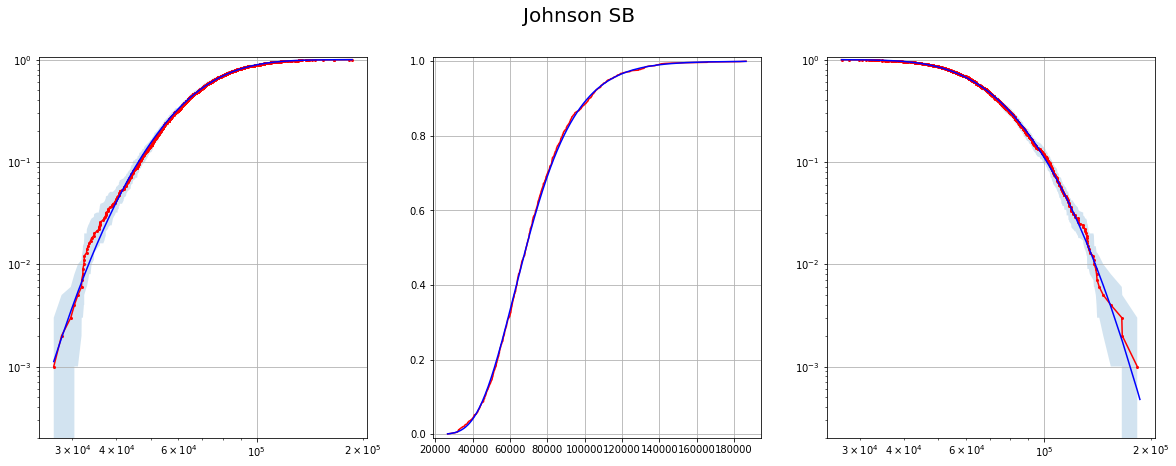



*******************************************************************************************************************
35 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance3.3974190780234035e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 12.337491079608156, b 3.312869973146565, location 110.54201536083576, scale 3646406.6800704375
Cheng parametrization: a 110.54201536083576, b 3646517.222085798, gamma 12.337491079608156, delta 3.312869973146565


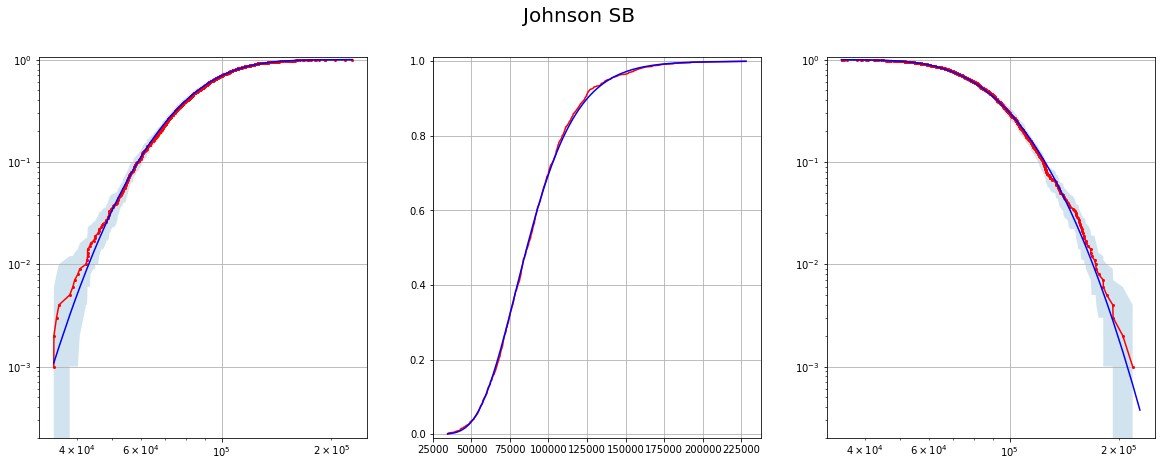



*******************************************************************************************************************
36 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance5.0961286170351056e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 12.413711024738781, b 2.947594539629428, location 3788.89997618101, scale 5589441.448342217
Cheng parametrization: a 3788.89997618101, b 5593230.348318398, gamma 12.413711024738781, delta 2.947594539629428


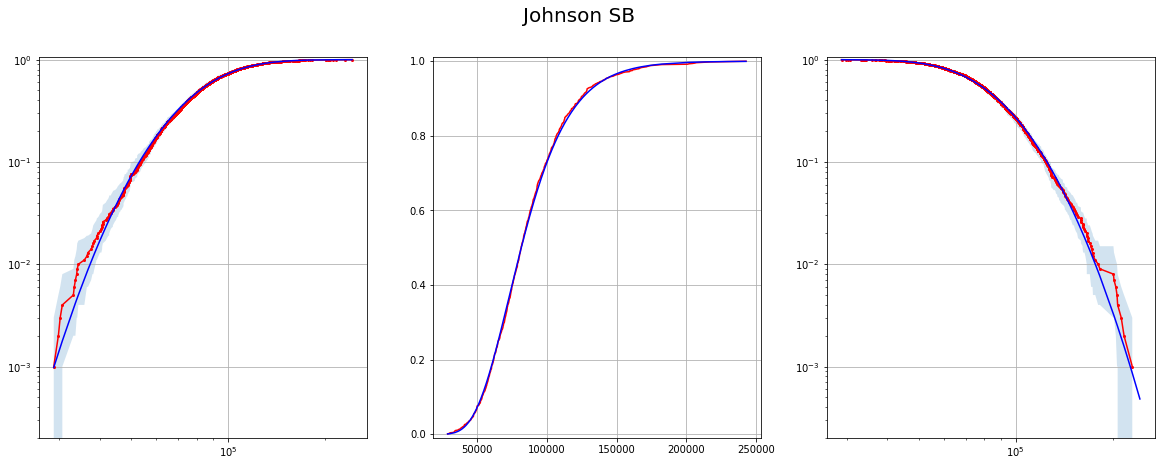



******************************************************************************************************************
37 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance6.794838156046807e-05.csv
******************************************************************************************************************
Johnson SB parameters: a 3.371493359070356, b 1.9388223941967022, location 17796.37729460173, scale 463402.9622261658
Cheng parametrization: a 17796.37729460173, b 481199.33952076756, gamma 3.371493359070356, delta 1.9388223941967022


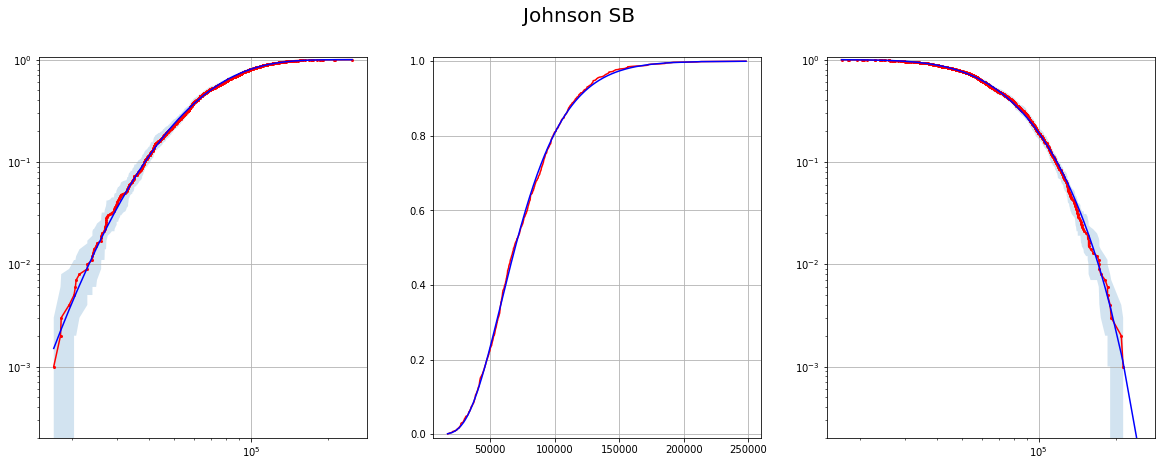



*******************************************************************************************************************
38 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00010192257234070211.csv
*******************************************************************************************************************
Johnson SB parameters: a 4.529193697177552, b 2.162096443229191, location 12886.331682979799, scale 709389.8076049335
Cheng parametrization: a 12886.331682979799, b 722276.1392879133, gamma 4.529193697177552, delta 2.162096443229191


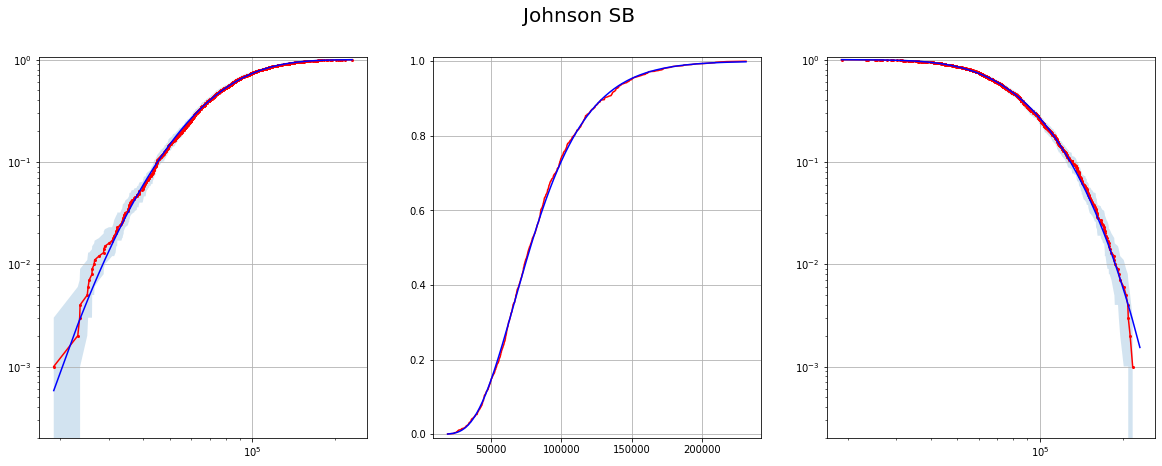



*******************************************************************************************************************
39 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00013589676312093614.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.095723394290587, b 2.6007219677876643, location 8337.352837278508, scale 6497316.731961057
Cheng parametrization: a 8337.352837278508, b 6505654.084798335, gamma 11.095723394290587, delta 2.6007219677876643


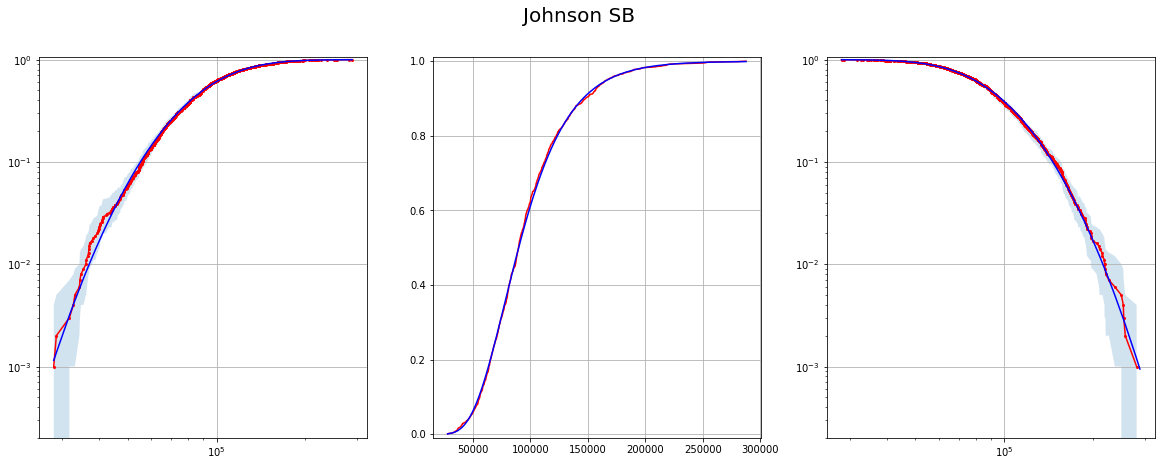



*******************************************************************************************************************
40 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00016987095390117018.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.300498362380264, b 2.86628077826969, location 1235.081320766645, scale 5531147.833034473
Cheng parametrization: a 1235.081320766645, b 5532382.914355239, gamma 11.300498362380264, delta 2.86628077826969


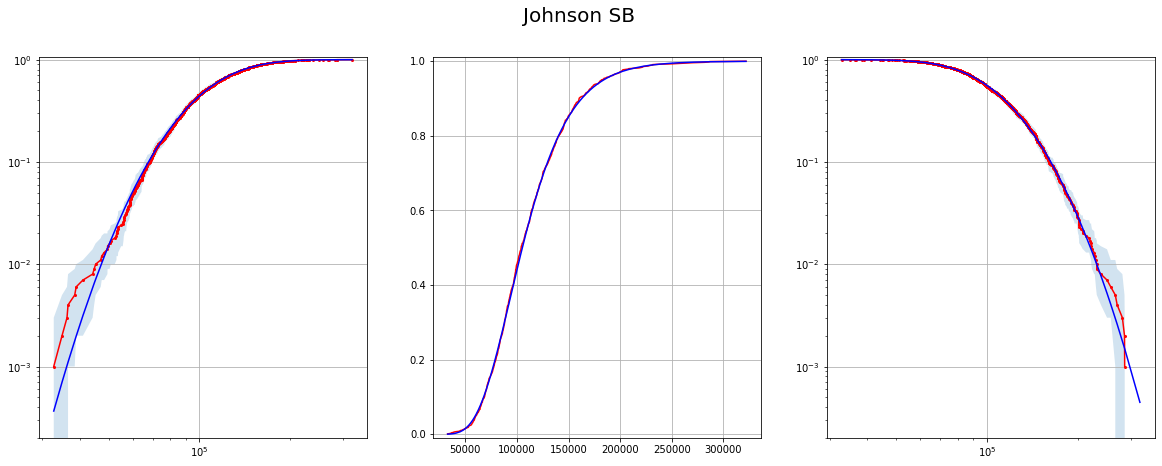



*******************************************************************************************************************
41 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00020384514468140422.csv
*******************************************************************************************************************
Johnson SB parameters: a 7.026993225471303, b 2.553151688681886, location 4710.886380168062, scale 1819912.1374376286
Cheng parametrization: a 4710.886380168062, b 1824623.0238177967, gamma 7.026993225471303, delta 2.553151688681886


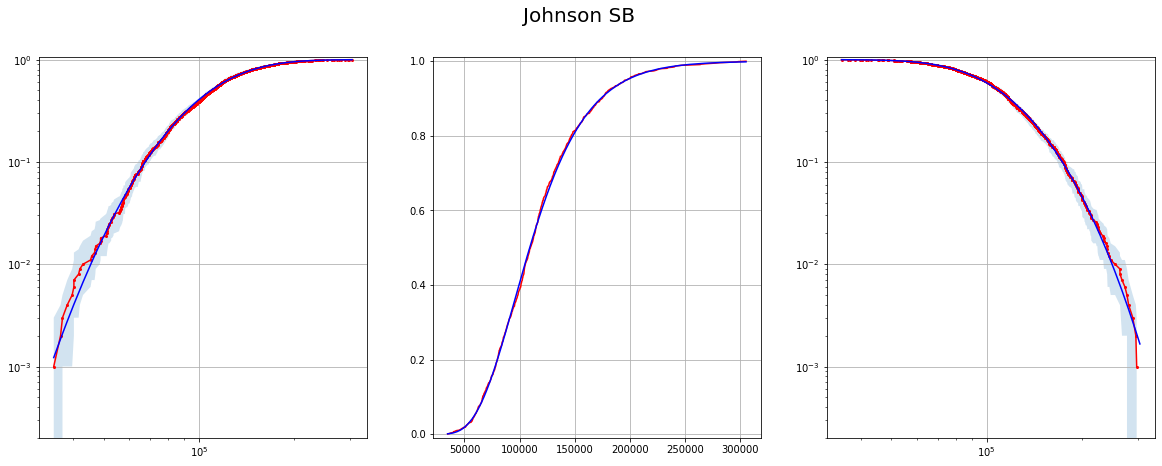



*******************************************************************************************************************
42 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00023781933546163824.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.702441531138525, b 2.965395397162659, location 1751.7986961704244, scale 6285644.114624469
Cheng parametrization: a 1751.7986961704244, b 6287395.913320639, gamma 11.702441531138525, delta 2.965395397162659


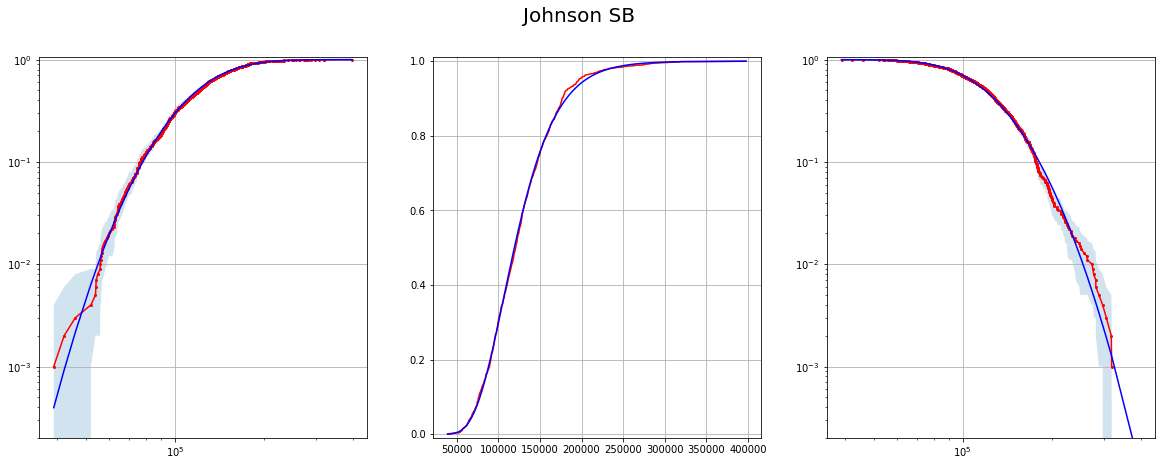



******************************************************************************************************************
43 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.0002717935262418723.csv
******************************************************************************************************************
Johnson SB parameters: a 3.4897363457659267, b 2.1264067032904217, location 17648.62983246099, scale 680269.9585064115
Cheng parametrization: a 17648.62983246099, b 697918.5883388725, gamma 3.4897363457659267, delta 2.1264067032904217


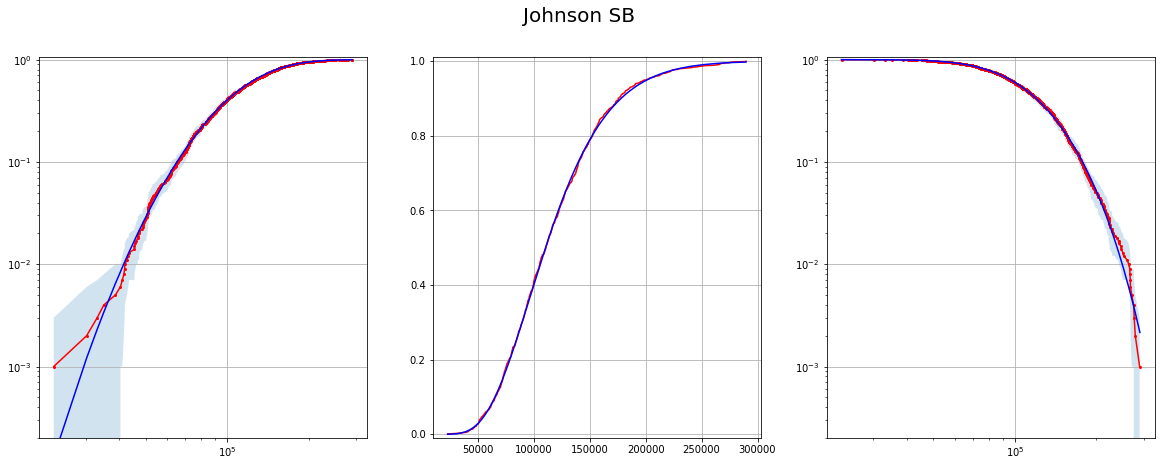



********************************************************************************************************************
44 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance3.6094170198416264e-05.csv
********************************************************************************************************************
Johnson SB parameters: a 0.4376855937215085, b 2.3670094050477317, location 348.7681842904123, scale 524.8131576257535
Cheng parametrization: a 348.7681842904123, b 873.5813419161659, gamma 0.4376855937215085, delta 2.3670094050477317


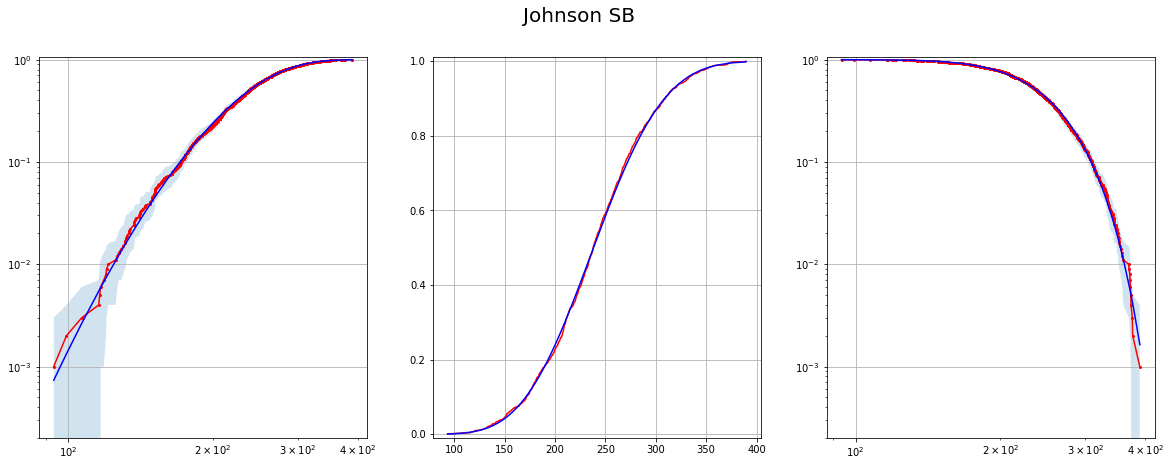



*******************************************************************************************************************
45 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance7.218834039683253e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 0.8937693330030436, b 2.5582805263344364, location 336.2970903681766, scale 556.8401308771516
Cheng parametrization: a 336.2970903681766, b 893.1372212453282, gamma 0.8937693330030436, delta 2.5582805263344364


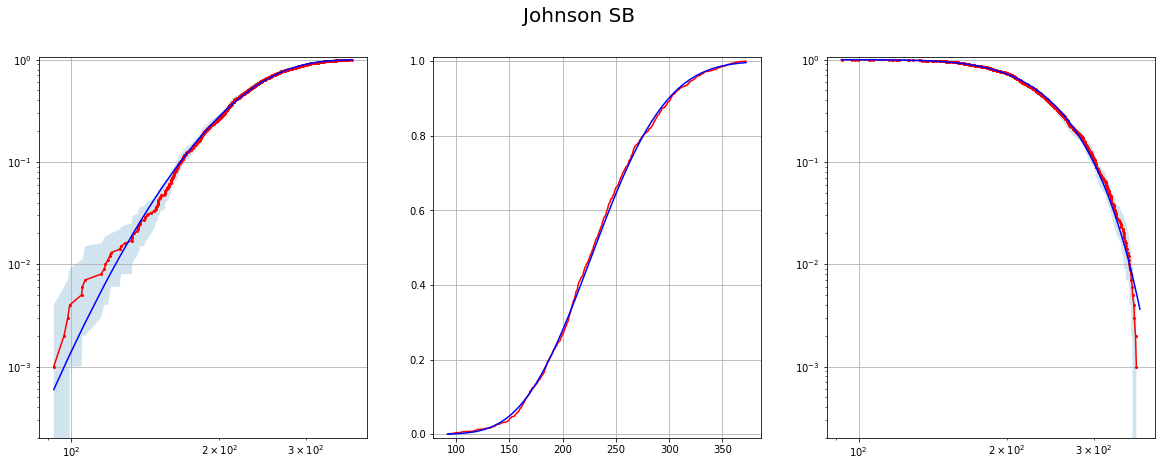



********************************************************************************************************************
46 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.00014437668079366506.csv
********************************************************************************************************************
Johnson SB parameters: a 4.593258934120171, b 5.3104664753026745, location 161.44646863691486, scale 1261.9118930245852
Cheng parametrization: a 161.44646863691486, b 1423.3583616615, gamma 4.593258934120171, delta 5.3104664753026745


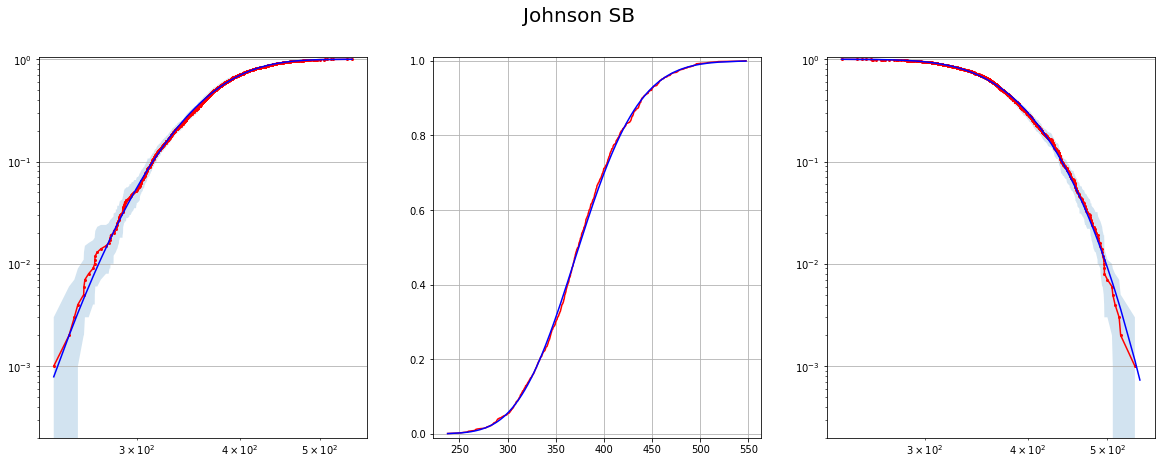



********************************************************************************************************************
47 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.00021656502119049757.csv
********************************************************************************************************************
Johnson SB parameters: a 8.509504395103075, b 7.134076952698855, location 46.60198372884734, scale 1996.1751266134634
Cheng parametrization: a 46.60198372884734, b 2042.7771103423106, gamma 8.509504395103075, delta 7.134076952698855


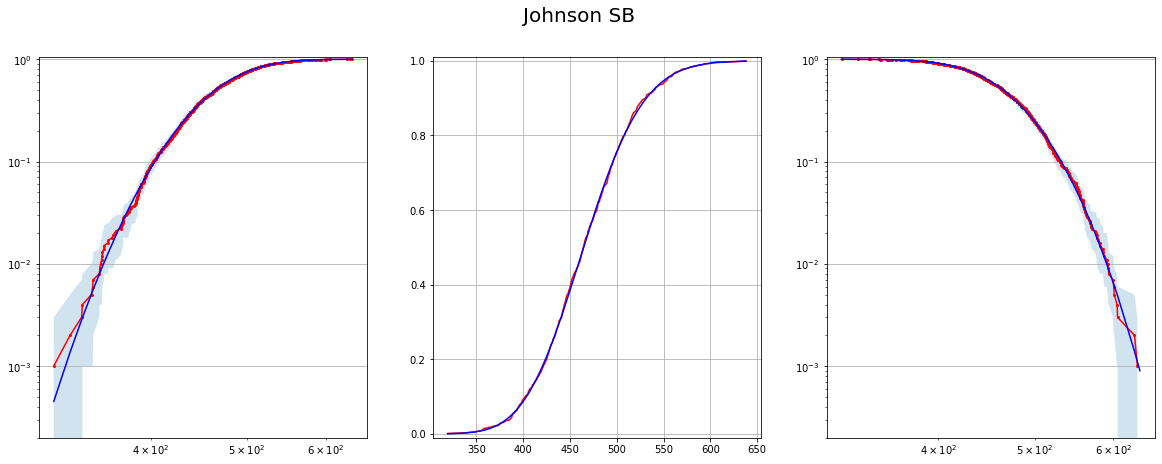



*******************************************************************************************************************
48 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0002887533615873301.csv
*******************************************************************************************************************
Johnson SB parameters: a 15.84859124624078, b 7.569086265139028, location 90.78523987716248, scale 3658.2681134786435
Cheng parametrization: a 90.78523987716248, b 3749.053353355806, gamma 15.84859124624078, delta 7.569086265139028


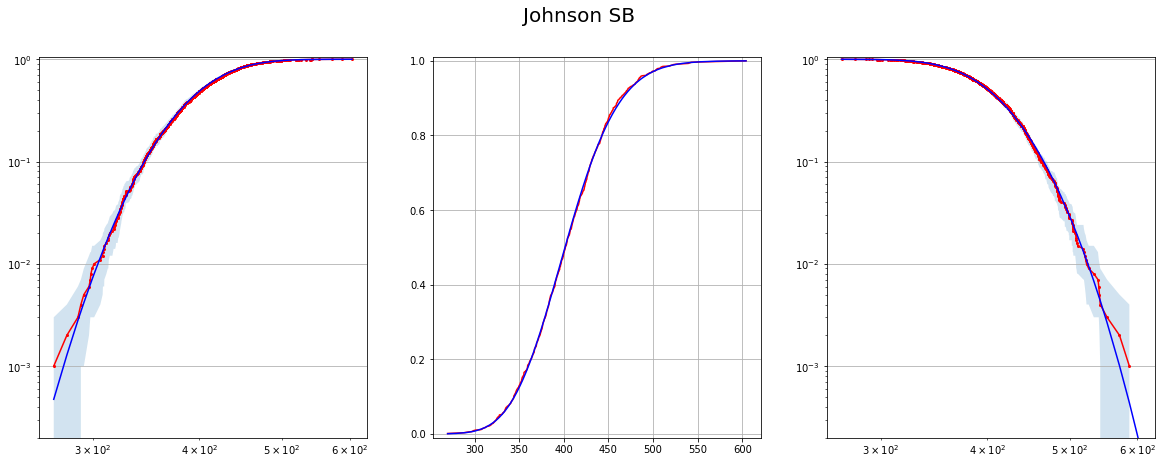



********************************************************************************************************************
49 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.00043313004238099514.csv
********************************************************************************************************************
Johnson SB parameters: a 14.916293103770041, b 7.067962061055935, location 101.06040964254993, scale 3265.294009961489
Cheng parametrization: a 101.06040964254993, b 3366.354419604039, gamma 14.916293103770041, delta 7.067962061055935


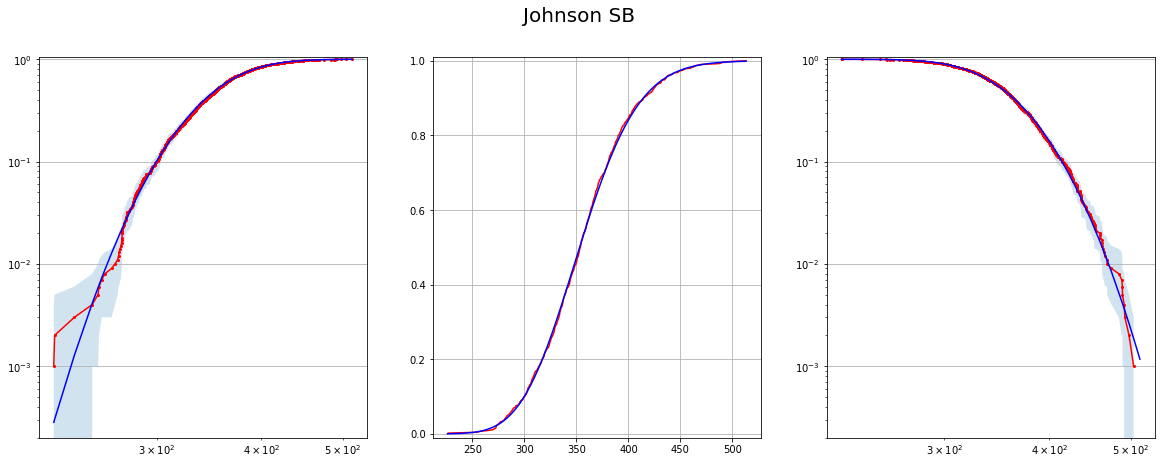



*******************************************************************************************************************
50 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0005775067231746602.csv
*******************************************************************************************************************
Johnson SB parameters: a 16.022633451053977, b 7.508022163077067, location 76.01087504324907, scale 3372.4941117199305
Cheng parametrization: a 76.01087504324907, b 3448.5049867631797, gamma 16.022633451053977, delta 7.508022163077067


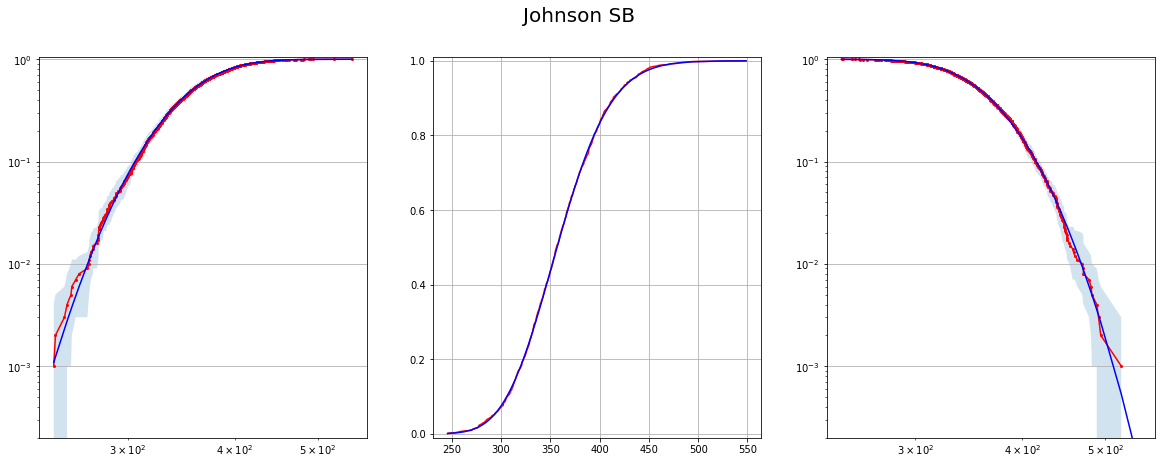



*******************************************************************************************************************
51 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0007218834039683252.csv
*******************************************************************************************************************
Johnson SB parameters: a 2.5000397056175596, b 3.4104263766424423, location 202.53557693430506, scale 645.391654622345
Cheng parametrization: a 202.53557693430506, b 847.92723155665, gamma 2.5000397056175596, delta 3.4104263766424423


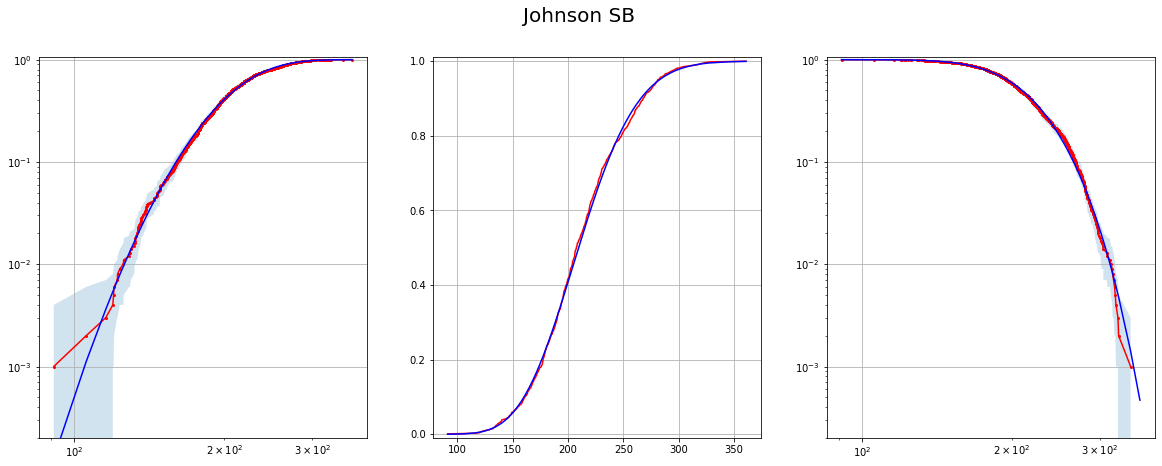



*******************************************************************************************************************
52 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0008662600847619903.csv
*******************************************************************************************************************
Johnson SB parameters: a 17.72591550020011, b 8.89783533914608, location 3.5111804795883477, scale 3277.1397000105862
Cheng parametrization: a 3.5111804795883477, b 3280.6508804901746, gamma 17.72591550020011, delta 8.89783533914608


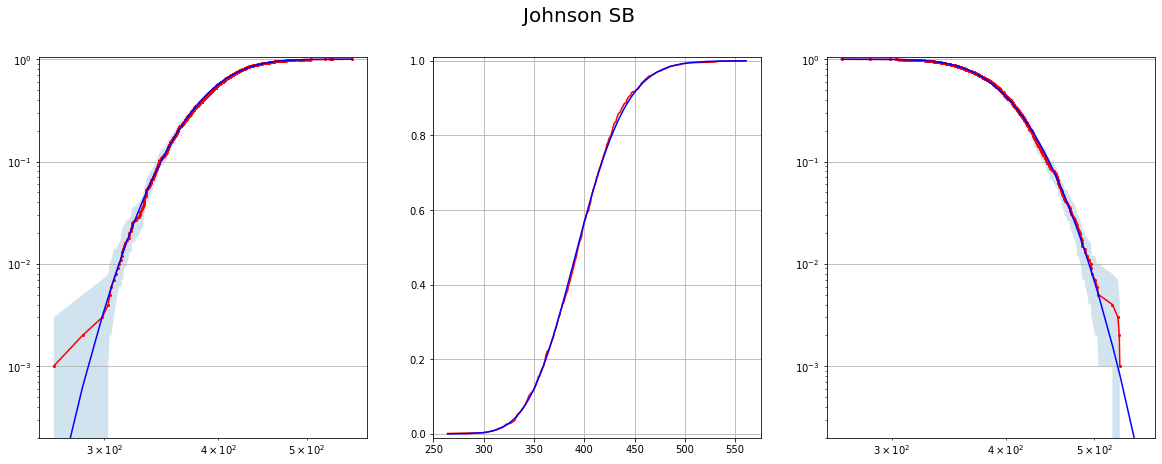



*******************************************************************************************************************
53 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0010106367655556552.csv
*******************************************************************************************************************
Johnson SB parameters: a 7.409318256331991, b 7.3806780154004255, location 4.716697426199228e-06, scale 1431.5294805710014
Cheng parametrization: a 4.716697426199228e-06, b 1431.529485287699, gamma 7.409318256331991, delta 7.3806780154004255


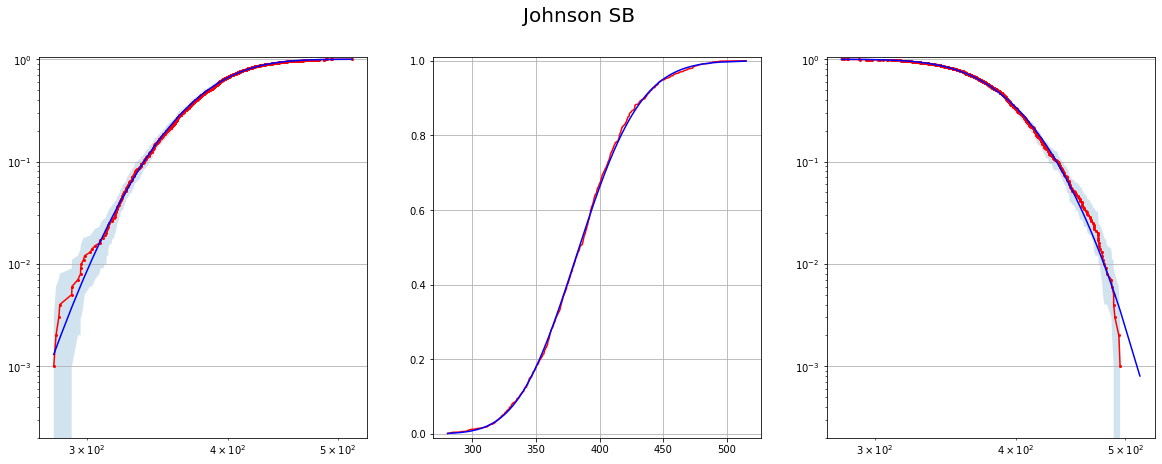



*******************************************************************************************************************
54 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0011550134463493204.csv
*******************************************************************************************************************
Johnson SB parameters: a 16.67207604960479, b 8.014405089690797, location 36.04283891413817, scale 3049.3447043521683
Cheng parametrization: a 36.04283891413817, b 3085.3875432663062, gamma 16.67207604960479, delta 8.014405089690797


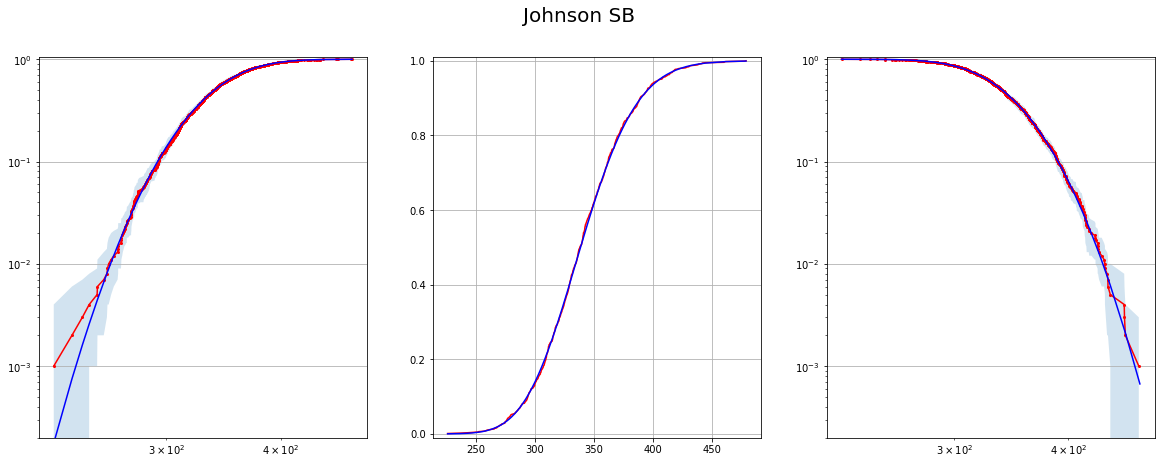



*******************************************************************************************************************
55 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance8.102568628375881e-06.csv
*******************************************************************************************************************
Johnson SB parameters: a 7.665144319241611, b 3.1719821879376164, location 48147.526778315245, scale 1127187.188905714
Cheng parametrization: a 48147.526778315245, b 1175334.7156840293, gamma 7.665144319241611, delta 3.1719821879376164


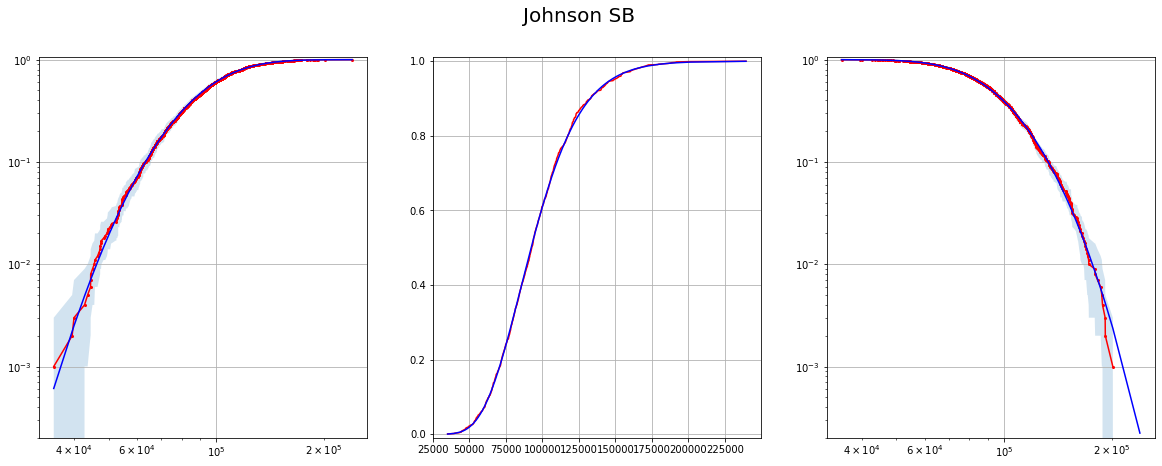



********************************************************************************************************************
56 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance1.6205137256751763e-05.csv
********************************************************************************************************************
Johnson SB parameters: a 12.200620509760778, b 3.490948813580065, location 22597.469286057214, scale 3934044.764323024
Cheng parametrization: a 22597.469286057214, b 3956642.2336090812, gamma 12.200620509760778, delta 3.490948813580065


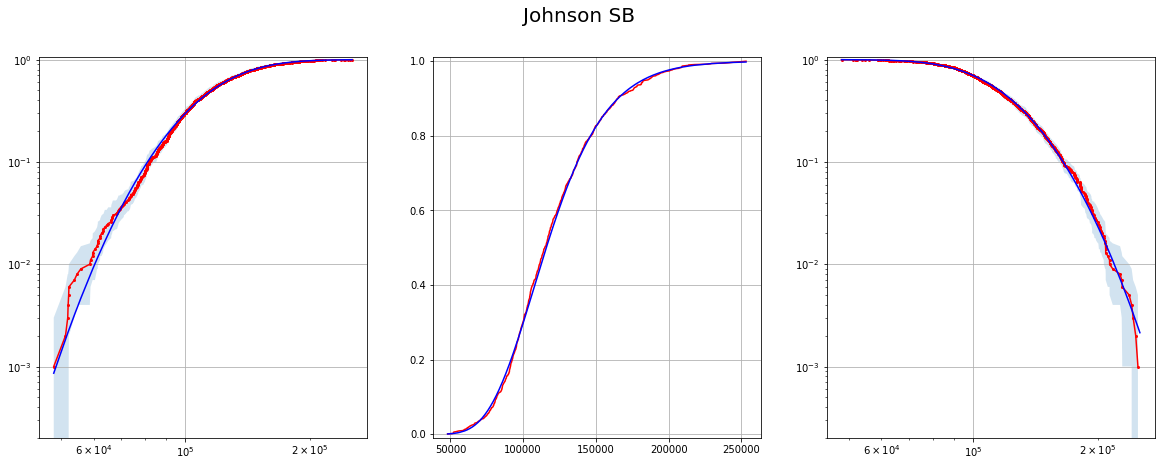



********************************************************************************************************************
57 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance3.2410274513503525e-05.csv
********************************************************************************************************************
Johnson SB parameters: a 6.312367133922921, b 2.49297963544016, location 29307.21965777355, scale 1447942.5533655842
Cheng parametrization: a 29307.21965777355, b 1477249.7730233578, gamma 6.312367133922921, delta 2.49297963544016


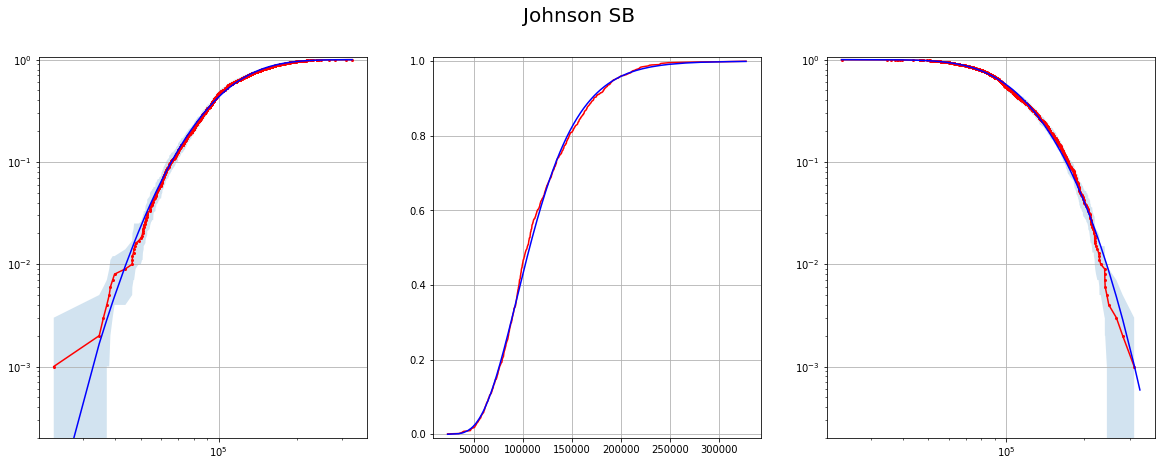



*******************************************************************************************************************
58 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance4.861541177025528e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.63973563794444, b 2.9336090418386505, location 7872.167510535799, scale 6885039.832530167
Cheng parametrization: a 7872.167510535799, b 6892912.0000407025, gamma 11.63973563794444, delta 2.9336090418386505


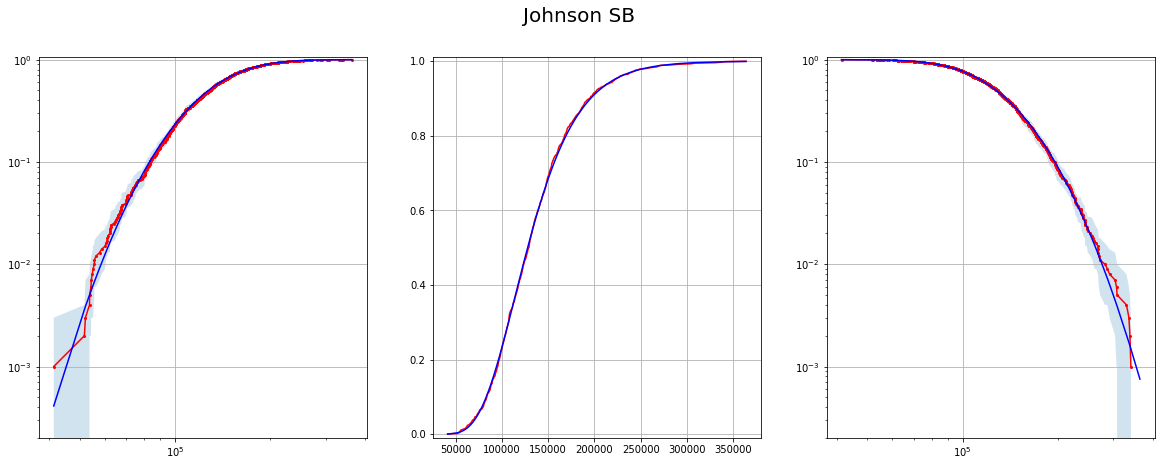



*******************************************************************************************************************
59 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance6.482054902700705e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 7.750436402923837, b 2.502356743820214, location 12010.027040305231, scale 3032913.2345037777
Cheng parametrization: a 12010.027040305231, b 3044923.261544083, gamma 7.750436402923837, delta 2.502356743820214


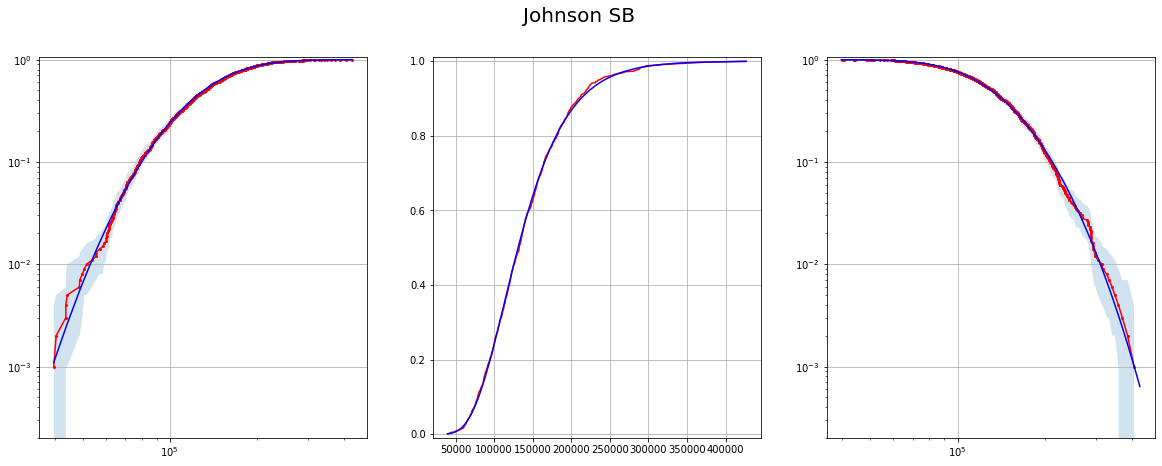



*******************************************************************************************************************
60 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance9.723082354051056e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.081787355113846, b 2.697820021467839, location 7476.458349487697, scale 8946375.735487826
Cheng parametrization: a 7476.458349487697, b 8953852.193837313, gamma 11.081787355113846, delta 2.697820021467839


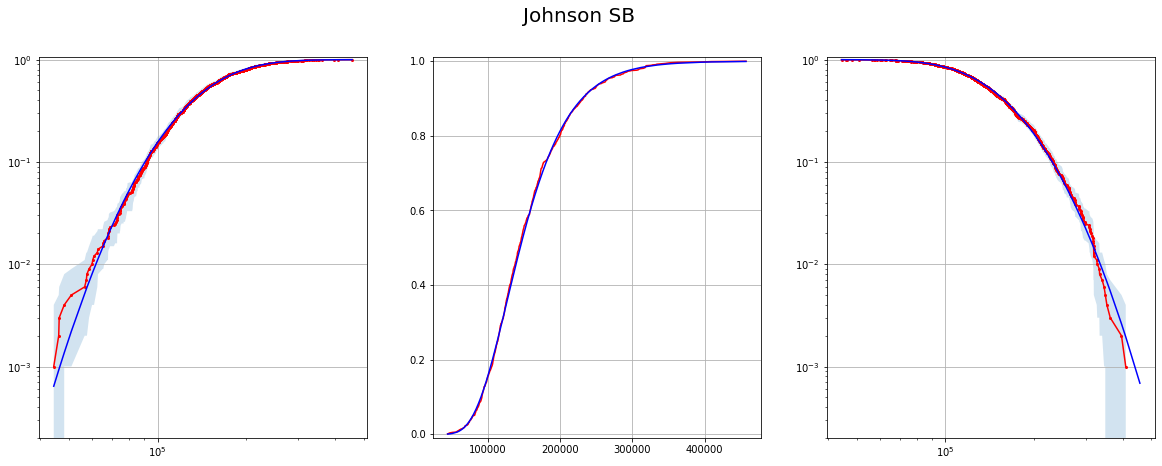



*******************************************************************************************************************
61 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0001296410980540141.csv
*******************************************************************************************************************
Johnson SB parameters: a 4.263466483443823, b 2.0080649274203877, location 28872.94414035665, scale 1240895.2461404281
Cheng parametrization: a 28872.94414035665, b 1269768.1902807849, gamma 4.263466483443823, delta 2.0080649274203877


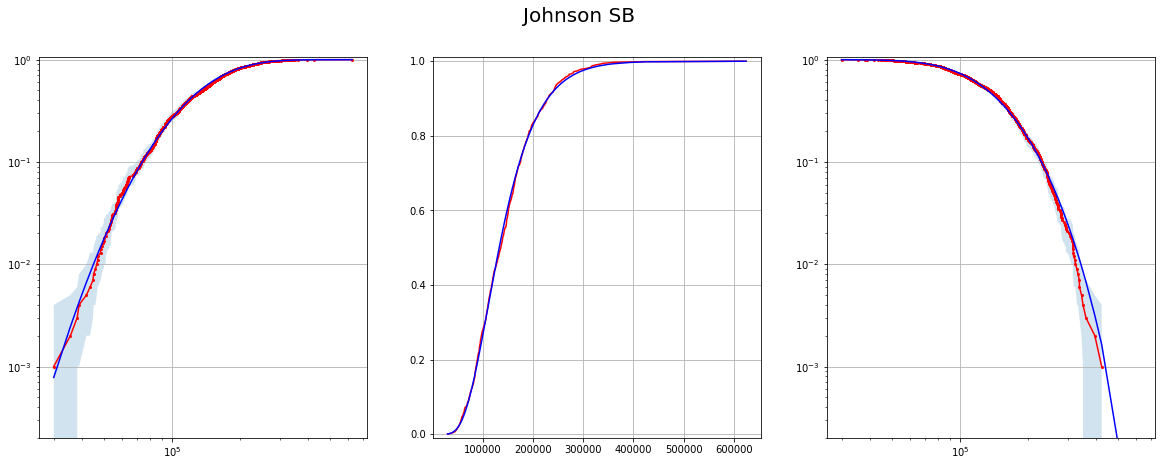



*******************************************************************************************************************
62 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0001620513725675176.csv
*******************************************************************************************************************
Johnson SB parameters: a 3.53512333084603, b 1.9195371738378881, location 34752.33850489994, scale 1060844.0017076675
Cheng parametrization: a 34752.33850489994, b 1095596.3402125675, gamma 3.53512333084603, delta 1.9195371738378881


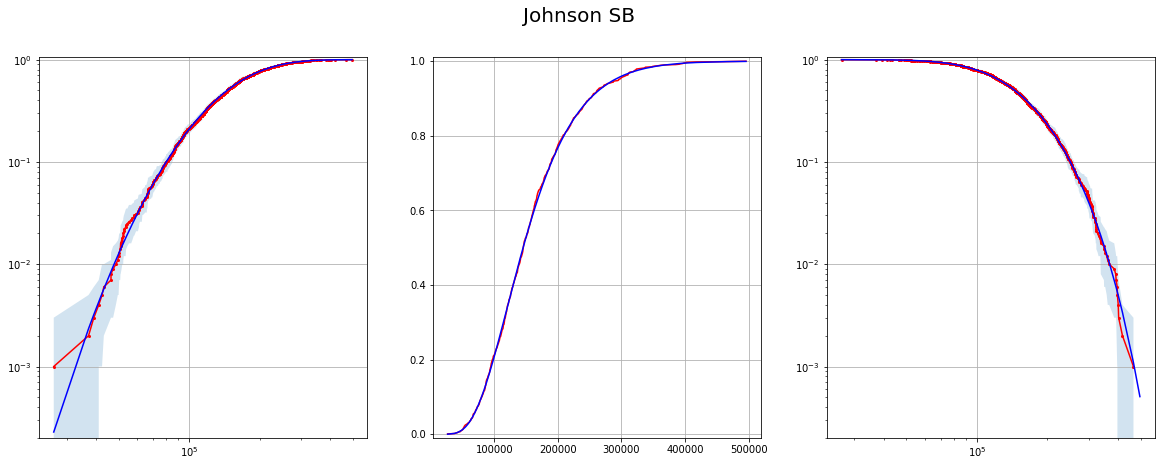



*******************************************************************************************************************
63 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0001944616470810211.csv
*******************************************************************************************************************
Johnson SB parameters: a 3.508573598844563, b 1.939517861321665, location 40025.22982081656, scale 1076349.7996771617
Cheng parametrization: a 40025.22982081656, b 1116375.0294979783, gamma 3.508573598844563, delta 1.939517861321665


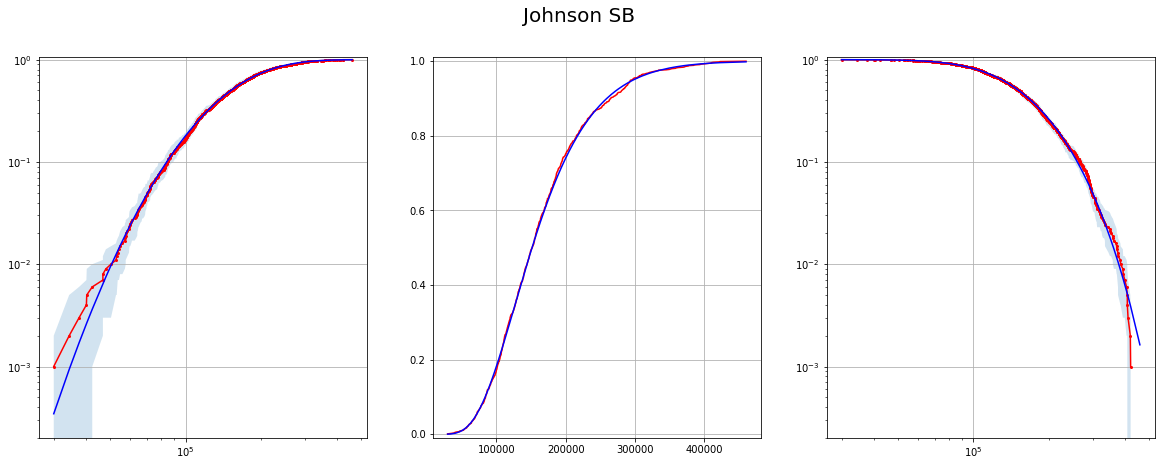



********************************************************************************************************************
64 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.00022687192159452464.csv
********************************************************************************************************************
Johnson SB parameters: a 9.094002686727862, b 2.814721279498604, location 6.058797292877426e-06, scale 5366612.9203924015
Cheng parametrization: a 6.058797292877426e-06, b 5366612.920398461, gamma 9.094002686727862, delta 2.814721279498604


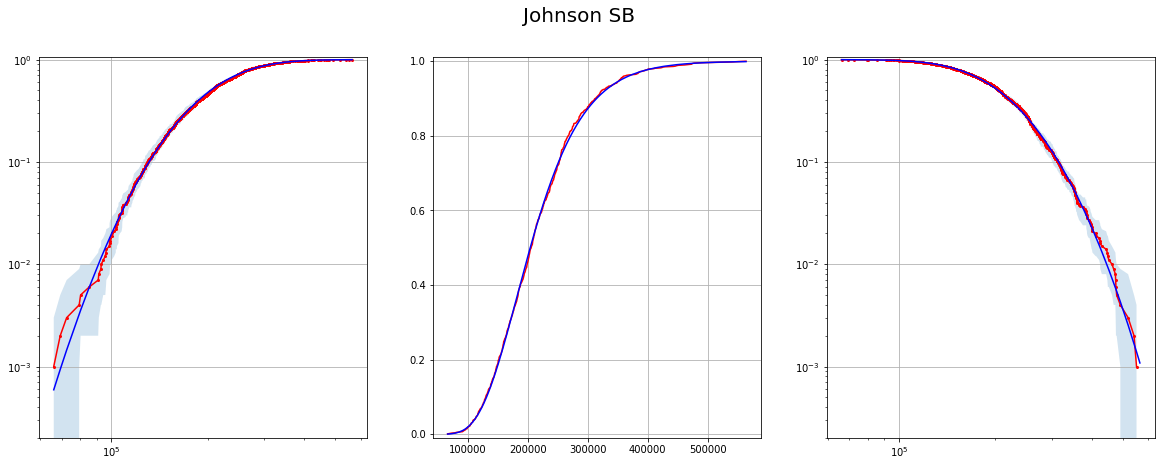



*******************************************************************************************************************
65 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0002592821961080282.csv
*******************************************************************************************************************
Johnson SB parameters: a 3.5536594574356335, b 1.9533630413431826, location 43472.11031169873, scale 1192586.4521384516
Cheng parametrization: a 43472.11031169873, b 1236058.5624501503, gamma 3.5536594574356335, delta 1.9533630413431826


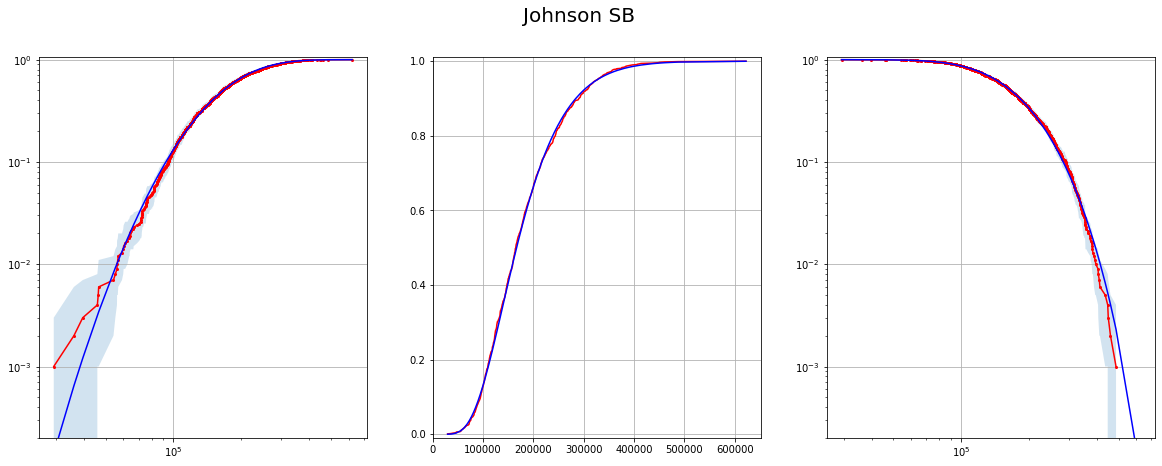



********************************************************************************************************************
66 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance1.9451202139084314e-05.csv
********************************************************************************************************************
Johnson SB parameters: a 15.402701919326894, b 6.569635324659224, location 230.73903536368877, scale 7878.5632175129795
Cheng parametrization: a 230.73903536368877, b 8109.302252876668, gamma 15.402701919326894, delta 6.569635324659224


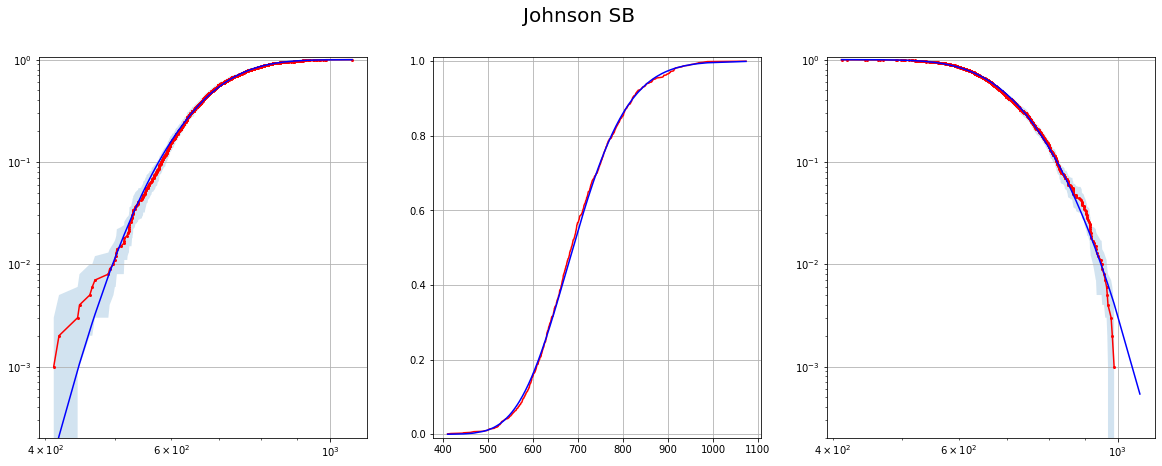



*******************************************************************************************************************
67 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance3.890240427816863e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 2.6502021413032018, b 3.834662949811306, location 325.86785818741566, scale 1648.3392701357338
Cheng parametrization: a 325.86785818741566, b 1974.2071283231494, gamma 2.6502021413032018, delta 3.834662949811306


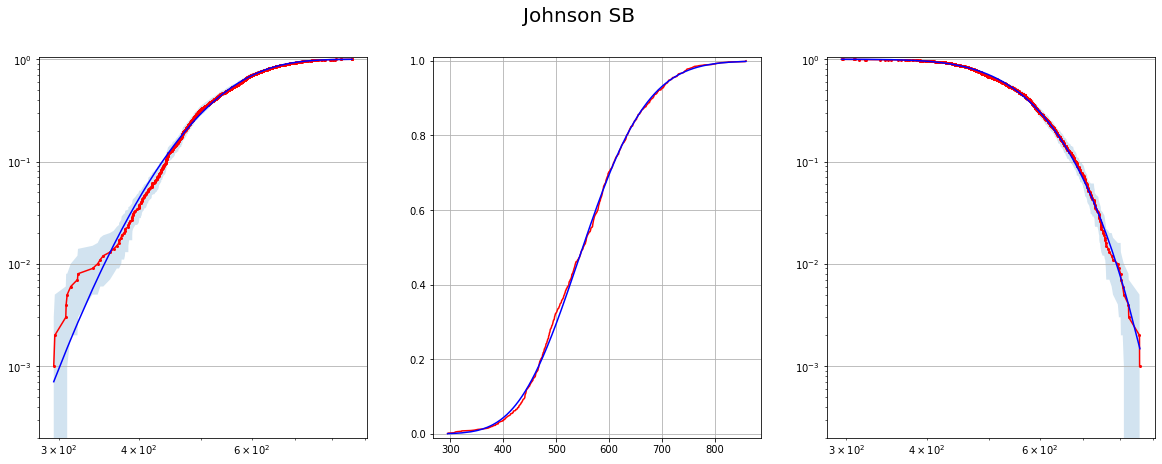



*******************************************************************************************************************
68 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance7.780480855633726e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 13.05394280817433, b 5.081149884864992, location 300.217217692319, scale 7010.267471376275
Cheng parametrization: a 300.217217692319, b 7310.484689068594, gamma 13.05394280817433, delta 5.081149884864992


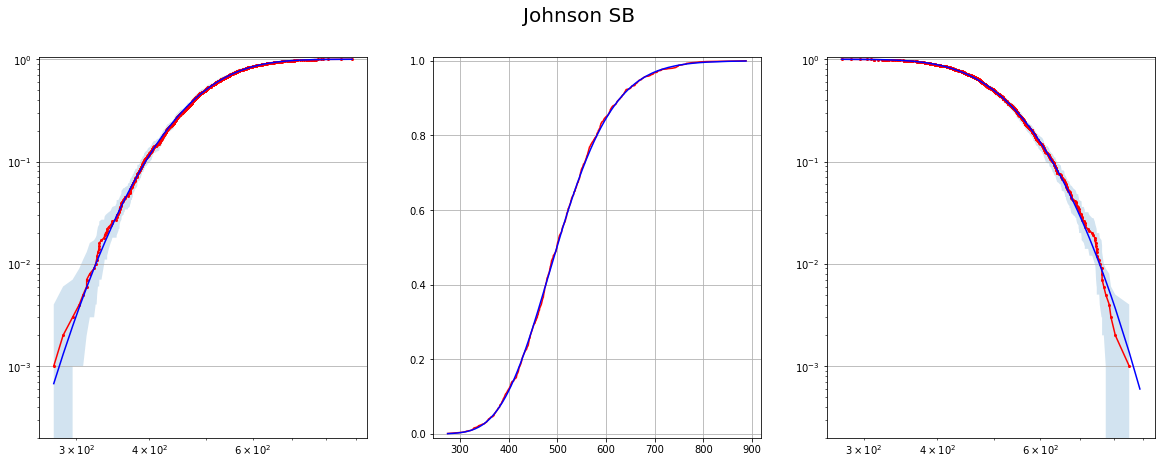



********************************************************************************************************************
69 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.00011670721283450587.csv
********************************************************************************************************************
Johnson SB parameters: a 5.475106768025304, b 3.4707713649884933, location 365.1979420730544, scale 2254.5213502919164
Cheng parametrization: a 365.1979420730544, b 2619.719292364971, gamma 5.475106768025304, delta 3.4707713649884933


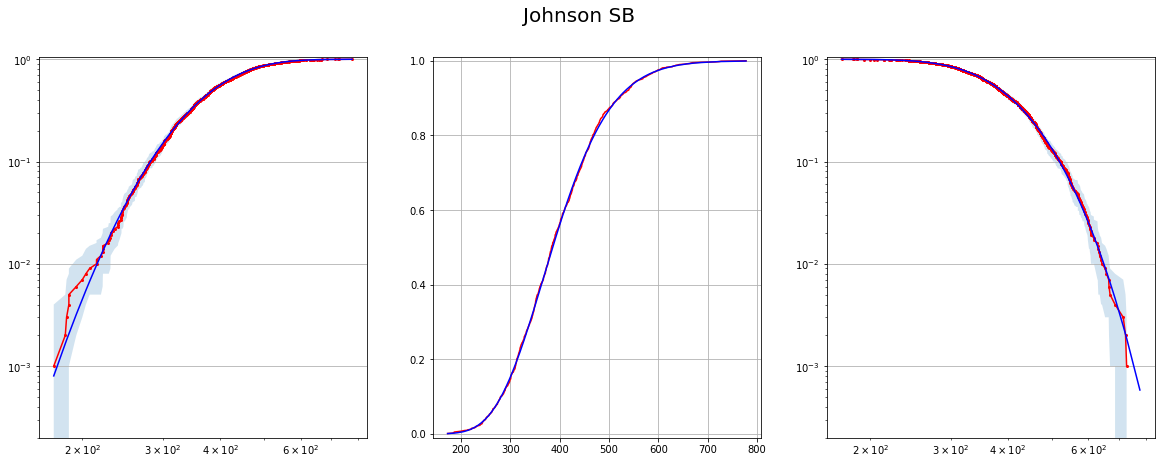



*******************************************************************************************************************
70 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.0001556096171126745.csv
*******************************************************************************************************************
Johnson SB parameters: a 2.5644107009710604, b 2.5396960633500534, location 389.372400166735, scale 1202.4795663384766
Cheng parametrization: a 389.372400166735, b 1591.8519665052117, gamma 2.5644107009710604, delta 2.5396960633500534


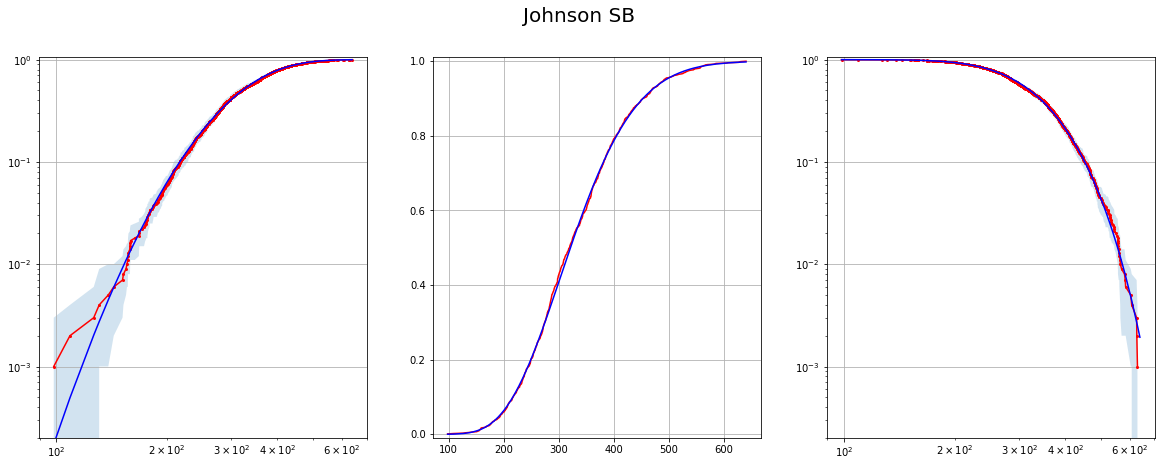



********************************************************************************************************************
71 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.00023341442566901174.csv
********************************************************************************************************************
Johnson SB parameters: a 13.151756496368264, b 5.394843187159765, location 182.32884628089488, scale 5972.314716114577
Cheng parametrization: a 182.32884628089488, b 6154.643562395472, gamma 13.151756496368264, delta 5.394843187159765


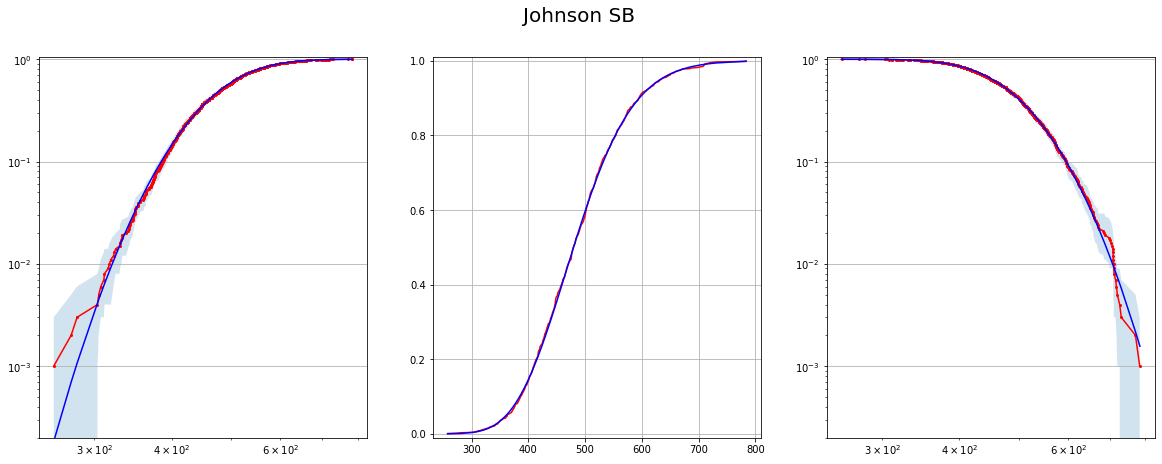



******************************************************************************************************************
72 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.000311219234225349.csv
******************************************************************************************************************
Johnson SB parameters: a 13.347934324987762, b 5.312283571683301, location 169.86186348974323, scale 6141.6987180457145
Cheng parametrization: a 169.86186348974323, b 6311.5605815354575, gamma 13.347934324987762, delta 5.312283571683301


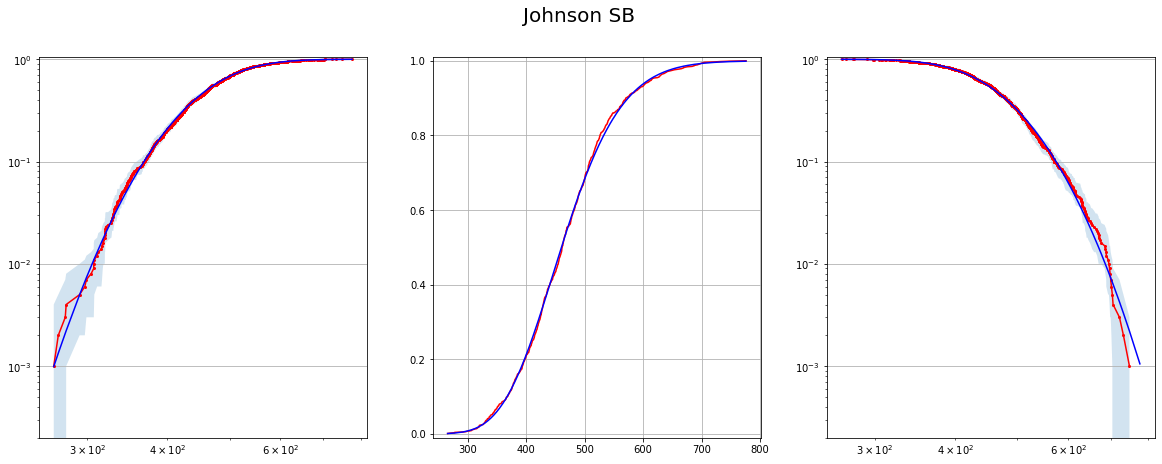



********************************************************************************************************************
73 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.00038902404278168626.csv
********************************************************************************************************************
Johnson SB parameters: a 6.925295170627674, b 5.649108242064685, location 39.24903627254681, scale 2466.5497835691654
Cheng parametrization: a 39.24903627254681, b 2505.798819841712, gamma 6.925295170627674, delta 5.649108242064685


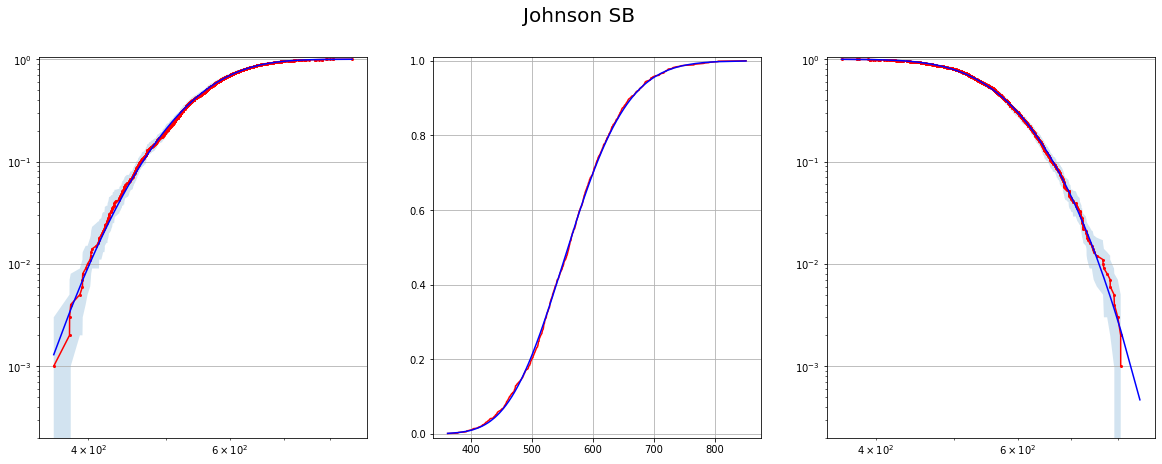



*******************************************************************************************************************
74 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.0004668288513380235.csv
*******************************************************************************************************************
Johnson SB parameters: a 18.30722618431969, b 7.238069197550274, location 44.12000881030734, scale 7292.090946321521
Cheng parametrization: a 44.12000881030734, b 7336.210955131828, gamma 18.30722618431969, delta 7.238069197550274


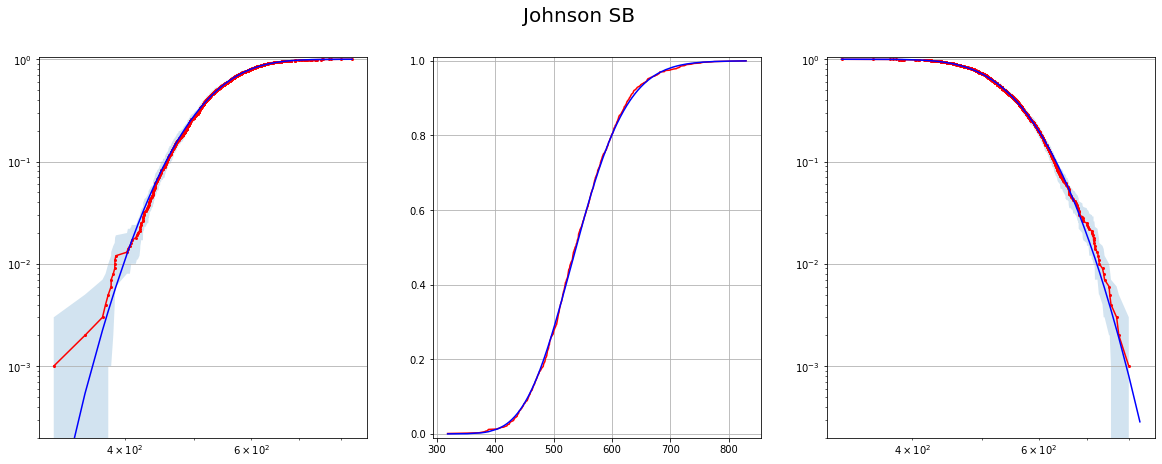



*******************************************************************************************************************
75 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.0005446336598943607.csv
*******************************************************************************************************************
Johnson SB parameters: a 15.08965079703568, b 5.7532060526776, location 114.38426033602157, scale 6669.633686651521
Cheng parametrization: a 114.38426033602157, b 6784.017946987543, gamma 15.08965079703568, delta 5.7532060526776


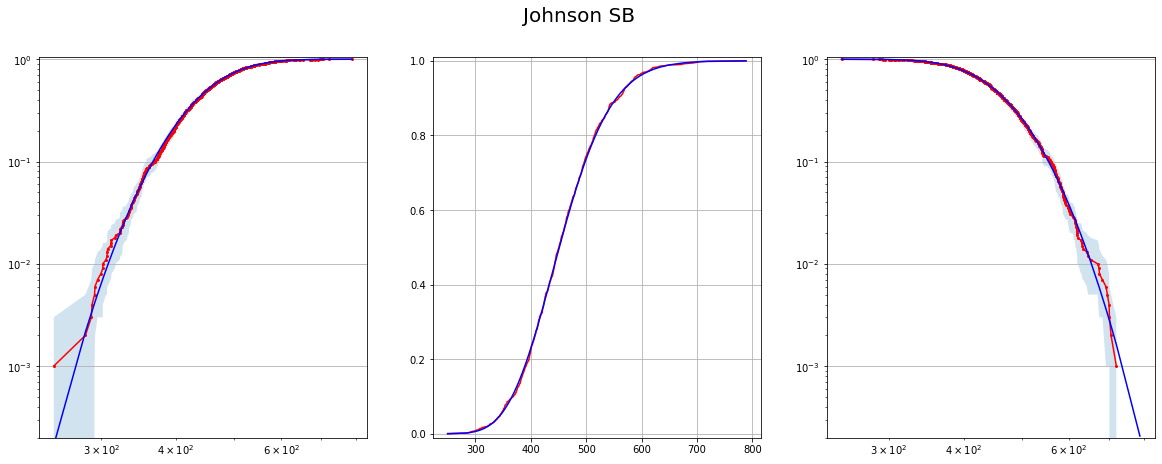



******************************************************************************************************************
76 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.000622438468450698.csv
******************************************************************************************************************
Johnson SB parameters: a 15.120330794610487, b 6.626586238212996, location 45.43712072102079, scale 5489.302992889639
Cheng parametrization: a 45.43712072102079, b 5534.74011361066, gamma 15.120330794610487, delta 6.626586238212996


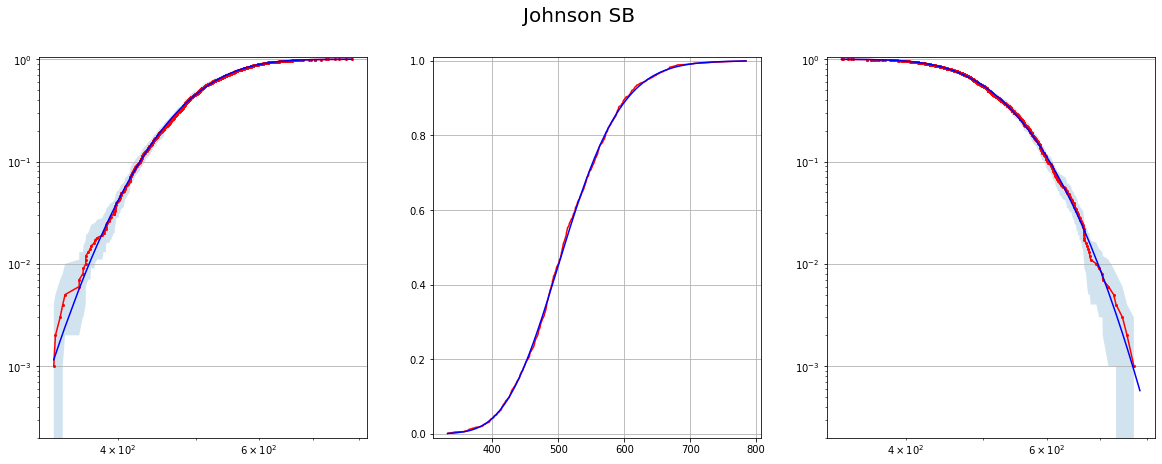



******************************************************************************************************************
77 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance8.44605646486143e-06.csv
******************************************************************************************************************
Johnson SB parameters: a 15.192846379358876, b 4.997005668148475, location 5074.14544838536, scale 5279673.68135076
Cheng parametrization: a 5074.14544838536, b 5284747.826799146, gamma 15.192846379358876, delta 4.997005668148475


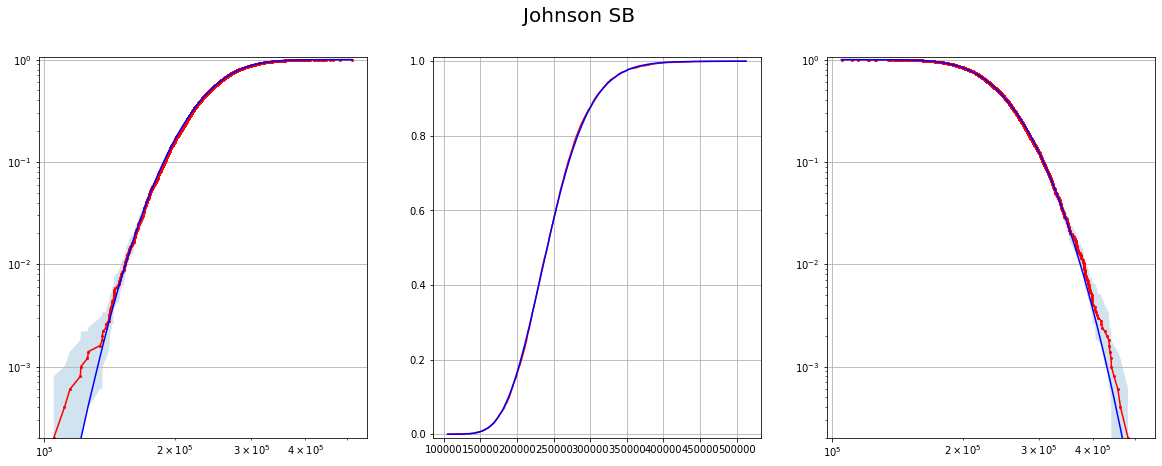



*******************************************************************************************************************
78 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance1.689211292972286e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 13.972230733048171, b 3.706509540758524, location 25368.42131659141, scale 8857095.78464863
Cheng parametrization: a 25368.42131659141, b 8882464.205965223, gamma 13.972230733048171, delta 3.706509540758524


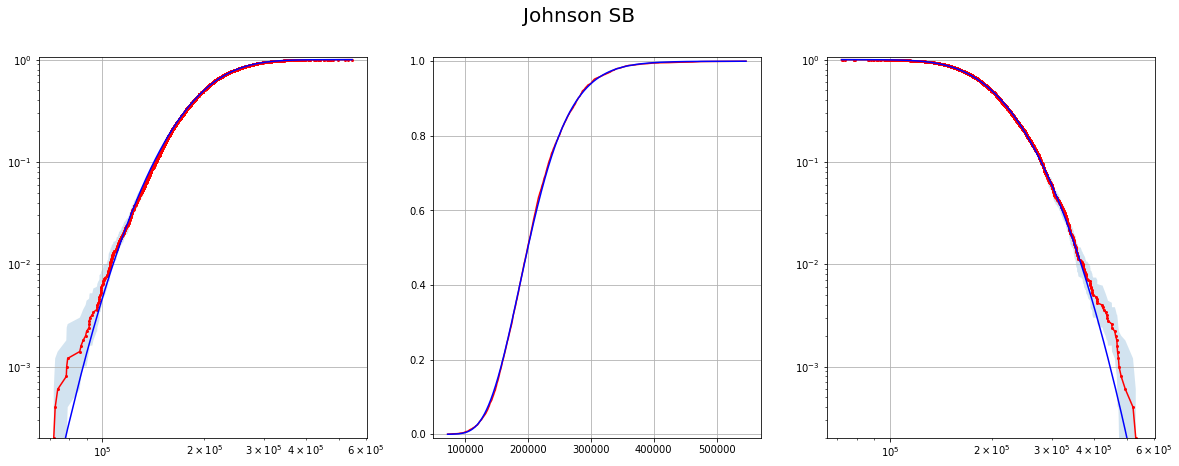



*******************************************************************************************************************
79 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance3.378422585944572e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.553781721679034, b 2.8398865383508634, location 37432.898560288595, scale 9387259.591650981
Cheng parametrization: a 37432.898560288595, b 9424692.49021127, gamma 11.553781721679034, delta 2.8398865383508634


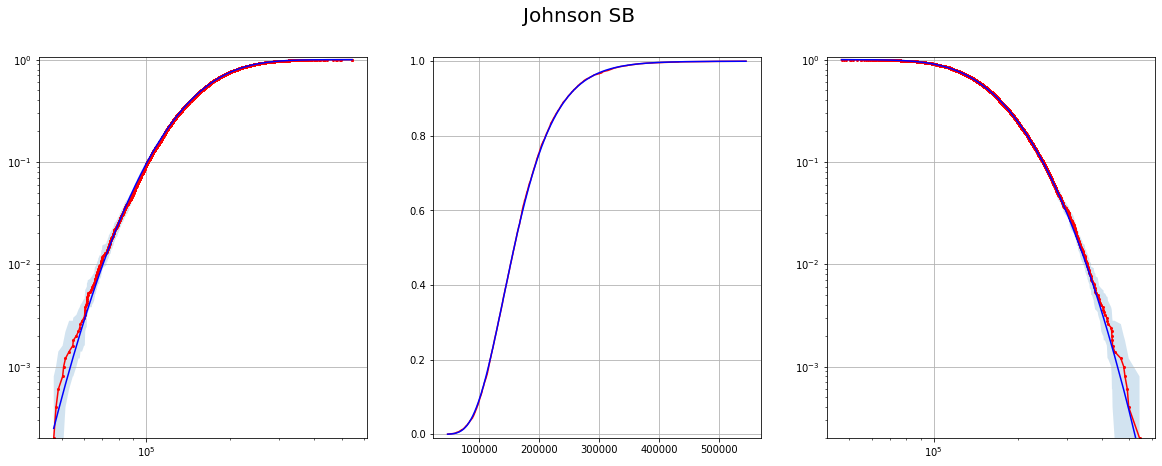



*******************************************************************************************************************
80 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance6.756845171889145e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 8.914088754355106, b 2.7710221596306592, location 16400.46481878672, scale 3963975.2353892457
Cheng parametrization: a 16400.46481878672, b 3980375.7002080325, gamma 8.914088754355106, delta 2.7710221596306592


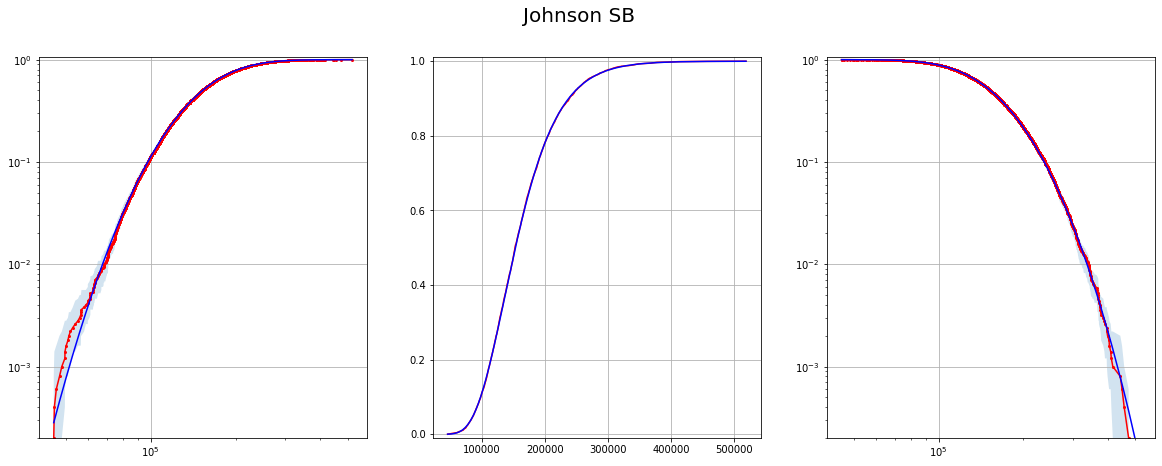



*******************************************************************************************************************
81 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance0.0001351369034377829.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.365564020421708, b 2.7270287339331576, location 9155.212813684537, scale 9668162.603274215
Cheng parametrization: a 9155.212813684537, b 9677317.8160879, gamma 11.365564020421708, delta 2.7270287339331576


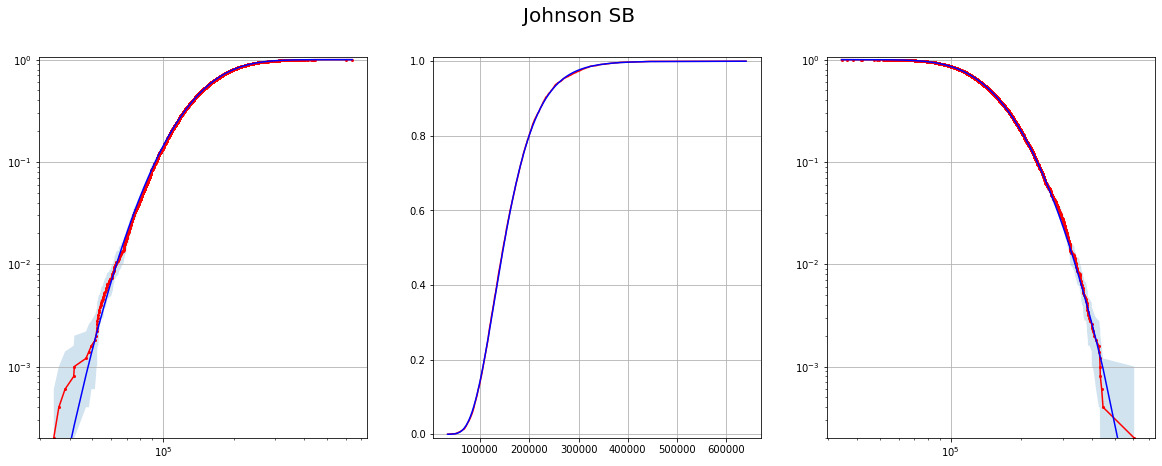



*******************************************************************************************************************
82 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance1.284608281923873e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 15.180156754197071, b 6.9184765078441295, location 103.91597677062852, scale 64284.44609532156
Cheng parametrization: a 103.91597677062852, b 64388.36207209219, gamma 15.180156754197071, delta 6.9184765078441295


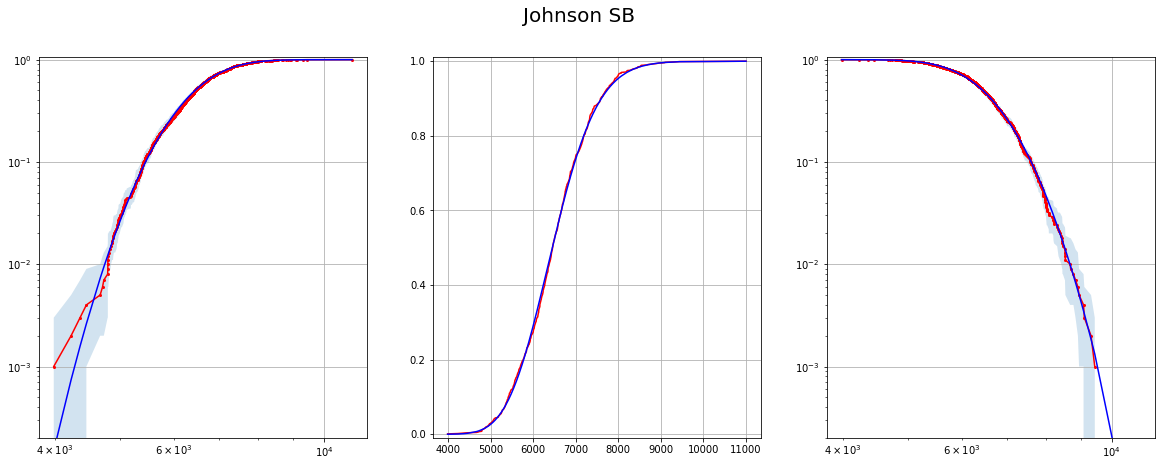



*******************************************************************************************************************
83 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance2.569216563847746e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 15.553679693191906, b 5.568337228642099, location 805.599704559927, scale 92290.61802703326
Cheng parametrization: a 805.599704559927, b 93096.21773159318, gamma 15.553679693191906, delta 5.568337228642099


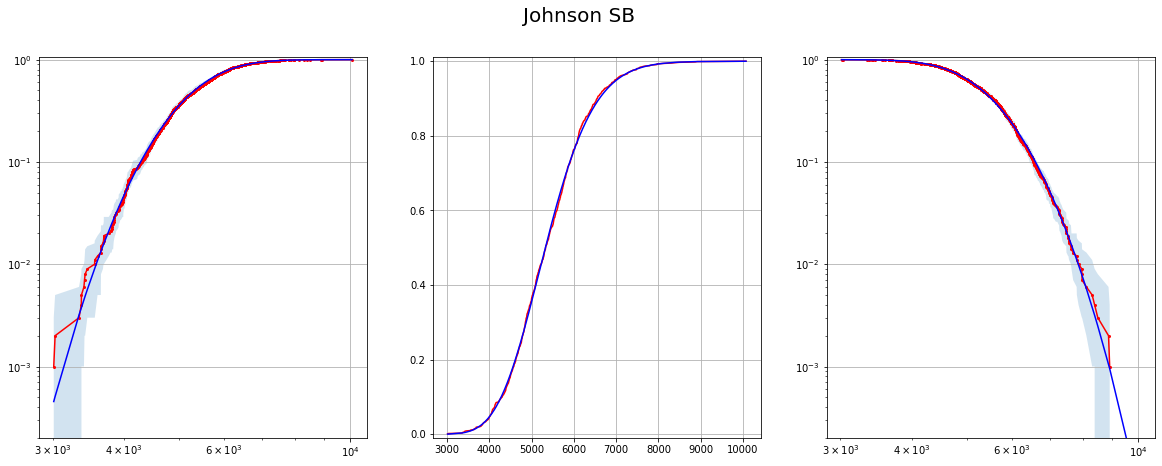



*******************************************************************************************************************
84 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance5.138433127695492e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 4.448308455511151, b 2.863894179421976, location 2182.106557901567, scale 19323.603661967496
Cheng parametrization: a 2182.106557901567, b 21505.710219869063, gamma 4.448308455511151, delta 2.863894179421976


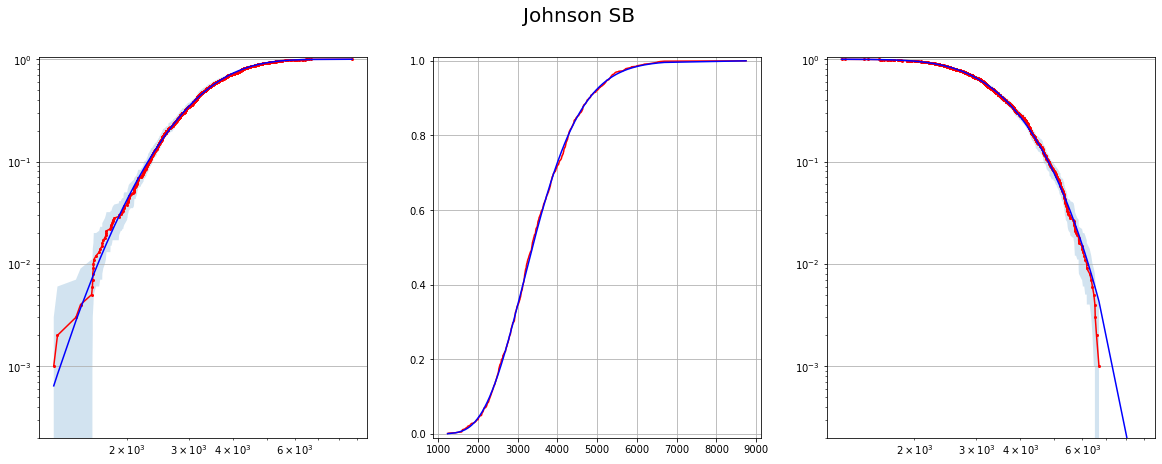



*******************************************************************************************************************
85 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance7.707649691543236e-05.csv
*******************************************************************************************************************
Johnson SB parameters: a 11.695442782875844, b 4.212356355669176, location 1088.5983023311023, scale 67324.80403826718
Cheng parametrization: a 1088.5983023311023, b 68413.40234059827, gamma 11.695442782875844, delta 4.212356355669176


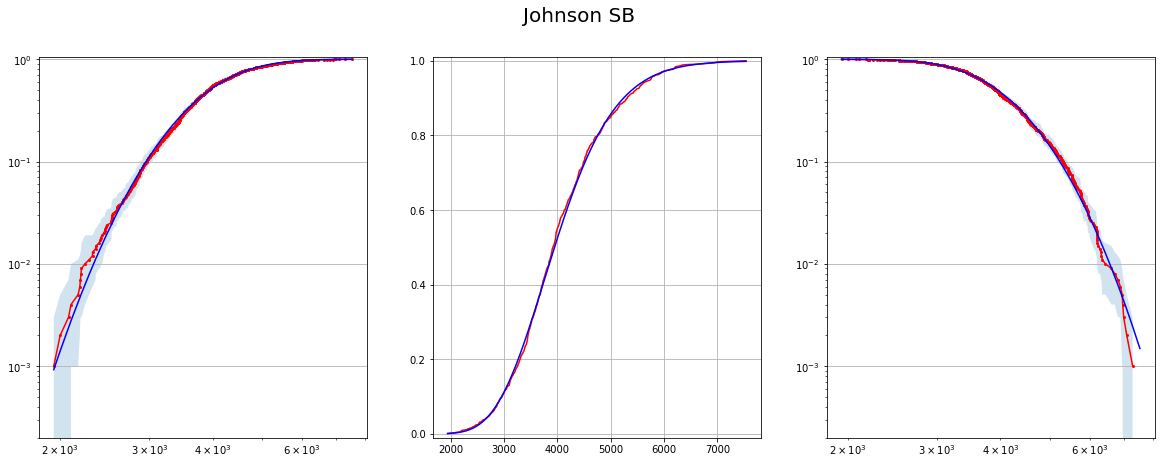



********************************************************************************************************************
86 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00010276866255390984.csv
********************************************************************************************************************
Johnson SB parameters: a 13.771873147236356, b 3.916698161203583, location 1117.5478243581053, scale 123887.8522768126
Cheng parametrization: a 1117.5478243581053, b 125005.4001011707, gamma 13.771873147236356, delta 3.916698161203583


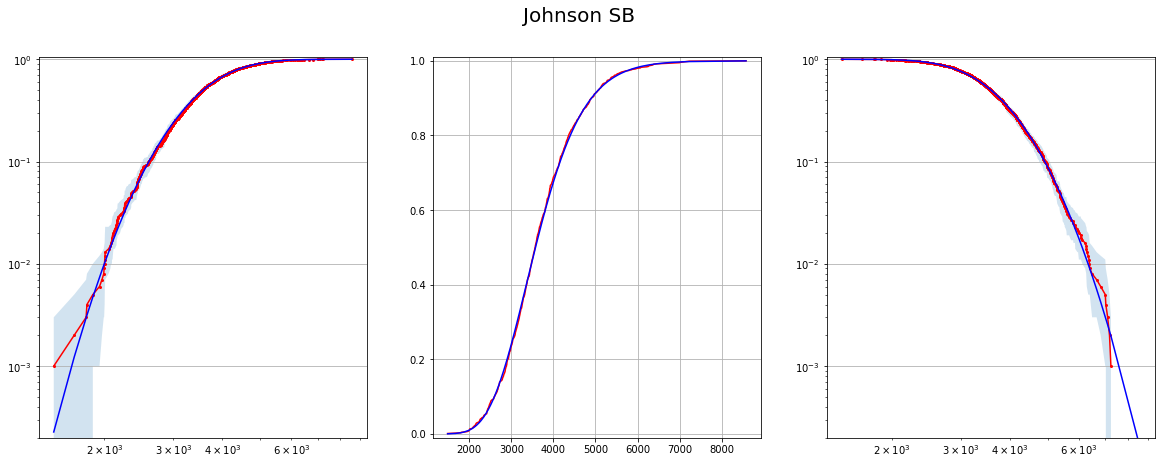



********************************************************************************************************************
87 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00015415299383086473.csv
********************************************************************************************************************
Johnson SB parameters: a 3.102544637187452, b 2.6129113706389955, location 1297.3412707157574, scale 12661.64050890625
Cheng parametrization: a 1297.3412707157574, b 13958.981779622007, gamma 3.102544637187452, delta 2.6129113706389955


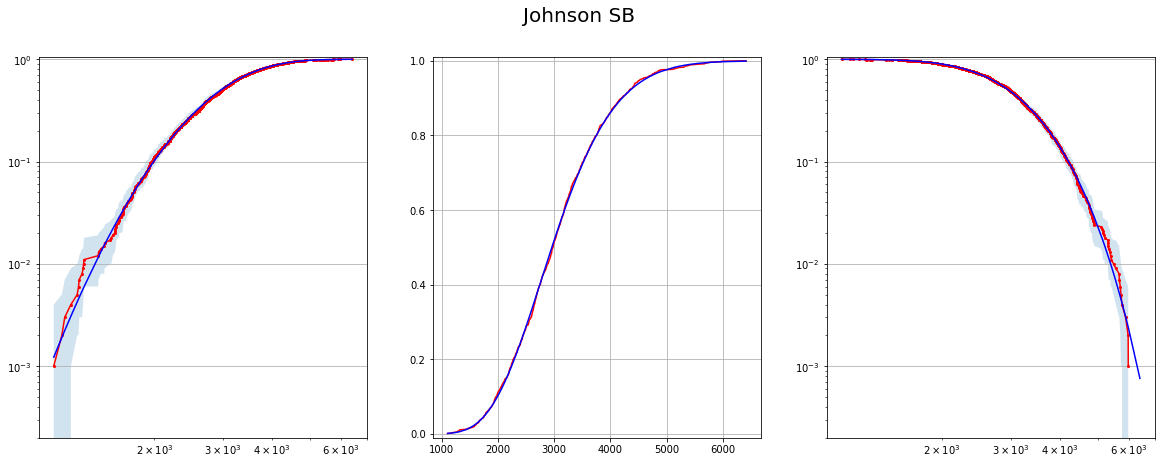



********************************************************************************************************************
88 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00020553732510781967.csv
********************************************************************************************************************
Johnson SB parameters: a 5.060917615778438, b 2.904883962521117, location 1237.1319678096968, scale 18125.680043387118
Cheng parametrization: a 1237.1319678096968, b 19362.812011196813, gamma 5.060917615778438, delta 2.904883962521117


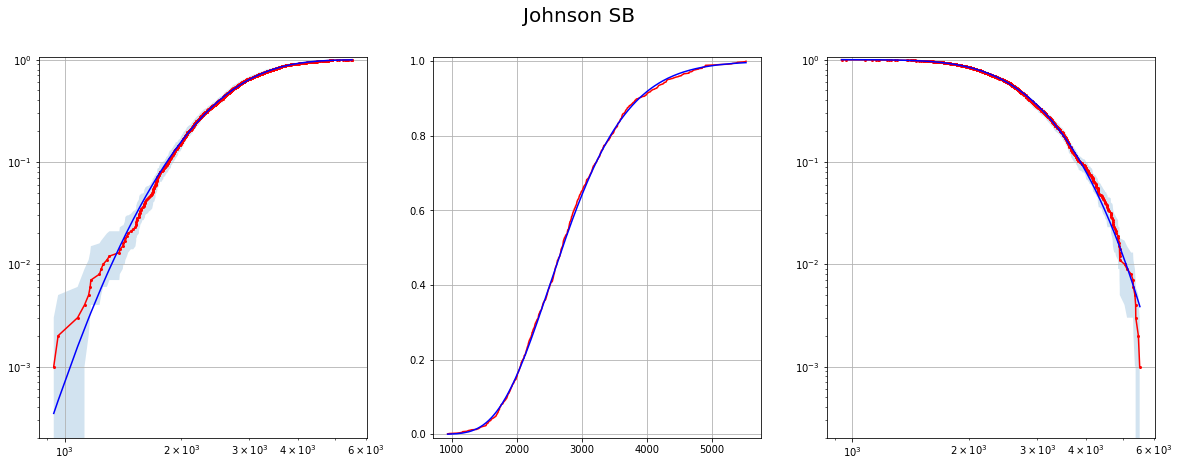



********************************************************************************************************************
89 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00025692165638477457.csv
********************************************************************************************************************
Johnson SB parameters: a 9.19650631800845, b 4.518135067572971, location 4.366678615002051e-06, scale 32277.149578556768
Cheng parametrization: a 4.366678615002051e-06, b 32277.149582923445, gamma 9.19650631800845, delta 4.518135067572971


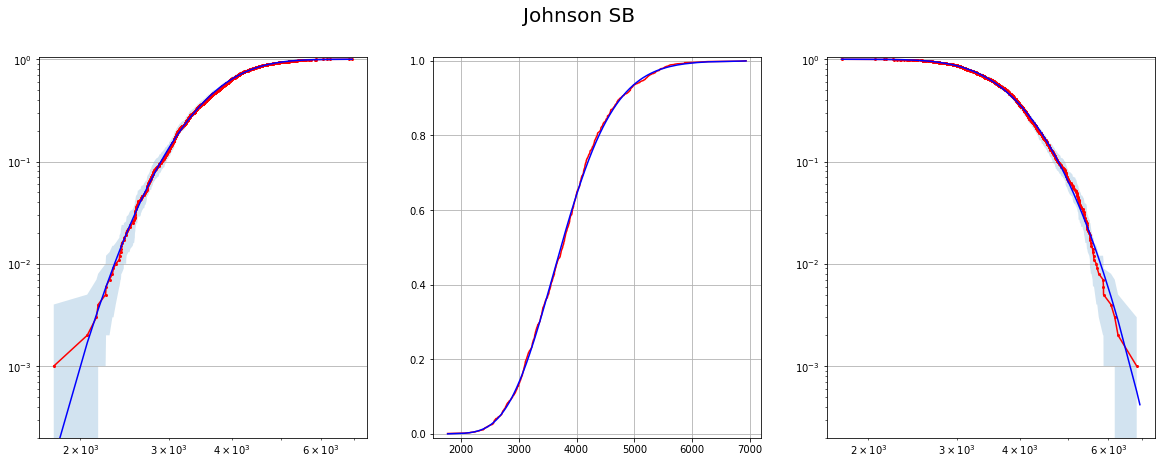



********************************************************************************************************************
90 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00030830598766172946.csv
********************************************************************************************************************
Johnson SB parameters: a 14.789386274968223, b 4.047161224890299, location 652.1356857572604, scale 114513.74504043843
Cheng parametrization: a 652.1356857572604, b 115165.88072619568, gamma 14.789386274968223, delta 4.047161224890299


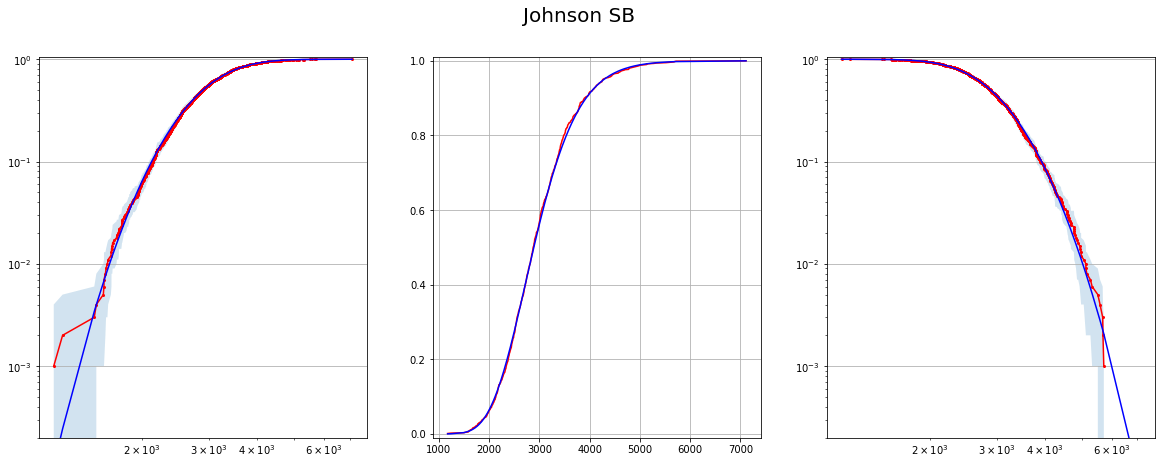



********************************************************************************************************************
91 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00035969031893868435.csv
********************************************************************************************************************
Johnson SB parameters: a 11.82743099128659, b 3.859393285407328, location 670.8929876034117, scale 62061.289074477
Cheng parametrization: a 670.8929876034117, b 62732.18206208041, gamma 11.82743099128659, delta 3.859393285407328


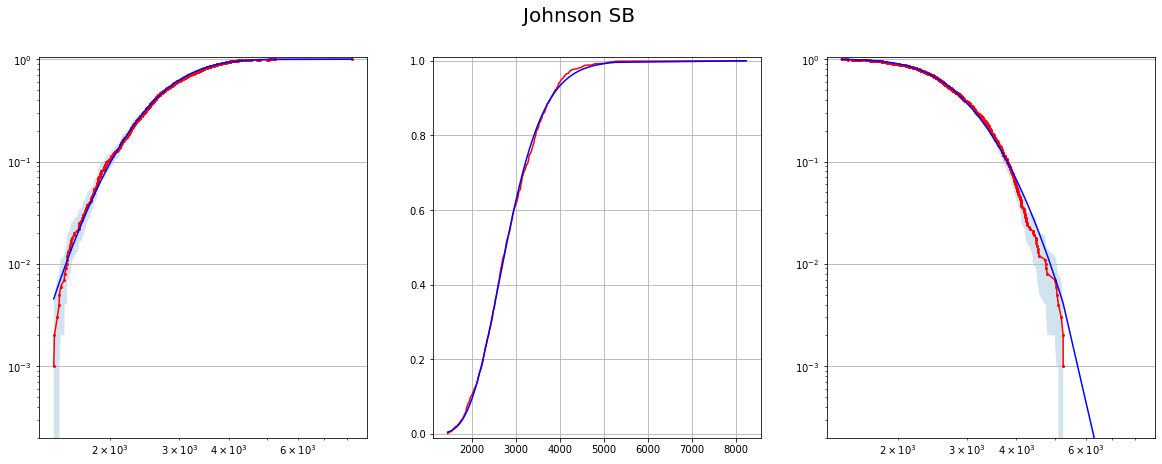



********************************************************************************************************************
92 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00041107465021563935.csv
********************************************************************************************************************
Johnson SB parameters: a 6.219827631666116, b 2.9907751811564554, location 1159.505293812655, scale 19157.757307065993
Cheng parametrization: a 1159.505293812655, b 20317.262600878646, gamma 6.219827631666116, delta 2.9907751811564554


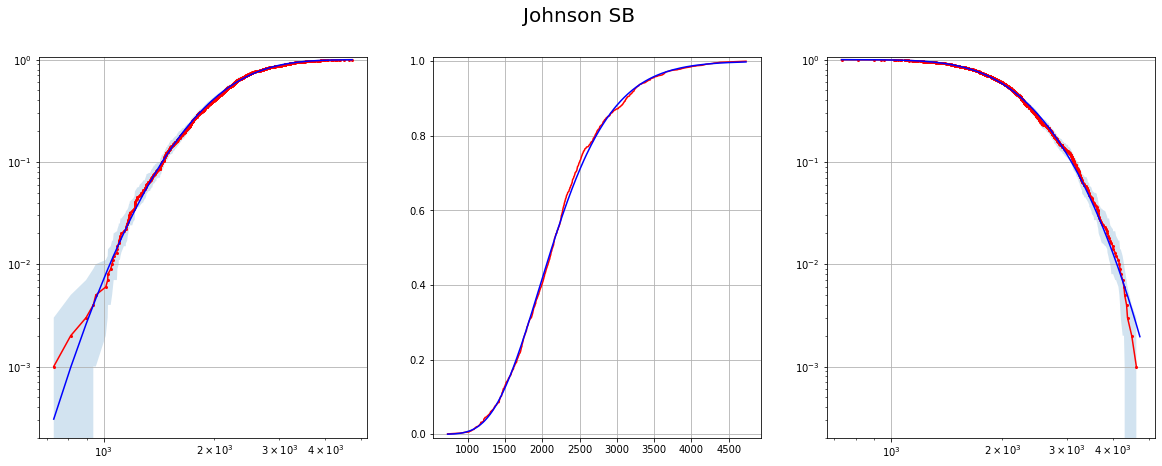



******************************************************************************************************************
93 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance1.50208917332205e-05.csv
******************************************************************************************************************
Johnson SB parameters: a 7.257815312224105, b 6.1420799408593085, location 5.982103397666859e-06, scale 14630.980570641608
Cheng parametrization: a 5.982103397666859e-06, b 14630.980576623711, gamma 7.257815312224105, delta 6.1420799408593085


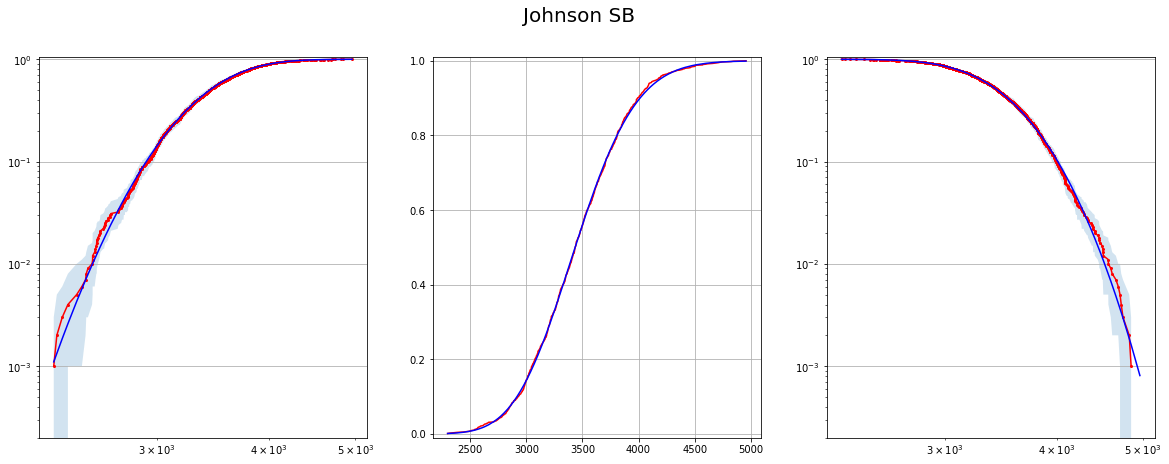



*****************************************************************************************************************
94 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance3.0041783466441e-05.csv
*****************************************************************************************************************
Johnson SB parameters: a 15.580696295922781, b 6.591149903746658, location 74.45834128067763, scale 34484.22689087066
Cheng parametrization: a 74.45834128067763, b 34558.685232151336, gamma 15.580696295922781, delta 6.591149903746658


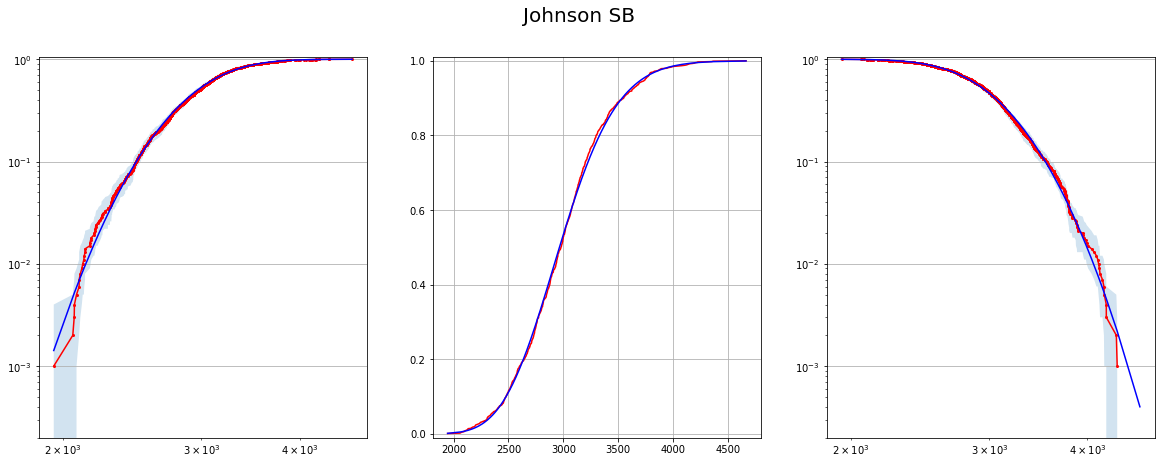



*****************************************************************************************************************
95 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance6.0083566932882e-05.csv
*****************************************************************************************************************
Johnson SB parameters: a 8.650547031000134, b 4.650591979251738, location 405.6050793865986, scale 16170.162282163225
Cheng parametrization: a 405.6050793865986, b 16575.767361549824, gamma 8.650547031000134, delta 4.650591979251738


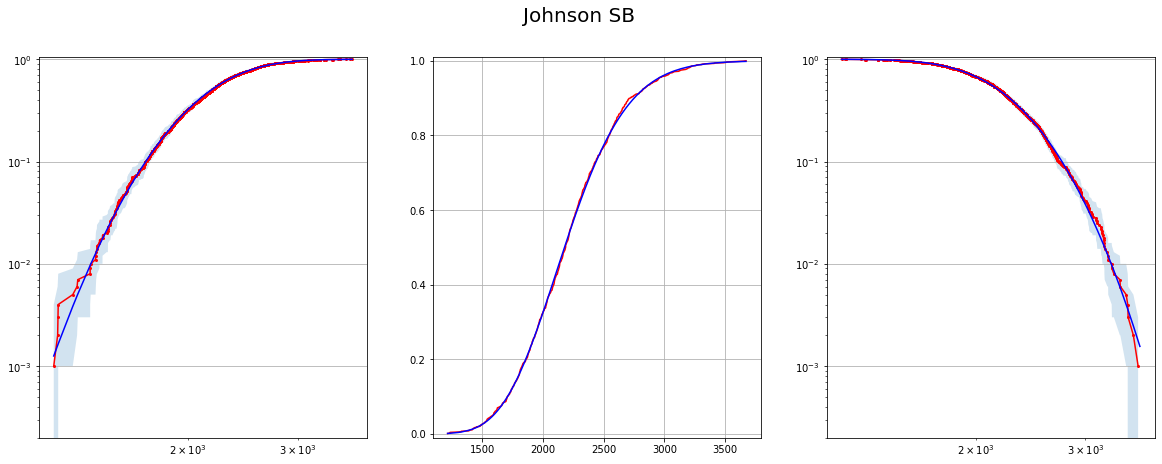



*****************************************************************************************************************
96 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance9.0125350399323e-05.csv
*****************************************************************************************************************
Johnson SB parameters: a 13.756227296238741, b 5.576201461626507, location 14.907997583731985, scale 28570.71510223193
Cheng parametrization: a 14.907997583731985, b 28585.62309981566, gamma 13.756227296238741, delta 5.576201461626507


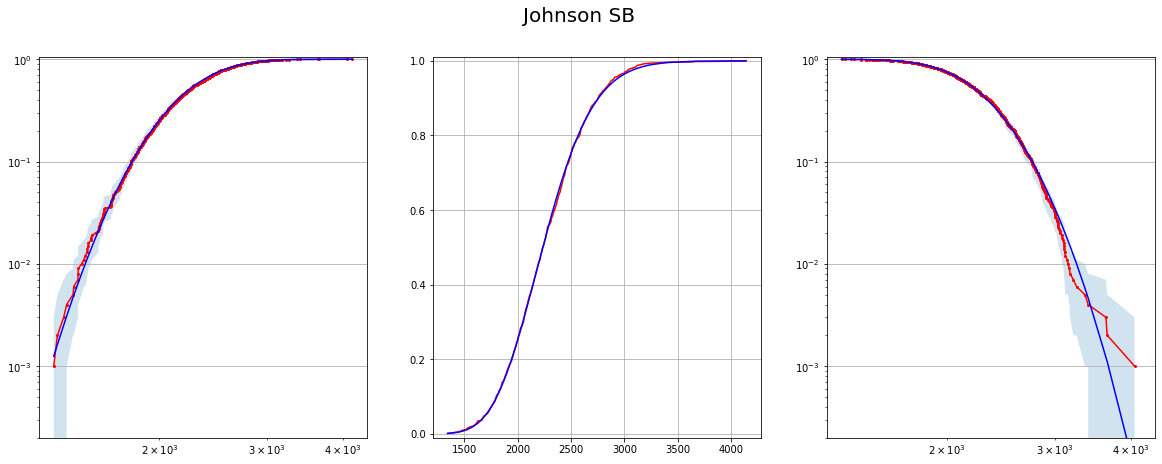



******************************************************************************************************************
97 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000120167133865764.csv
******************************************************************************************************************
Johnson SB parameters: a 4.584362004487811, b 3.368234934281088, location 633.5062037203014, scale 6698.975776166862
Cheng parametrization: a 633.5062037203014, b 7332.481979887163, gamma 4.584362004487811, delta 3.368234934281088


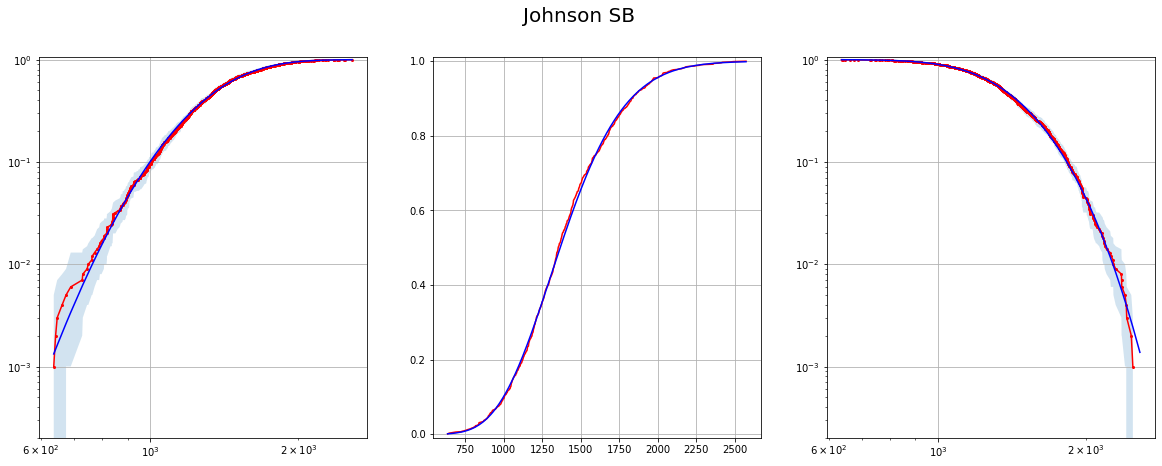



******************************************************************************************************************
98 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000180250700798646.csv
******************************************************************************************************************
Johnson SB parameters: a 14.46795340173302, b 4.563626562424735, location 331.94766744784175, scale 34110.23852680081
Cheng parametrization: a 331.94766744784175, b 34442.18619424865, gamma 14.46795340173302, delta 4.563626562424735


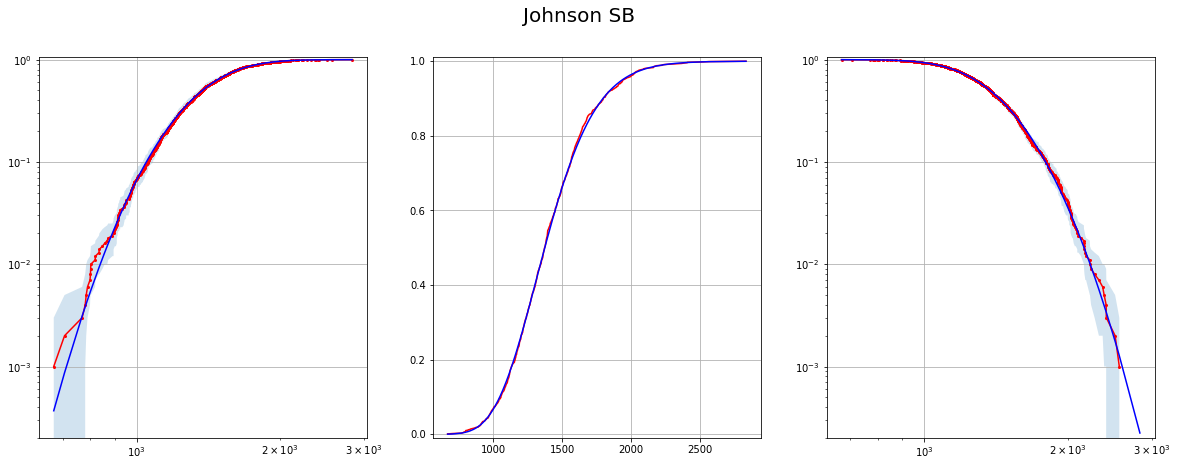



******************************************************************************************************************
99 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000240334267731528.csv
******************************************************************************************************************
Johnson SB parameters: a 14.206312879688891, b 4.737880819464699, location 293.53546136359347, scale 25711.46881666391
Cheng parametrization: a 293.53546136359347, b 26005.004278027503, gamma 14.206312879688891, delta 4.737880819464699


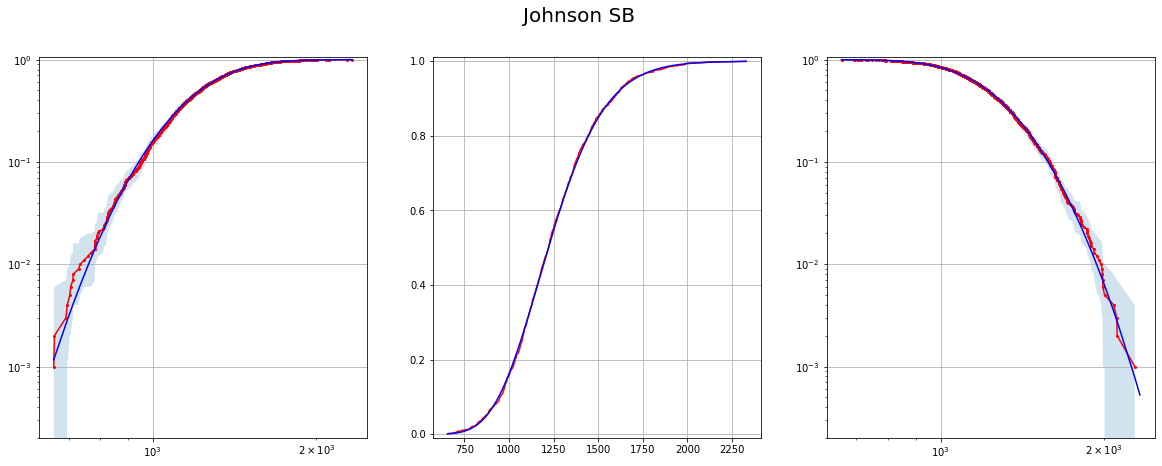



******************************************************************************************************************
100 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.00030041783466441.csv
******************************************************************************************************************
Johnson SB parameters: a 12.954809280392052, b 4.221087319397952, location 356.2513068821474, scale 23149.509959475756
Cheng parametrization: a 356.2513068821474, b 23505.761266357902, gamma 12.954809280392052, delta 4.221087319397952


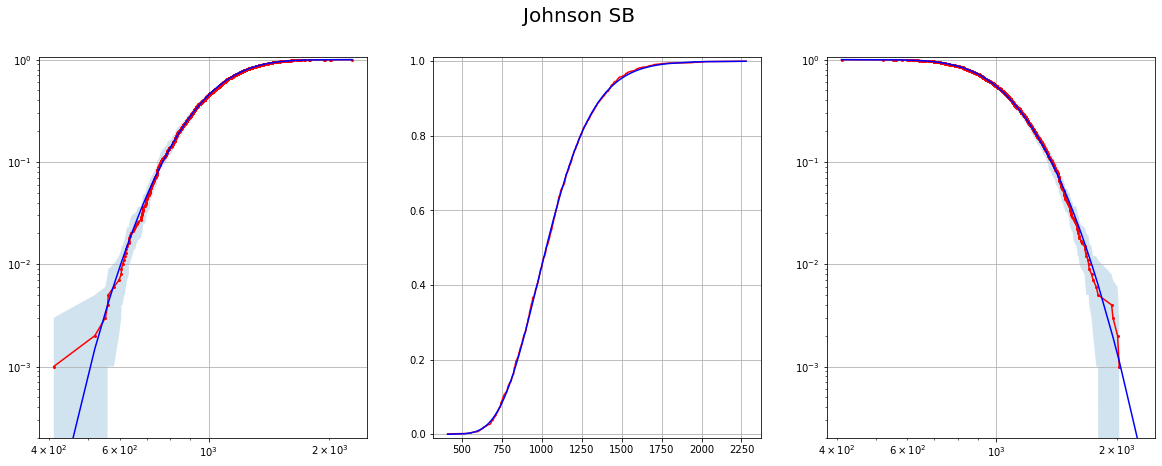



*******************************************************************************************************************
101 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000360501401597292.csv
*******************************************************************************************************************
Johnson SB parameters: a 12.318975280498861, b 4.0415265722361156, location 357.1582543702048, scale 20578.913517457506
Cheng parametrization: a 357.1582543702048, b 20936.071771827712, gamma 12.318975280498861, delta 4.0415265722361156


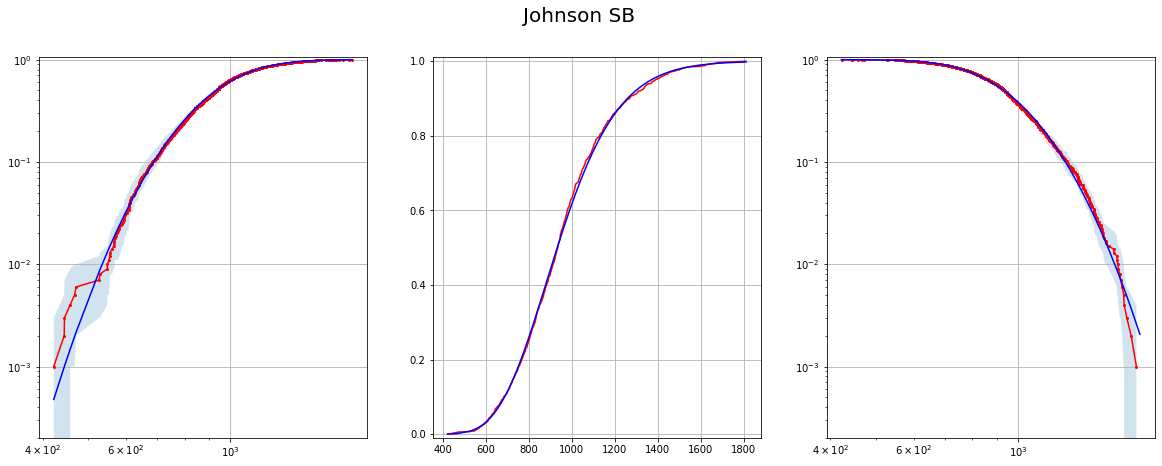



*********************************************************************************************************************
102 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.00042058496853017397.csv
*********************************************************************************************************************
Johnson SB parameters: a 4.154422839196169, b 3.248094424231568, location 375.24855598654125, scale 3889.639961430985
Cheng parametrization: a 375.24855598654125, b 4264.888517417526, gamma 4.154422839196169, delta 3.248094424231568


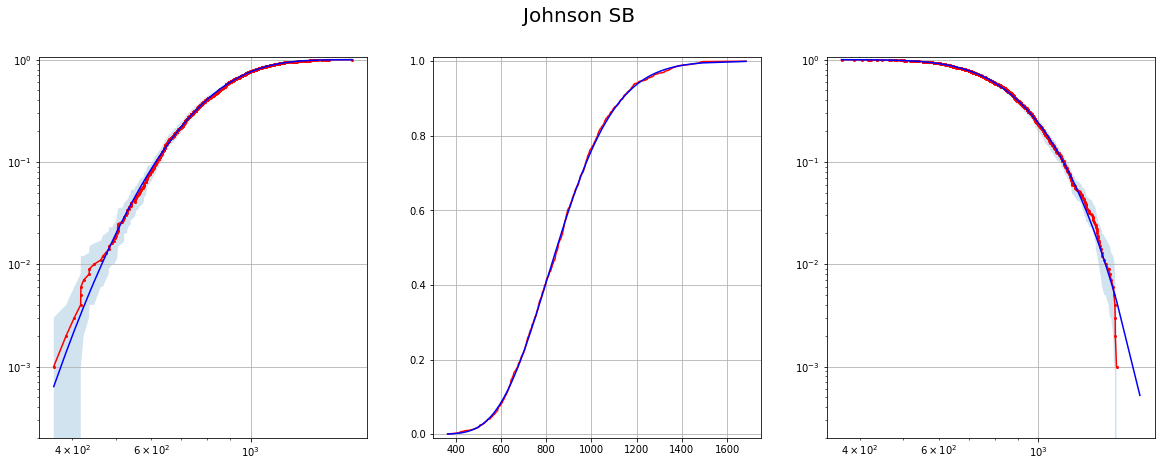



*******************************************************************************************************************
103 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000480668535463056.csv
*******************************************************************************************************************
Johnson SB parameters: a 6.192388342653997, b 4.6654124240254955, location 52.281766491807666, scale 5383.429211419574
Cheng parametrization: a 52.281766491807666, b 5435.710977911382, gamma 6.192388342653997, delta 4.6654124240254955


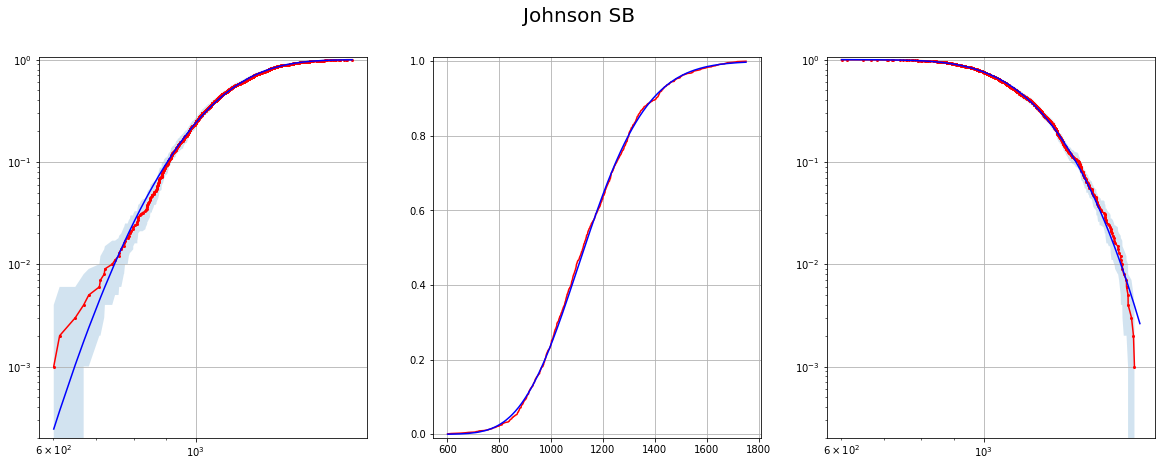



*********************************************************************************************************************
104 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance1.2508045080638722e-05.csv
*********************************************************************************************************************
Johnson SB parameters: a 2.0020080282050277, b 2.7446905568584294, location 1634.6218843033762, scale 5456.409778699715
Cheng parametrization: a 1634.6218843033762, b 7091.031663003092, gamma 2.0020080282050277, delta 2.7446905568584294


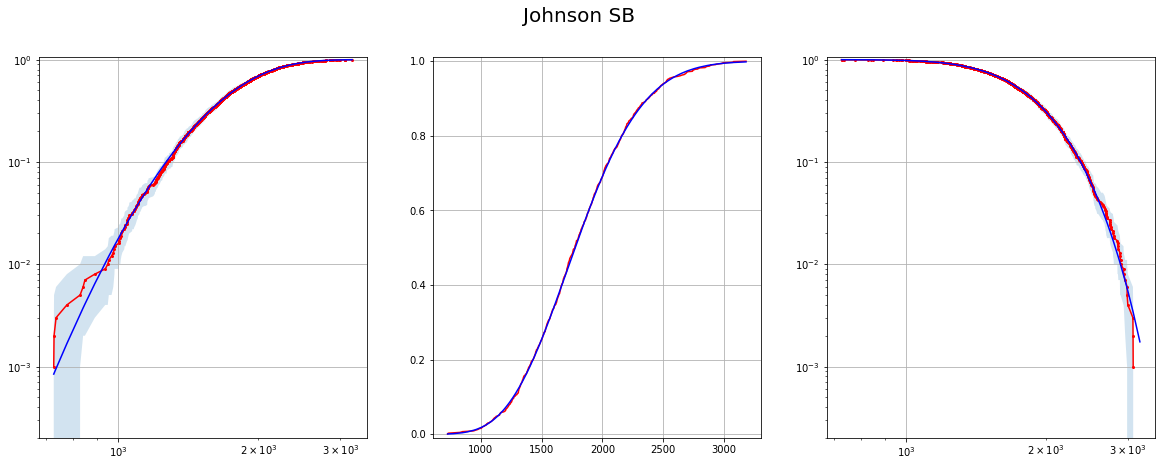



*********************************************************************************************************************
105 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance2.5016090161277443e-05.csv
*********************************************************************************************************************
Johnson SB parameters: a 16.390754766670153, b 5.3165658325092915, location 625.0668055362171, scale 56837.15181972121
Cheng parametrization: a 625.0668055362171, b 57462.21862525743, gamma 16.390754766670153, delta 5.3165658325092915


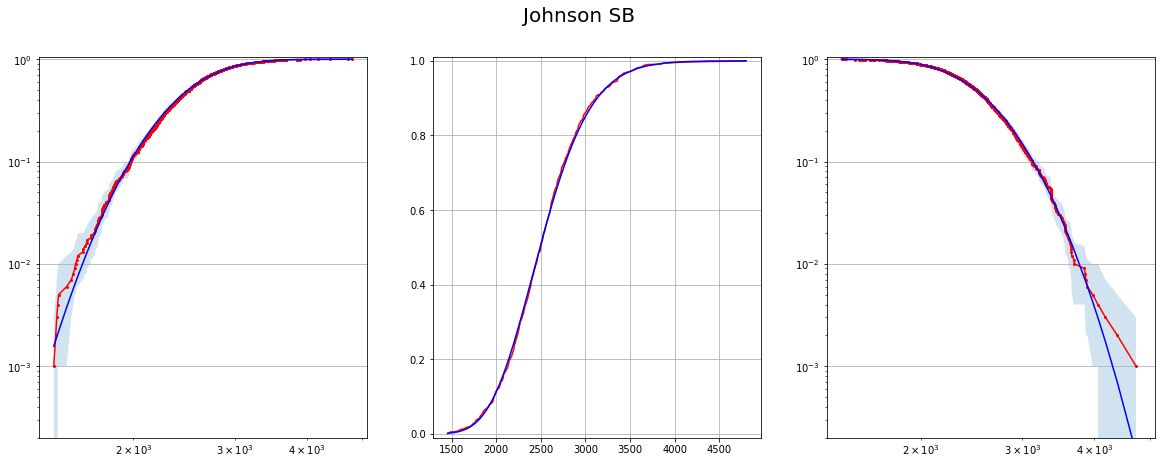



********************************************************************************************************************
106 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance5.003218032255489e-05.csv
********************************************************************************************************************
Johnson SB parameters: a 13.833890217264354, b 4.186882567151375, location 840.5045340012114, scale 53912.08043175054
Cheng parametrization: a 840.5045340012114, b 54752.584965751754, gamma 13.833890217264354, delta 4.186882567151375


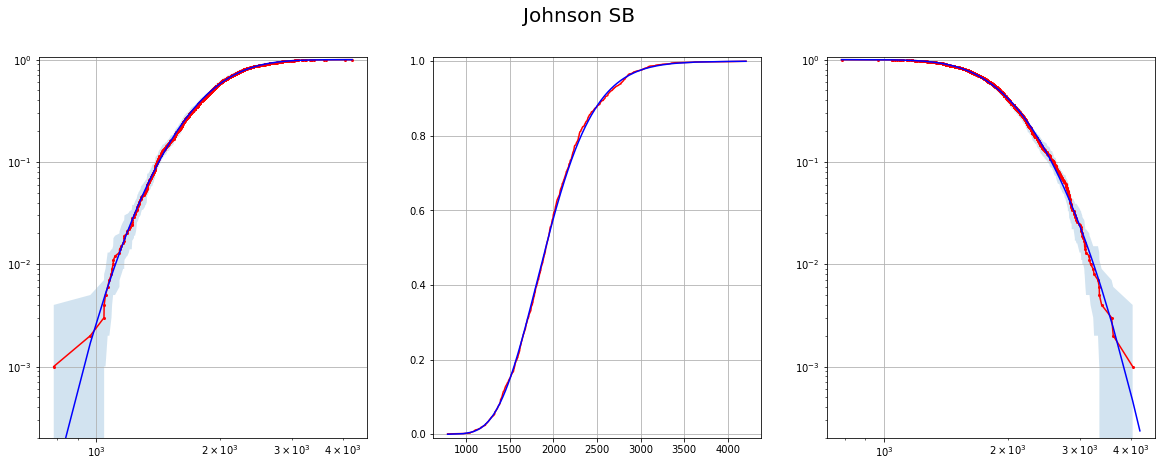



********************************************************************************************************************
107 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance7.504827048383233e-05.csv
********************************************************************************************************************
Johnson SB parameters: a 14.17250819712197, b 4.8224890931870235, location 357.14610400489784, scale 43642.97790796813
Cheng parametrization: a 357.14610400489784, b 44000.12401197303, gamma 14.17250819712197, delta 4.8224890931870235


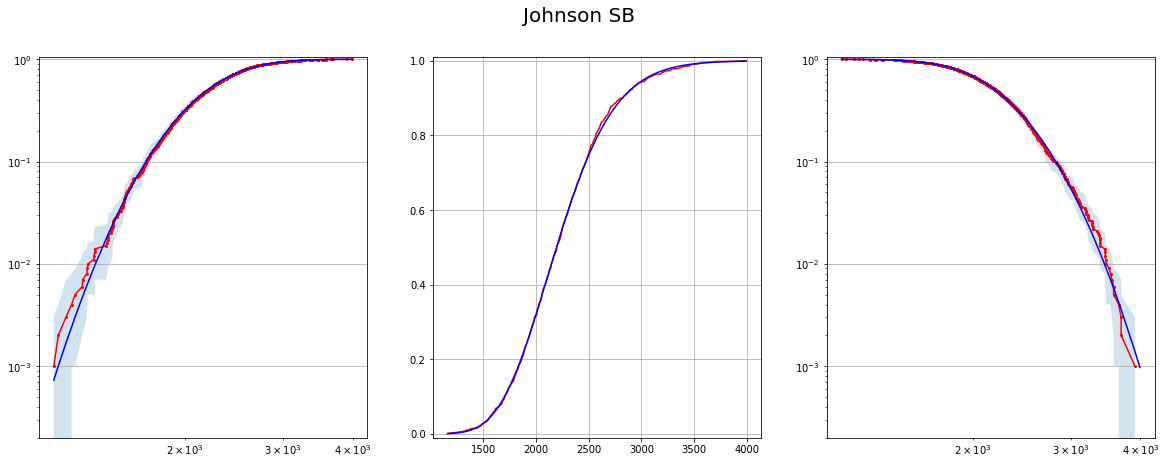



*********************************************************************************************************************
108 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00010006436064510977.csv
*********************************************************************************************************************
Johnson SB parameters: a 11.488737955752331, b 3.8050733545038398, location 717.7199438489841, scale 35352.80868547139
Cheng parametrization: a 717.7199438489841, b 36070.528629320375, gamma 11.488737955752331, delta 3.8050733545038398


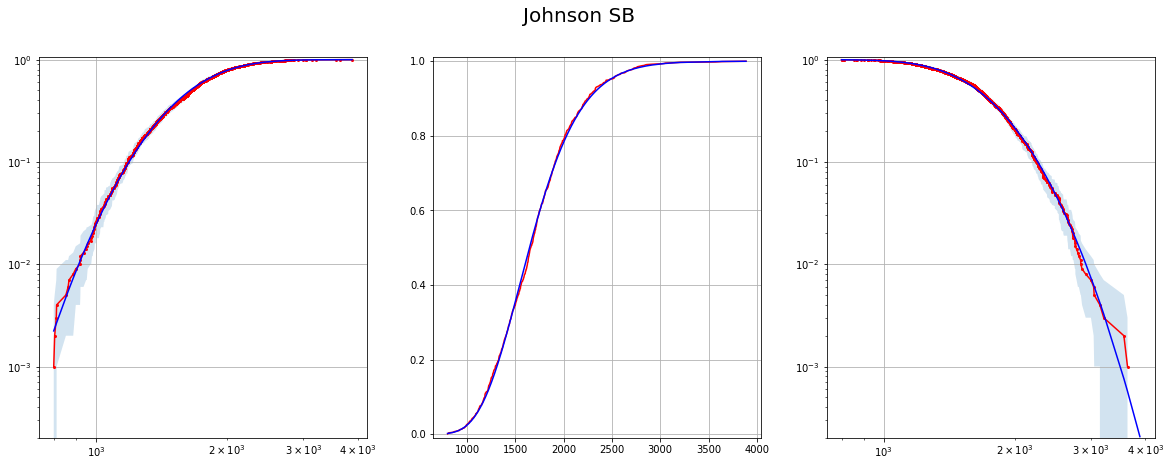



*********************************************************************************************************************
109 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00015009654096766466.csv
*********************************************************************************************************************
Johnson SB parameters: a 13.311823923039931, b 4.115704319852155, location 466.0255502141132, scale 44783.39550984488
Cheng parametrization: a 466.0255502141132, b 45249.421060058994, gamma 13.311823923039931, delta 4.115704319852155


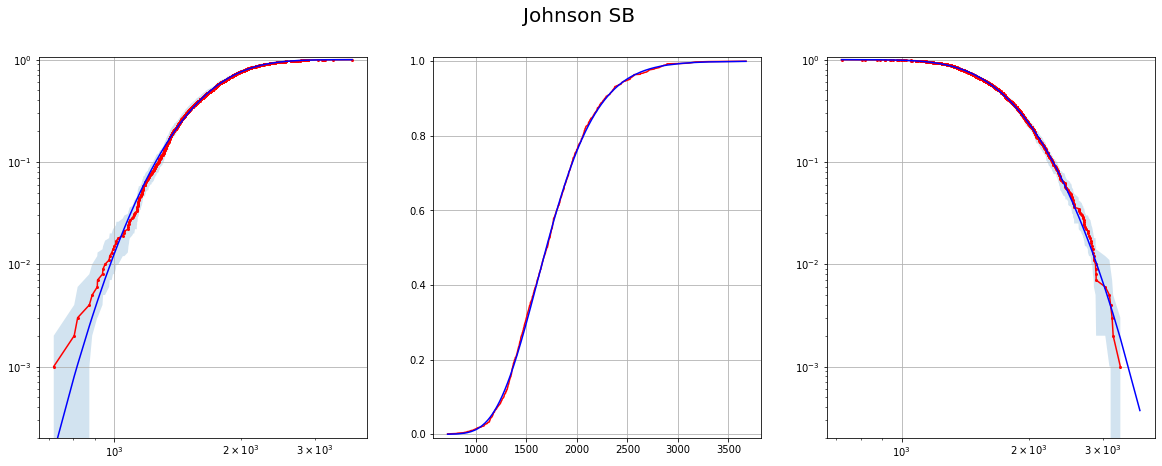



*********************************************************************************************************************
110 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00020012872129021955.csv
*********************************************************************************************************************
Johnson SB parameters: a 10.496808406120138, b 3.627332170131066, location 613.4426056678545, scale 26848.498459108894
Cheng parametrization: a 613.4426056678545, b 27461.941064776747, gamma 10.496808406120138, delta 3.627332170131066


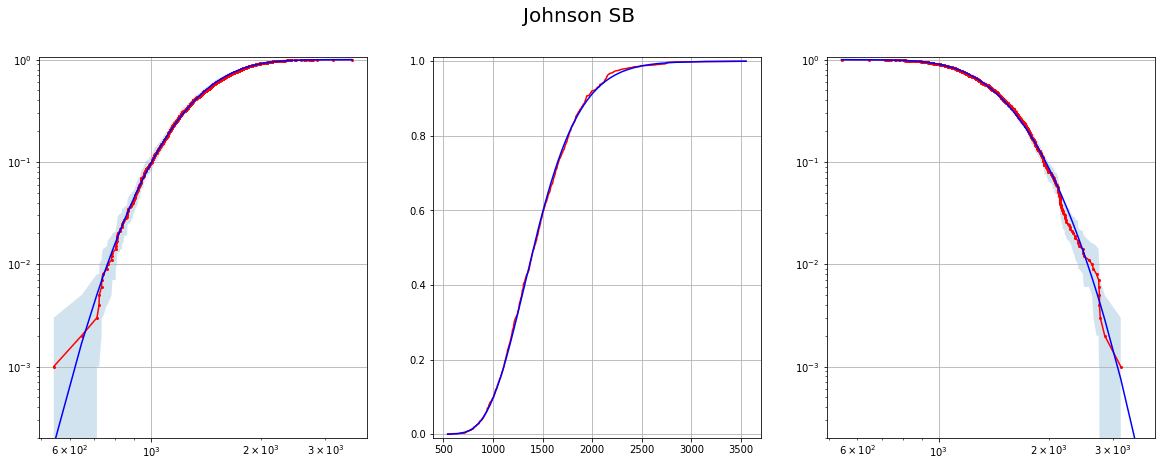



*********************************************************************************************************************
111 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00025016090161277443.csv
*********************************************************************************************************************
Johnson SB parameters: a 14.665684532434689, b 4.7181228431344095, location 235.99731089560635, scale 39969.40417512876
Cheng parametrization: a 235.99731089560635, b 40205.40148602436, gamma 14.665684532434689, delta 4.7181228431344095


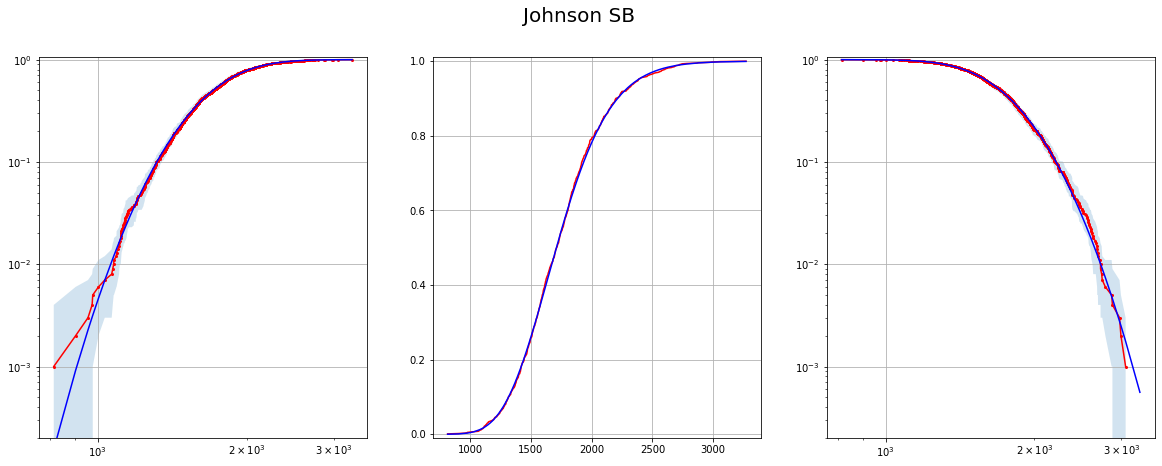



********************************************************************************************************************
112 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.0003001930819353293.csv
********************************************************************************************************************
Johnson SB parameters: a 10.391083020206143, b 3.986165274925736, location 417.4893968000614, scale 21097.623487436802
Cheng parametrization: a 417.4893968000614, b 21515.112884236863, gamma 10.391083020206143, delta 3.986165274925736


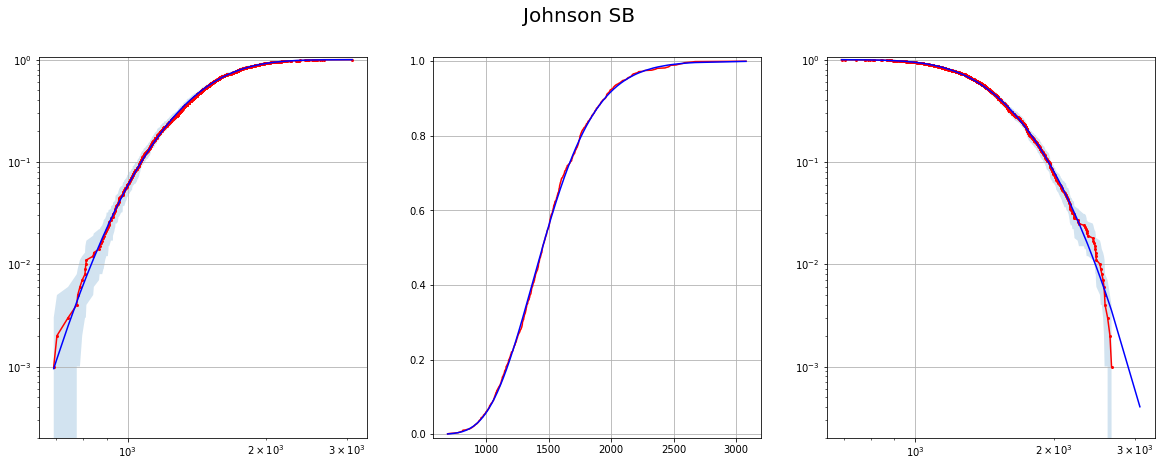



********************************************************************************************************************
113 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.0003502252622578842.csv
********************************************************************************************************************
Johnson SB parameters: a 12.693994761906929, b 4.083029067888027, location 431.0165989305809, scale 32531.705921409775
Cheng parametrization: a 431.0165989305809, b 32962.72252034036, gamma 12.693994761906929, delta 4.083029067888027


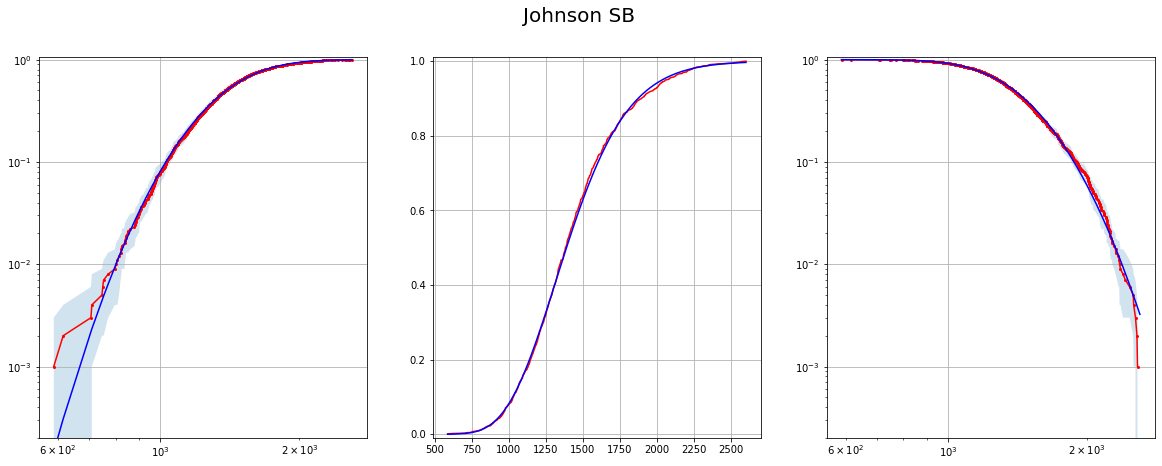



********************************************************************************************************************
114 : ../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.0004002574425804391.csv
********************************************************************************************************************
Johnson SB parameters: a 4.164011730978619, b 3.054744367694886, location 544.5301888111444, scale 6138.255148405931
Cheng parametrization: a 544.5301888111444, b 6682.785337217076, gamma 4.164011730978619, delta 3.054744367694886


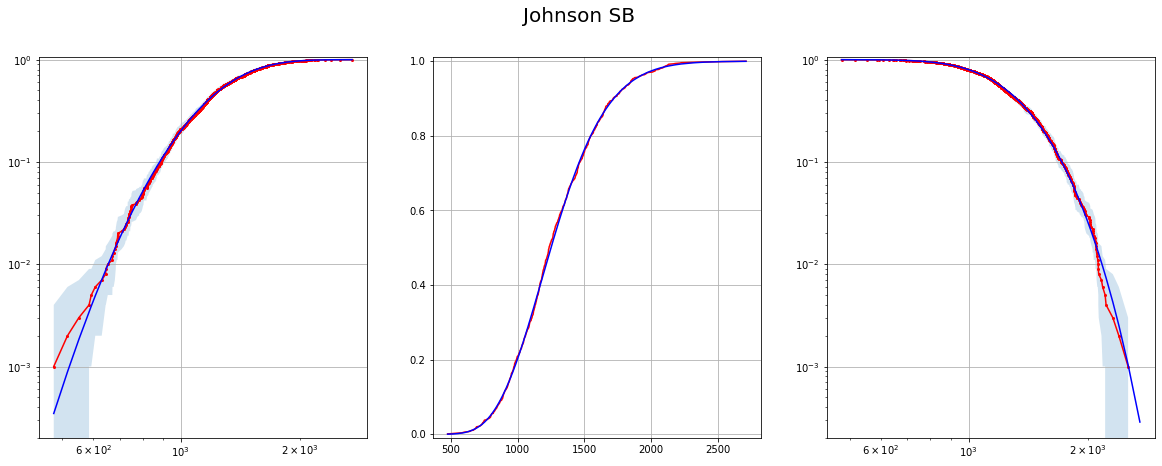



**********************************************************************************************************************
115 : ../../experiments/csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance1.3622783342647554e-06.csv
**********************************************************************************************************************
Johnson SB parameters: a 11.891192617562837, b 3.0676422228832605, location 286645110.34468406, scale 111932382494.74878
Cheng parametrization: a 286645110.34468406, b 112219027605.09346, gamma 11.891192617562837, delta 3.0676422228832605


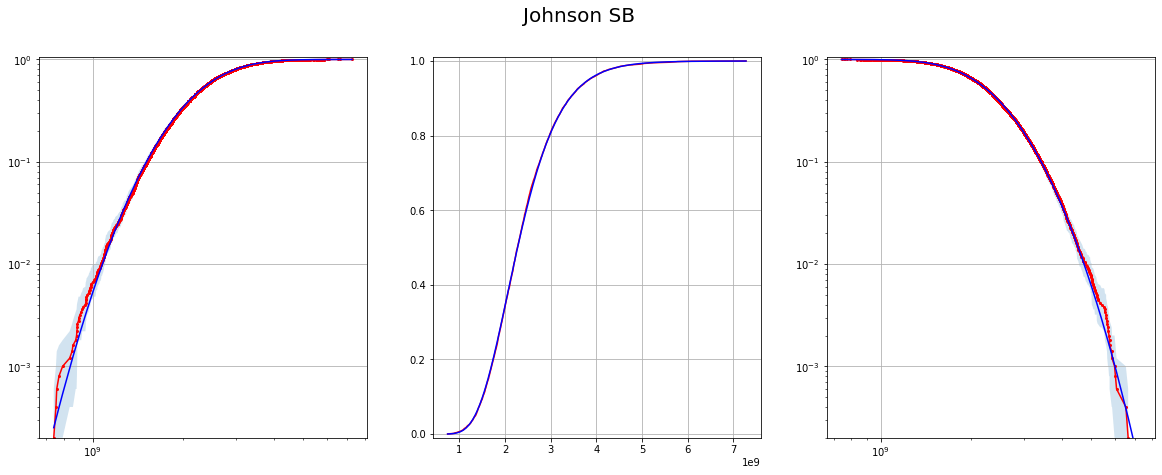



*********************************************************************************************************************
116 : ../../experiments/csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance2.724556668529511e-06.csv
*********************************************************************************************************************
Johnson SB parameters: a 11.122275864845935, b 2.5962669471205206, location 115034030.24024107, scale 149906905704.2323
Cheng parametrization: a 115034030.24024107, b 150021939734.47253, gamma 11.122275864845935, delta 2.5962669471205206


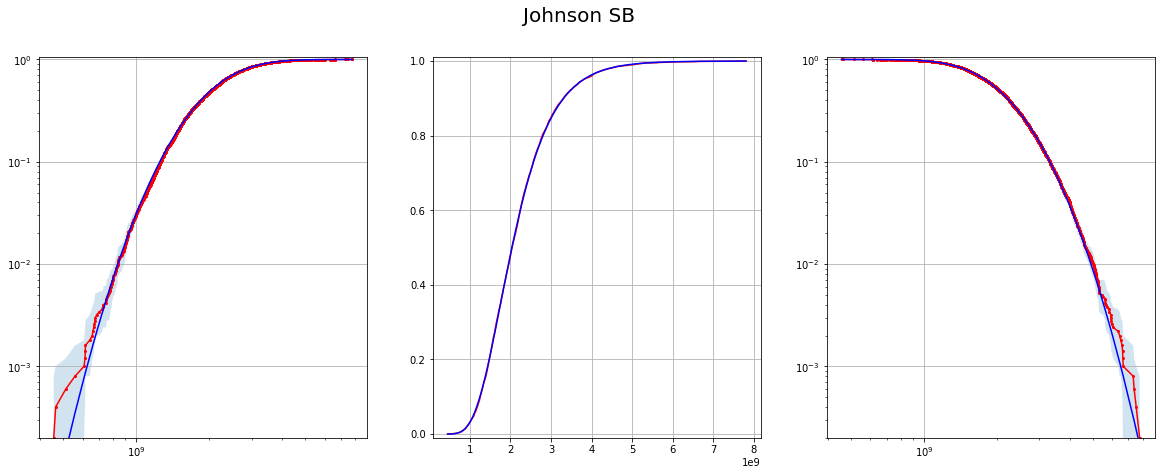



*********************************************************************************************************************
117 : ../../experiments/csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance5.449113337059022e-06.csv
*********************************************************************************************************************
Johnson SB parameters: a 9.180117505587479, b 2.089648578010933, location 124561446.29811288, scale 120598194874.39932
Cheng parametrization: a 124561446.29811288, b 120722756320.69743, gamma 9.180117505587479, delta 2.089648578010933


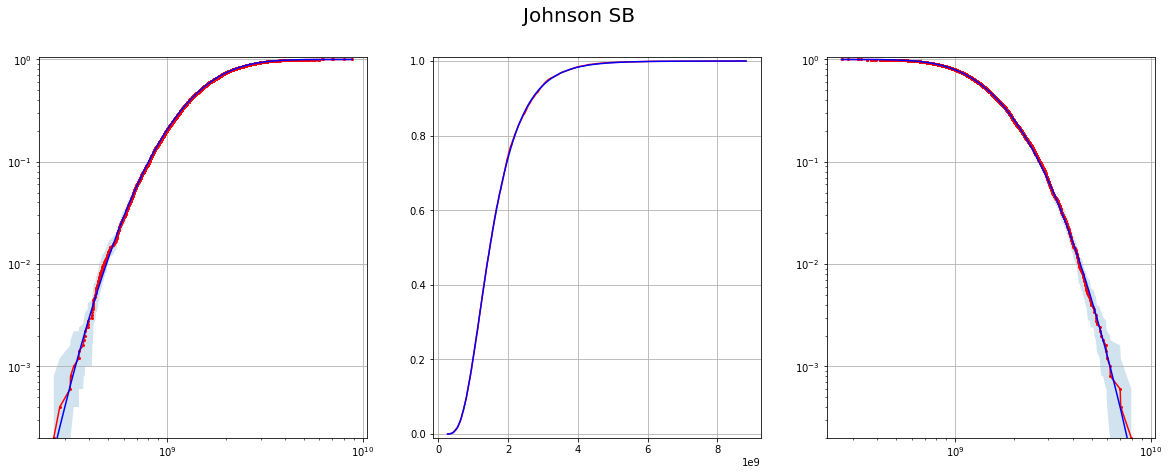



**********************************************************************************************************************
118 : ../../experiments/csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance1.0898226674118043e-05.csv
**********************************************************************************************************************
Johnson SB parameters: a 10.353757244438643, b 1.8752818654226218, location 83994567.42077778, scale 258139197222.42938
Cheng parametrization: a 83994567.42077778, b 258223191789.85016, gamma 10.353757244438643, delta 1.8752818654226218


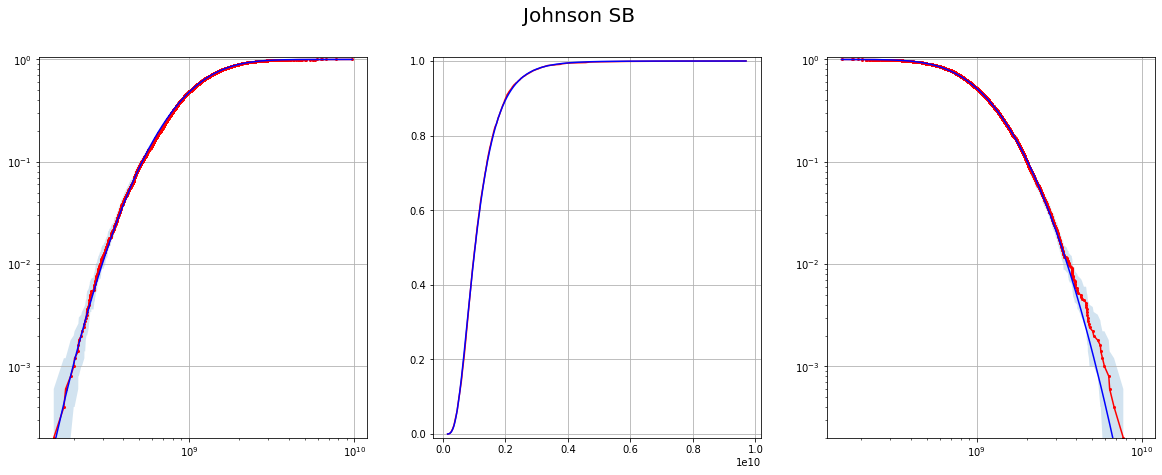



**********************************************************************************************************************
119 : ../../experiments/csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance2.1796453348236087e-05.csv
**********************************************************************************************************************
Johnson SB parameters: a 8.824097524681584, b 1.9351224650178818, location 21306648.43144922, scale 75894453173.34625
Cheng parametrization: a 21306648.43144922, b 75915759821.7777, gamma 8.824097524681584, delta 1.9351224650178818


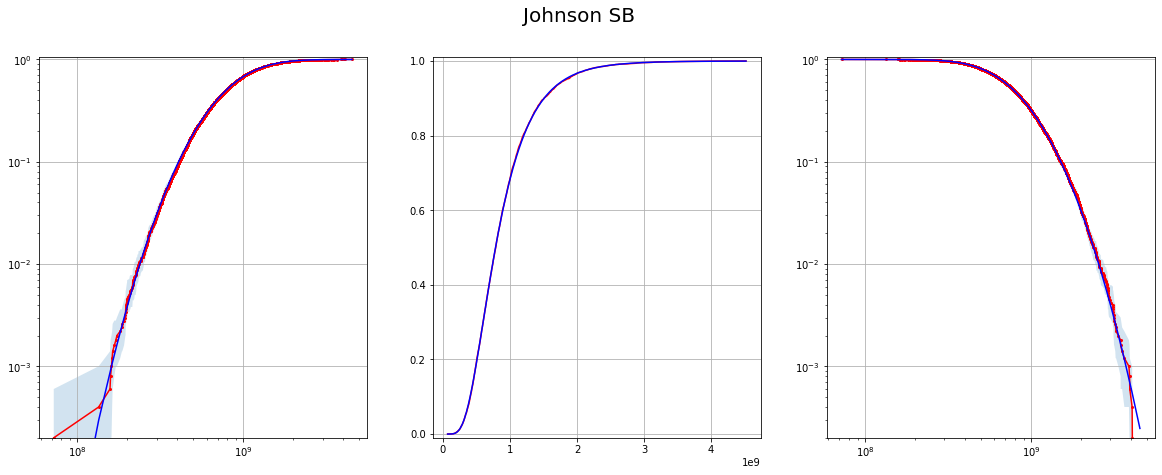

In [6]:
# Select the number of instances to interate over...
N = len(instances)

# ... and iterate over all instances to generate the plots.
for index in range(N):
    #
    # Selection of a concrete instance and name printing
    #
    name = instances[index]
    
    print("*" * (len(name) + len(str(index)) + 3))
    print(index, ":", name)
    print("*" * (len(name) + len(str(index)) + 3))   

    #
    # Manipulate the corresponding data frame:
    # We are only interested in the flip-values, not in the runtime, or seed used.
    #
    df = pd.read_csv(name, index_col=[0,1])
    df.drop(index=['seed', 'runtime'], level=1, inplace=True)

    # Checks if any values are nan.
    if df.isnull().values.any():
        print("There is a nan-value. This was not supposed to happen.")
        
    # Next, we are going to calculate $\mathsf{mean}_{S} (F^{(i)})$,
    # i.e., the mean number of flips required to solve instance $F^{(i)}$ with solver $S$.
    # This then is the hardness distribution we are going to analyze.    
    means = df.mean(axis=1)
    means = np.sort(means)  
        
    #
    # Print the plots with location parameter
    #    
    
    # Scipy can be used to fit a location parameter. 
    # In practise, however, this does not work properly.
    # Thus, we use our own method `SB_minimize_nnlf` 
    # that can be found in the `empirical` package.
    # This method must be provided with the data object `means`, 
    # a lower bound for the location parameter, here `0.0`,
    # and an upper bound for the location parameter, here `means[0]-0.0001`.
    # This method then yields a location parameter maximizing the likelihood.
    m = SB_minimize_nnlf(means, 0.0, means[0]-0.0001)
    means_SB = means - m 

    # Next, we fit a three-parametric Johnson SB distribution 
    # (with forced location parameter zero). Note that means = means - m. 
    # Note that fitting a three-parametric lognormal distribution to 
    # original_data - m is the same as fitting 
    # a four-parametric lognormal distribution to the original_data.
    # Afterwards, we can use our own location parameter.
    a, b, loc, scale = johnsonsb.fit(means_SB, floc=0) # NEW!!!

    print(f"Johnson SB parameters: a {a}, b {b}, location {m}, scale {scale}")
    print(f"Cheng parametrization: a {m}, b {scale+m}, gamma {a}, delta {b}")

    rv_SB = johnsonsb(a, b, loc, scale)
    
    plot_and_compare_cdf(means_SB, rv_SB, suptitle='Johnson SB', plot_confidence=True)

    plt.show(block=False)
    
    print("\n")

## Statistical Tests

As described in the paper, we use a statistical test to check the goodness-of-fit.

(The p-values obtained were calculated seperately and can be found in `./evaluation/evaluate_SB/all_tests.csv` for all solver and instance combinations. The reason for this is that it takes several hours to compute these values because of the bootstrapping.)

In [11]:
# Use the instance list as a selector for the correct rows in the `all_tests.csv` file.
selector = [path.split('../../experiments/')[1] for path in instances]
selector

# Extract the relevant rows from the data frame.
file = '../evaluate_SB/all_tests.csv'
df = pd.read_csv(file, index_col=False)
df = df[df['instance'].isin(selector)]

# Sort the entries to match the order of the diagrams above.
df['instance'] = pd.Categorical(
    df['instance'], 
    categories=selector, 
    ordered=True
)
df.sort_values('instance', inplace=True)

# Show the instance name without path
df['instance'] = df['instance'].map(lambda name: name.split("/")[-1].split(".csv")[0])

# Mark entries where the tests failes
stars = np.where((df['p_orig']<0.05) & (df['p_new']<0.05), 'rejected', ' ')
df.loc[:, 'rejected'] = stars.tolist()

# Add the index we used
index = list(range(len(instances)))
df['index'] = index

# Change order of columns s.th. index is the first one
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# Show complete table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     index  type                      instance    p_orig  p_new  rejected
45       0  SRWA   chance9.283120802166236e-06  0.311663   0.29          
44       1  SRWA  chance1.8566241604332472e-05  0.615263   0.56          
38       2  SRWA  chance3.7132483208664944e-05  0.849540   0.85          
41       3  SRWA   chance5.569872481299742e-05  0.720749   0.77          
42       4  SRWA   chance7.426496641732989e-05  0.630969   0.58          
47       5  SRWA  chance0.00011139744962599483  0.886757   0.89          
40       6  SRWA  chance0.00014852993283465978  0.567371   0.55          
39       7  SRWA  chance0.00018566241604332472  0.252566   0.28          
46       8  SRWA  chance0.00022279489925198967  0.271517   0.28          
37       9  SRWA   chance0.0002599273824606546  0.951216   0.91          
43      10  SRWA  chance0.00029705986566931956  0.720749   0.73          
57      11  SRWA   chance1.004169898003682e-05  0.873601   0.88          
51      12  SRWA   chance2.00833979600